# This is the start of the complete unsupervised notebook with PID

These generators will return the kinematics (momentum, energy) and the particle species involved. For simplicity, we assume the decays are isotropic in the center-of-mass frame and use basic relativistic kinematics.


Photon + photon → 2 muons (pair production)
J/psi → 2 muons (decay)
psi(2S) → 2 muons (decay)
psi(2S) → J/psi + 2 charged pions, with J/psi → 2 muons
This simulation won't be full event generation but will give you the particle species and simple kinematics (momentum and angles). 



To emulate the behavior of the ALICE TPC and its momentum resolution, we use a method that convolutes the momenta of daughter particles with a typical momentum resolution. In ALICE, the momentum resolution $\frac{\Delta p}{p}$ depends on the particle momentum and other factors such as the track length and magnetic field. A reasonable approximation is that the momentum resolution scales as a function of momentum, with the form:

$$\frac{\Delta p}{p} = a \bigoplus b \cdot p$$

Where $a$ is the intrinsic detector resolution (often around 0.5\%) and $b$ is a momentum-dependent term (around 1\%).



### Generators

Simple generators, particles produced at rest, and decayed afterwards

Smearing is included, since it overshadows the width of the particle itself

In [1]:
n_sigma_cut = 0.5 # main force for the PID

mass_threshold = 2.3 

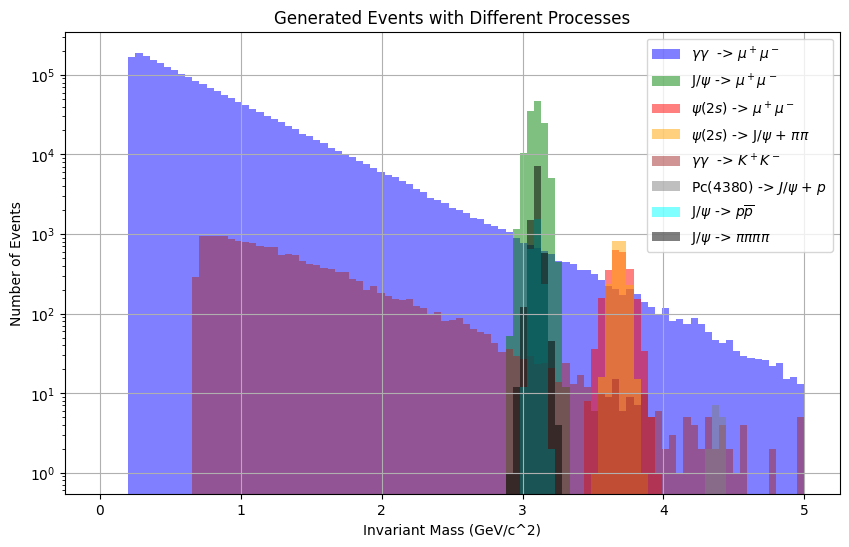

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Event generation parameters
n_photon_photon = 2144429
n_jpsi = 124800
n_psi2S_muons = 2320
n_psi2S_jpsi_pions = 2120
n_pq1 = 14
#n_pq2 = 25
n_pp_kaon = 16920
n_jpsi_protons = 2440
n_jpsi_4pi = 9470
#n_jpsi_3pi = 500

# Constants (GeV/c^2)
m_muon = 0.105658  # Muon mass
m_jpsi = 3.0969    # J/psi mass
m_psi2S = 3.6861   # Psi(2S) mass
m_pion = 0.13957   # Charged pion mass
m_proton= .938 
m_pentaquark= 4.38
m_electron= .0005
n_pentaquark= 10000
m_kaon= 0.49367
m_rho = 0.775

def isotropic_two_body_decay(mother_mass, daughter_mass1, daughter_mass2):
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    p = tpc_momentum_resolution(p)
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution(momentum):
    a = 0.005
    b = 0.01
    resolution = np.sqrt(a**2 + (b * momentum)**2)
    smeared_momentum = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum

def generate_photon_photon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_muon  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(mass, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, E1, E2 = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_psi2S_muons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(m_psi2S, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_psi2S_jpsi_pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        jpsi_p, pion_p, jpsi_E, pion_E = isotropic_two_body_decay(m_psi2S, m_jpsi, 2 * m_pion)
        muon1_p, muon2_p, muon1_E, muon2_E = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # jpsi_p = tpc_momentum_resolution(np.linalg.norm(jpsi_p))
        # pion_p = tpc_momentum_resolution(np.linalg.norm(pion_p))
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        smearedTracks.append(pion_p)
        smearedTracks.append(pion_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_protons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_proton, m_proton)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)
#generate_jpsi_protons_events(n_events)

def generate_pp_kaon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_kaon + 0.2 # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        pp_kaon1_p, pp_kaon2_p, _, _ = isotropic_two_body_decay(mass, m_kaon, m_kaon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(pp_kaon1_p)
        smearedTracks.append(pp_kaon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)


def isotropic_three_body_decay(mother_mass, daughter_mass1, daughter_mass2, daughter_mass3):
    """
    Simulates an isotropic three-body decay, distributing energy and momentum according to phase space constraints.
    Returns the momenta and energies of the three daughter particles.
    """
    # Total energy available for distribution after accounting for minimum required energy
    total_energy_available = (mother_mass - daughter_mass1 - daughter_mass2 - daughter_mass3)
    
    if total_energy_available <= 0:
        raise ValueError("Insufficient mass for a three-body decay.")

    # Randomly divide the available energy between the three daughters
    available_energy1 = np.random.uniform(0, total_energy_available)
    available_energy2 = np.random.uniform(0, total_energy_available - available_energy1)
    available_energy3 = total_energy_available - available_energy1 - available_energy2
    
    E1 = daughter_mass1 + available_energy1
    E2 = daughter_mass2 + available_energy2
    E3 = daughter_mass3 + available_energy3

    # Compute the momenta from the energies
    p1 = np.sqrt(E1**2 - daughter_mass1**2)
    p2 = np.sqrt(E2**2 - daughter_mass2**2)
    p3 = np.sqrt(E3**2 - daughter_mass3**2)
    
    # Random angles for isotropic decay
    theta1 = np.arccos(2 * np.random.rand() - 1)
    phi1 = 2 * np.pi * np.random.rand()
    
    theta2 = np.arccos(2 * np.random.rand() - 1)
    phi2 = 2 * np.pi * np.random.rand()
    
    # Calculate the momenta in 3D (isotropic decay)
    p1_vec = np.array([p1 * np.sin(theta1) * np.cos(phi1), p1 * np.sin(theta1) * np.sin(phi1), p1 * np.cos(theta1)])
    p2_vec = np.array([p2 * np.sin(theta2) * np.cos(phi2), p2 * np.sin(theta2) * np.sin(phi2), p2 * np.cos(theta2)])
    p3_vec = -p1_vec - p2_vec  # Momentum conservation
    
    return p1_vec, p2_vec, p3_vec, E1, E2, E3


def boost_to_lab_frame(momentum, boost_vector):
    """
    Boosts the momentum of a particle to the lab frame using the boost vector.
    """
    # Check if the boost vector is effectively zero (no boost needed)
    if np.linalg.norm(boost_vector) < 1e-10:
        print("error1")
        return momentum
    
    beta = boost_vector / np.linalg.norm(boost_vector)
    beta_norm_sq = np.linalg.norm(beta)**2
    
    # Ensure that beta_norm_sq < 1 (speed of light constraint)
    if beta_norm_sq >= 1.0:
        print("error2")
        return momentum  # No valid boost
    
    gamma = 1.0 / np.sqrt(1 - beta_norm_sq)
    dot_product = np.dot(momentum, beta)
    energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
    
    boosted_energy = gamma * (energy + dot_product)
    boosted_momentum = momentum + (gamma - 1) * dot_product / beta_norm_sq * beta + gamma * energy * beta
    
    return boosted_momentum

def boost_along_axis(momentum, beta, axis):
    """
    Boosts a particle along a single axis.
    
    Parameters:
    - momentum: 3D momentum vector of the particle to be boosted
    - beta: velocity (as a fraction of the speed of light) along the chosen axis
    - axis: axis along which to boost ('x', 'y', or 'z')
    
    Returns:
    - boosted_momentum: the 3D momentum vector after the boost along the given axis
    """
    if abs(beta) >= 1:
        print("error2")
        raise ValueError("Beta must be less than 1 for a valid boost.")
    
    gamma = 1.0 / np.sqrt(1 - beta**2)
    
    # Boost along the x-axis
    if axis == 'x':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_px = gamma * (momentum[0] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[0])
        boosted_momentum = np.array([boosted_px, momentum[1], momentum[2]])
    
    # Boost along the y-axis
    elif axis == 'y':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_py = gamma * (momentum[1] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[1])
        boosted_momentum = np.array([momentum[0], boosted_py, momentum[2]])
    
    # Boost along the z-axis
    elif axis == 'z':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_pz = gamma * (momentum[2] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[2])
        boosted_momentum = np.array([momentum[0], momentum[1], boosted_pz])
    
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")
    
    return boosted_momentum, boosted_energy

def boost_to_lab_frame_separate(momentum, boost_vector):
    """
    Boosts the particle's 3D momentum vector using separate boosts along the x, y, and z axes.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - boost_vector: 3D velocity vector (as a fraction of the speed of light)
    
    Returns:
    - boosted_momentum: the 3D momentum vector after boosting along x, y, and z
    """
    boosted_momentum = momentum
    # Boost along x
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[0], 'x')
    # Boost along y
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[1], 'y')
    # Boost along z
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[2], 'z')
    
    px, py, pz = boosted_momentum
    p_total = np.sqrt(px**2 + py**2 + pz**2)
    
    # Calculate new theta (polar angle)
    theta_prime = np.arccos(pz / p_total) if p_total > 0 else 0.0
    
    # Calculate new phi (azimuthal angle)
    phi_prime = np.arctan2(py, px)

    return boosted_momentum, theta_prime, phi_prime


def generate_psi2S_jpsi_pions_events_fixed(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        
        # Boost the muons back to the lab frame using the momentum of the J/psi from Step 1
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        smearedTracks.append(muon1_p_lab)
        smearedTracks.append(muon2_p_lab)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

def isotropic_two_body_decay_no_smearing(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay without smearing.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution_3d(momentum_vec):
    """
    Applies TPC momentum resolution smearing to each component of the momentum vector.
    """
    smeared_momentum_vec = np.zeros(3)
    for i in range(3):
        momentum = momentum_vec[i]
        a = 0.005
        b = 0.01
        resolution = np.sqrt(a**2 + (b * momentum)**2)
        smeared_momentum_vec[i] = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum_vec

def generate_psi2S_jpsi_pions_events_smearing_after_boost(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (without smearing)
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay_no_smearing(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        # Step 4: Apply smearing to the muons after boosting to the lab frame (component-wise)
        muon1_p_lab_smeared = tpc_momentum_resolution_3d(muon1_p_lab)
        muon2_p_lab_smeared = tpc_momentum_resolution_3d(muon2_p_lab)
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

# def plot_event_distribution(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq):
#     plt.figure(figsize=(10, 6))
#     bins = np.linspace(0, 5, 100)
#     plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
#     plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
#     plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2S) -> 2 muons', color='red')
#     plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2S) -> J/psi + 2 pions', color='orange')
#     plt.hist(events_jpsi_protons, bins, alpha=0.5, label='J/psi -> 2 protons', color='cyan')
#     plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
#     plt.hist(events_pq, bins, alpha=0.5, label='pentaquark(2S) -> J/psi + 1 proton', color='gray')
#     plt.xlabel('Invariant Mass (GeV/c^2)')
#     plt.yscale('log')  # Log scale for y-axis
#     plt.ylabel('Number of Events')
#     plt.title('Generated Events with Different Processes')
#     plt.legend(loc='upper right')
#     plt.grid(True)
#     plt.show()

def plot_event_distribution(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq, events_jpsi_4pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$', color='blue')
    plt.hist(events_jpsi, bins, alpha=0.5, label=r'J/$\psi$ -> $\mu^+ \mu^-$', color='green')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label=r'$\psi(2s)$ -> $\mu^+ \mu^-$', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label=r'$\psi(2s)$ -> J/$\psi$ + $\pi \pi$', color='orange')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $K^+ K^-$', color='brown')
    plt.hist(events_pq, bins, alpha=0.5, label=r'Pc(4380) -> $J/ \psi$ + $p$', color='gray')
    plt.hist(events_jpsi_protons, bins, alpha=0.5, label=r'J/$\psi$ -> $p \overline{p}$', color='cyan')
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label=r'J/$\psi$ -> $\pi \pi \pi \pi$', color='black')
    #plt.hist(events_jpsi_rho, bins, alpha=0.5, label='J/psi -> 2 rho', color='purple')
    #plt.hist(events_jpsi_3pions, bins, alpha=0.5, label='J/psi -> 3 pions', color='pink')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


#plt.rcParams.update({'font.size': 15})

def plot_event_distribution1(events_jpsi_4pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label='J/psi -> 4 pions', color='black')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


def compute_invariant_mass(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_muon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_proton(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_proton  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_jpsi_proton(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_proton(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events(events):
    """
    Computes the invariant mass for a list of events, where each event contains a list of tracks.
    
    Parameters:
    - events: A list of events, where each event is a list of tracks.
              Each track is a dictionary containing:
              - 'momentum': a numpy array representing the 3-momentum of the track
              - 'mass': the mass of the particle
    
    Returns:
    - invariant_masses: A list of invariant masses, one for each event.
    """
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def isotropic_two_body_decay_with_angles(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay with angle saving (theta, phi).
    Returns momenta, energies, and angles.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    
    return p1, p2, E1, E2, theta, phi

def reconstruct_3d_momentum(smeared_p, theta, phi):
    """
    Reconstructs the 3D momentum components using the smeared momentum magnitude and saved angles (theta, phi).
    """
    px = smeared_p * np.sin(theta) * np.cos(phi)
    py = smeared_p * np.sin(theta) * np.sin(phi)
    pz = smeared_p * np.cos(theta)
    
    return np.array([px, py, pz])

def calculate_boost_vector(momentum, energy):
    """
    Calculates the velocity (beta) from the momentum and energy to be used as the boost vector.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - energy: total energy of the particle
    
    Returns:
    - beta: 3D velocity vector (beta = p / E)
    """
    beta = momentum / energy
    return beta

def generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        
        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(pion1_E)
        smearedTracks.append(pion2_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
    # return np.array(events)


def generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(proton_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(proton_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
#generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pentaquark)

# def generate_jpsi_four_pions(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

#         pion3_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
#         pion4_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion4_p_rest, boost_vector)
        
#         # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))
#         smeared_pion4_p = tpc_momentum_resolution(np.linalg.norm(pion4_p_lab))

        
#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_pion3_p, theta_prime, phi_prime) #<- correct
#         smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_pion4_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(smeared_pion3_p_lab)
#         smearedTracks.append(smeared_pion4_p_lab)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(pion2_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)
#         smearedTracks.append(pion2_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)
    
#     return events

def lorentz_boost(p_vec, mass, beta):
    """
    Boosts a particle's 4-vector from its rest frame to the lab frame using a Lorentz transformation.
    
    Parameters:
      p_vec: 3D numpy array of the particle's momentum in the rest frame.
      mass: Mass of the particle.
      beta: 3D numpy array representing the boost velocity vector (v/c). Its norm must be less than 1.
    
    Returns:
      E_prime: Boosted energy.
      p_prime: Boosted 3-momentum (numpy array).
    """
    beta2 = np.dot(beta, beta)
    if beta2 >= 1:
        raise ValueError("Beta must be less than 1.")
    gamma = 1.0 / np.sqrt(1 - beta2)
    # Energy in the particle's rest frame (before boost)
    E = np.sqrt(np.linalg.norm(p_vec)**2 + mass**2)
    p_dot_beta = np.dot(p_vec, beta)
    # Lorentz transformation for the time component
    E_prime = gamma * (E + p_dot_beta)
    # Lorentz transformation for the spatial part
    p_prime = p_vec + ((gamma - 1) * p_dot_beta / beta2 + gamma * E) * beta
    return E_prime, p_prime

def generate_jpsi_four_pions(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ decays to ρ + 2 pions (three-body decay)
        # Here, the first daughter is interpreted as the ρ.
        # The decay returns: [rho momentum, pion1 momentum, pion2 momentum, rho energy, pion1 energy, pion2 energy]
        rho_p, pion1_p, pion2_p, rho_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
        # Step 2: ρ decays to two pions in its rest frame (with angles saved).
        # Here, we generate the two pions from the ρ decay in the ρ rest frame.
        pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost vector for the ρ.
        # Use the ρ's lab momentum and energy to get the velocity: beta = p/E.
        beta = rho_p / rho_E
        
        # Step 4: Boost the ρ decay products using the new Lorentz boost function.
        # This will naturally accelerate one pion (if its momentum is aligned with beta)
        # and decelerate the other (if anti-aligned).
        E3_lab, pion3_p_lab = lorentz_boost(pion3_p_rest, m_pion, beta)
        E4_lab, pion4_p_lab = lorentz_boost(pion4_p_rest, m_pion, beta)
        
        # Step 5: Optionally apply momentum smearing (if desired) to the boosted momenta.
        # Here we smear only the magnitude and then reconstruct the 3D vector with the same direction.
        p3_lab_mag = np.linalg.norm(pion3_p_lab)
        p4_lab_mag = np.linalg.norm(pion4_p_lab)
        smeared_p3_mag = tpc_momentum_resolution(p3_lab_mag)
        smeared_p4_mag = tpc_momentum_resolution(p4_lab_mag)
        
        # Obtain the angles from the boosted momentum
        theta3 = np.arccos(pion3_p_lab[2] / p3_lab_mag) if p3_lab_mag > 0 else 0.0
        phi3 = np.arctan2(pion3_p_lab[1], pion3_p_lab[0])
        theta4 = np.arccos(pion4_p_lab[2] / p4_lab_mag) if p4_lab_mag > 0 else 0.0
        phi4 = np.arctan2(pion4_p_lab[1], pion4_p_lab[0])
        
        # Reconstruct the smeared momentum vectors with the same directions.
        smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_p3_mag, theta3, phi3)
        smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_p4_mag, theta4, phi4)
        
        # Recalculate energies for the smeared momenta (using pion mass)
        E3_smeared = np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion**2)
        E4_smeared = np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion**2)
        
        # Step 6: Construct the final event.
        # Final state: the two pions from the ρ decay (smeared) and the two pions directly from the three-body decay.
        # Also, keep the energy values for invariant mass reconstruction.
        # The event list is organized as: [pion3_lab (smeared), pion4_lab (smeared), pion1 (from three-body), pion2 (from three-body),
        #                                 E3_smeared, E4_smeared, pion1_E, pion2_E]
        smearedTracks.extend([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p,
                              E3_smeared, E4_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events

def generate_psi2S_jpsi_pions_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, pion1_p, pion2_p,
                              E1_smeared, E2_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events


def generate_pentaquark_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, proton_p,
                              E1_smeared, E2_smeared, proton_E])
        events.append(smearedTracks)
    
    return events


# def generate_jpsi_3pions_events(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         rho_p, pion1_p, rho_E, pion1_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion2_p_rest, pion3_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(rho_p, rho_E)

#         pion2_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion2_p_rest, boost_vector)
#         pion3_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
        
#         smeared_pion2_p = tpc_momentum_resolution(np.linalg.norm(pion2_p_lab))
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))

#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         pion2_p_lab_smeared = reconstruct_3d_momentum(smeared_pion2_p, theta_prime, phi_prime) #<- correct
#         pion3_p_lab_smeared = reconstruct_3d_momentum(smeared_pion3_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(pion2_p_lab_smeared)
#         smearedTracks.append(pion3_p_lab_smeared)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion2_p)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)

#     return events

def generate_jpsi_3pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ -> ρ + π (two-body decay)
        # The first daughter is the ρ, the second is the "direct" pion.
        rho_p, pion_direct_p, rho_E, pion_direct_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
        # Step 2: ρ -> π + π in the ρ rest frame (with angles saved)
        pion1_p_rest, pion2_p_rest, _, _, theta, phi = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost for the ρ decay products using the ρ's four-momentum.
        # (Beta = p/E for the ρ.)
        beta = rho_p / rho_E
        
        # Use our dedicated Lorentz boost function to boost each pion from the ρ rest frame to the lab frame.
        E1_lab, pion1_p_lab = lorentz_boost(pion1_p_rest, m_pion, beta)
        E2_lab, pion2_p_lab = lorentz_boost(pion2_p_rest, m_pion, beta)
        
        # Step 4: (Optional) Apply momentum smearing to the boosted momenta.
        p1_lab_mag = np.linalg.norm(pion1_p_lab)
        p2_lab_mag = np.linalg.norm(pion2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)
        
        # Extract the original directions from the boosted momenta.
        theta1 = np.arccos(pion1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(pion1_p_lab[1], pion1_p_lab[0])
        theta2 = np.arccos(pion2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(pion2_p_lab[1], pion2_p_lab[0])
        
        # Reconstruct the smeared momentum vectors.
        smeared_pion1_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_pion2_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)
        
        # Recalculate the energies for these pions.
        E1_smeared = np.sqrt(np.linalg.norm(smeared_pion1_lab)**2 + m_pion**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_pion2_lab)**2 + m_pion**2)
        
        # Step 5: Process the direct pion.
        # Optionally, you can smear its momentum as well.
        p_direct = np.linalg.norm(pion_direct_p)
        smeared_direct = tpc_momentum_resolution(p_direct)
        theta_direct = np.arccos(pion_direct_p[2] / p_direct) if p_direct > 0 else 0.0
        phi_direct = np.arctan2(pion_direct_p[1], pion_direct_p[0])
        smeared_pion_direct = reconstruct_3d_momentum(smeared_direct, theta_direct, phi_direct)
        E_direct_smeared = np.sqrt(np.linalg.norm(smeared_pion_direct)**2 + m_pion**2)
        
        # Final event: three pions with their four-vector information.
        # Here we store a tuple: ([p1, p2, p_direct], [E1, E2, E_direct])
        # event["momenta"] = [smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct]
        # event["energies"] = [E1_smeared, E2_smeared, E_direct_smeared]
        smearedTracks.extend([smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct, E1_smeared, E2_smeared, E_direct_smeared])
        events.append(smearedTracks)

        # events.append(event)
    
    return events

# def compute_invariant_mass_jpsi_3pi(event):
#     # event contains:
#     #   event["momenta"]: list of 3 numpy arrays for 3-momenta
#     #   event["energies"]: list of corresponding energies.
#     total_E = sum(event["energies"])
#     total_p = event["momenta"][0] + event["momenta"][1] + event["momenta"][2]
#     inv_mass_sq = total_E**2 - np.linalg.norm(total_p)**2
#     if inv_mass_sq > 0:
#         return np.sqrt(inv_mass_sq)
#     else:
#         print("errorInv in 3pi")
#         return np.nan


def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E  = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pq_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, proton_p, m1_E, m2_E, p_E,  = all
    total_energy = m1_E + m2_E + p_E 
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + proton_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_4pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E  = all
    total_energy = p1_E + p2_E + p3_E + p4_E 
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p + pion4_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_3pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, p1_E, p2_E, p3_E  = all
    total_energy = p1_E + p2_E + p3_E  
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p  
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass


def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pq(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pq_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_3pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_3pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_4pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_4pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses


# Steering function for generating events
def generate_all_events():
    events_photon_photon = generate_photon_photon_events(n_photon_photon)
    events_jpsi = generate_jpsi_events(n_jpsi)
    events_psi2S_muons = generate_psi2S_muons_events(n_psi2S_muons)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(n_psi2S_jpsi_pions)
    events_pp_kaons = generate_pp_kaon_events(n_pp_kaon)
    events_jpsi_protons = generate_jpsi_protons_events(n_jpsi_protons)
    events_pq = generate_pentaquark_events_new(n_pq1)
    events_jpsi_4pions = generate_jpsi_four_pions(n_jpsi_4pi)
    # events_jpsi_rho = generate_jpsi_rho_events(n_jpsi_4pi)
    #events_jpsi_3pions = generate_jpsi_3pions_events(n_jpsi_3pi)

    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)
    pp_kaons      = compute_invariant_masses_for_events(events_pp_kaons)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
    pentaquark    = compute_invariant_masses_for_events_pq(events_pq)
    jpsi_4pi      = compute_invariant_masses_for_events_jpsi_4pi(events_jpsi_4pions)

    #jpsi_rho      = compute_invariant_masses_for_events_jpsi_rho(events_jpsi_rho)
    #jpsi_3pi      = compute_invariant_masses_for_events_jpsi_3pi(events_jpsi_3pions)


    plot_event_distribution(photon_photon, jpsi, psi2s_muons, psi2s_jpsi_pi, jpsi_protons, pp_kaons, pentaquark, jpsi_4pi)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events()



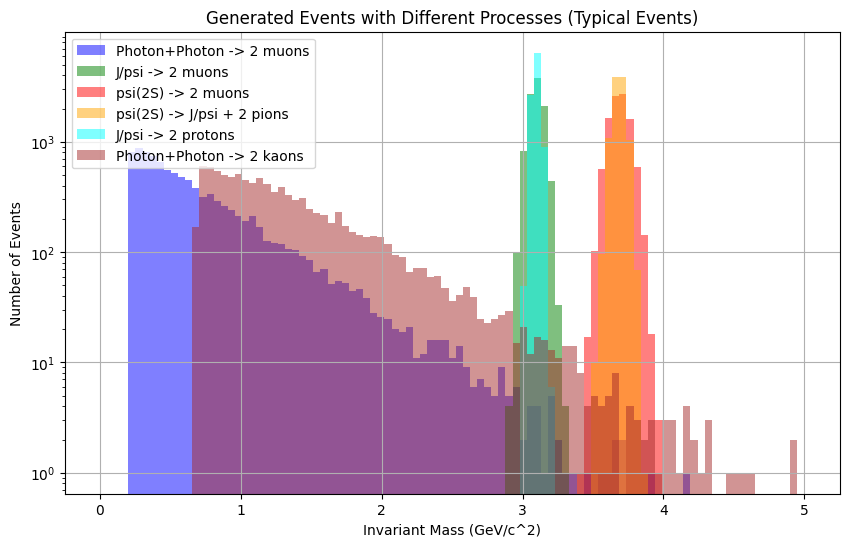

In [3]:
def plot_event_distribution_norm(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
    plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2S) -> 2 muons', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2S) -> J/psi + 2 pions', color='orange')
    plt.hist(events_jpsi_protons, bins, alpha=0.5, label='J/psi -> 2 protons', color='cyan')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_norm():
    events_photon_photon = generate_photon_photon_events(10000)
    events_jpsi = generate_jpsi_events(10000)
    events_psi2S_muons = generate_psi2S_muons_events(10000)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(10000)
    events_pp_kaons = generate_pp_kaon_events(10000)
    events_jpsi_protons = generate_jpsi_protons_events(10000)
    

    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)
    pp_kaons      = compute_invariant_masses_for_events(events_pp_kaons)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
    
    plot_event_distribution_norm(photon_photon, jpsi, psi2s_muons, psi2s_jpsi_pi, jpsi_protons, pp_kaons)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_norm()

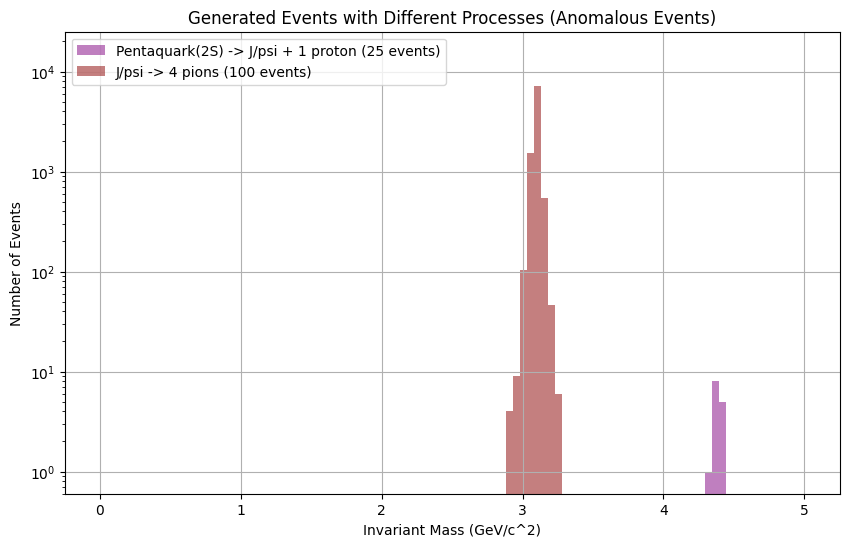

In [4]:
def plot_event_distribution_anom(events_pq, events_jpsi_4pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_pq, bins, alpha=0.5, label='Pentaquark(2S) -> J/psi + 1 proton (25 events)', color='purple')
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label='J/psi -> 4 pions (100 events)', color='darkred')
    #plt.hist(events_jpsi_3pions, bins, alpha=0.5, label='J/psi -> 3 pions (100 events)', color='darkblue')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.ylim(0.6,25000)
    plt.title('Generated Events with Different Processes (Anomalous Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    
    plt.show()

def generate_all_events_anom():
    events_pq = generate_pentaquark_events_new(n_pq1)
    events_jpsi_4pions = generate_jpsi_four_pions(n_jpsi_4pi)
    #events_jpsi_3pions = generate_jpsi_3pions_events(100)
    

    pentaquark    = compute_invariant_masses_for_events_pq(events_pq)
    jpsi_4pi      = compute_invariant_masses_for_events_jpsi_4pi(events_jpsi_4pions)
    #jpsi_3pi      = compute_invariant_masses_for_events_jpsi_3pi(events_jpsi_3pions)
    
    plot_event_distribution_anom(pentaquark, jpsi_4pi)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_anom()

### Testing the generators

Plotting the pT and mass distributions of the tracks from the generators

In [5]:
# import matplotlib.pyplot as plt

# n_pentaquark = 10000  # Define the number of events to simulate
# pentaq_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pentaquark)

# # Extract proton and muon momenta from events
# proton_momenta = [np.linalg.norm(event[2]) for event in pentaq_events]  # Proton is at index 2 in smearedTracks
# muon1_momenta = [np.linalg.norm(event[0]) for event in pentaq_events]    # Muon 1 is at index 0 in smearedTracks
# muon2_momenta = [np.linalg.norm(event[1]) for event in pentaq_events]    # Muon 2 is at index 1 in smearedTracks
# proton_pt = [np.sqrt(event[2][0]**2 + event[2][1]**2) for event in pentaq_events]
# muon1_pt = [np.sqrt(event[0][0]**2 + event[0][1]**2) for event in pentaq_events]
# muon2_pt = [np.sqrt(event[1][0]**2 + event[1][1]**2) for event in pentaq_events]

# def plot_momentum_and_pt(momentum, pt, particle_name, color):
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
#     # Total momentum plot
#     axes[0].hist(momentum, bins=30, color=color, alpha=0.7)
#     axes[0].set_title(f'{particle_name} Momentum')
#     axes[0].set_xlabel('Momentum (GeV/c)')
#     axes[0].set_ylabel('Frequency')
    
#     # Transverse momentum plot
#     axes[1].hist(pt, bins=30, color=color, alpha=0.7)
#     axes[1].set_title(f'{particle_name} Transverse Momentum')
#     axes[1].set_xlabel('Transverse Momentum $p_T$ (GeV/c)')
#     axes[1].set_ylabel('Frequency')
    
#     plt.tight_layout()
#     plt.show()

# # Plot for proton
# plot_momentum_and_pt(proton_momenta, proton_pt, 'Proton', 'blue')

# # Plot for muon 1
# plot_momentum_and_pt(muon1_momenta, muon1_pt, 'Muon 1', 'red')

# # Plot for muon 2
# plot_momentum_and_pt(muon2_momenta, muon2_pt, 'Muon 2', 'green')


In [6]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate events
# n_pentaquark = 10000  # Define the number of events to simulate
# events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pentaquark)

# # Calculate invariant mass for each event
# invariant_masses = []
# for event in events:
#     # Get the momenta and energies
#     muon1_p = np.array(event[0])  # Muon 1 3-momentum
#     muon2_p = np.array(event[1])  # Muon 2 3-momentum
#     proton_p = np.array(event[2])  # Proton 3-momentum
    
#     muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)  # Muon 1 energy
#     muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)  # Muon 2 energy
#     proton_E = np.sqrt(np.linalg.norm(proton_p)**2 + m_proton**2)  # Proton energy
    
#     # Calculate the total 3-momentum and energy
#     total_p = muon1_p + muon2_p + proton_p
#     total_E = muon1_E + muon2_E + proton_E
    
#     # Calculate the invariant mass
#     invariant_mass = np.sqrt(total_E**2 - np.linalg.norm(total_p)**2)
#     invariant_masses.append(invariant_mass)

# # Plot the invariant mass distribution
# plt.figure(figsize=(8, 6))
# plt.hist(invariant_masses, bins=30, color='purple', alpha=0.7)
# plt.title('Invariant Mass Distribution of Pentaquark (Muon + Proton)')
# plt.xlabel('Invariant Mass (GeV/c²)')
# plt.ylabel('Frequency')
# plt.xlim(4,5)
# plt.show()


In [7]:
# # Generate events
# n_pentaquark = 10000  # Define the number of events to simulate
# pqevents = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pentaquark)
# pqinvariant_masses = []
# for event in pqevents:
#     # Get the momenta and energies
#     pqmuon1_p = np.array(event[0])  # Muon 1 3-momentum
#     pqmuon2_p = np.array(event[1])  # Muon 2 3-momentum
#     pqproton_p = np.array(event[2])  # Proton 3-momentum
    
#     pqmuon1_E = np.sqrt(np.linalg.norm(pqmuon1_p)**2 + m_muon**2)  # Muon 1 energy
#     pqmuon2_E = np.sqrt(np.linalg.norm(pqmuon2_p)**2 + m_muon**2)  # Muon 2 energy
#     pqproton_E = np.sqrt(np.linalg.norm(pqproton_p)**2 + m_proton**2)  # Proton energy
    
#     # Calculate the total 3-momentum and energy
#     pqtotal_p = pqmuon1_p + pqmuon2_p + pqproton_p
#     pqtotal_E = pqmuon1_E + pqmuon2_E + pqproton_E
    
#     # Calculate the invariant mass
#     pqinvariant_mass = np.sqrt(pqtotal_E**2 - np.linalg.norm(pqtotal_p)**2)
#     pqinvariant_masses.append(pqinvariant_mass)

# jpsi_p_events = generate_jpsi_protons_events(10000)
# jpsi_p_invariant_masses = []
# for event in jpsi_p_events:
#     # Get the momenta and energies
#     jpsi_p_proton1_p = np.array(event[0])  # Proton 1 3-momentum
#     jpsi_p_proton2_p = np.array(event[1])  # Proton 2 3-momentum
    
#     jpsi_p_proton1_E = np.sqrt(np.linalg.norm(jpsi_p_proton1_p)**2 + m_proton**2)  # Proton 1 energy
#     jpsi_p_proton2_E = np.sqrt(np.linalg.norm(jpsi_p_proton2_p)**2 + m_proton**2)  # Proton 2 energy
    
#     # Calculate the total 3-momentum and energy
#     jpsi_p_total_p = jpsi_p_proton1_p + jpsi_p_proton2_p 
#     jpsi_p_total_E = jpsi_p_proton1_E + jpsi_p_proton2_E 
    
#     # Calculate the invariant mass
#     jpsi_p_invariant_mass = np.sqrt(jpsi_p_total_E**2 - np.linalg.norm(jpsi_p_total_p)**2)
#     jpsi_p_invariant_masses.append(jpsi_p_invariant_mass)

# pp_kaon_events= generate_pp_kaon_events(10000)
# pp_kaon_invariant_masses = []
# for event in pp_kaon_events:
#     # Get the momenta and energies
#     pp_kaon1_p = np.array(event[0])  # Kaon 1 3-momentum
#     pp_kaon2_p = np.array(event[1])  # Kaon 2 3-momentum
    
#     pp_kaon1_E = np.sqrt(np.linalg.norm(pp_kaon1_p)**2 + m_kaon**2)  # Kaon 1 energy
#     pp_kaon2_E = np.sqrt(np.linalg.norm(pp_kaon2_p)**2 + m_kaon**2)  # Kaon 2 energy
    
#     # Calculate the total 3-momentum and energy
#     pp_kaon_total_p = pp_kaon1_p + pp_kaon2_p 
#     pp_kaon_total_E = pp_kaon1_E + pp_kaon2_E 
    
#     # Calculate the invariant mass
#     pp_kaon_invariant_mass = np.sqrt(pp_kaon_total_E**2 - np.linalg.norm(pp_kaon_total_p)**2)
#     pp_kaon_invariant_masses.append(pp_kaon_invariant_mass)

# # Plot the invariant mass distribution
# plt.figure(figsize=(8, 6))
# plt.hist(pqinvariant_masses, bins=30, color='purple', alpha=0.7)
# plt.hist(jpsi_p_invariant_masses, bins=30, color='blue', alpha=0.7)
# plt.hist(pp_kaon_invariant_masses, bins=30, color='green', alpha=0.7)
# plt.title('Invariant Mass Distribution')
# plt.xlabel('Invariant Mass (GeV/c²)')
# plt.ylabel('Frequency')
# plt.xlim(0,5)
# plt.show()

##### Just to check if the distribution of the pentaquark looks ok before smearing...

In [8]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate events without smearing
# n_pentaquark = 1000  # Define the number of events to simulate
# events = []  # List to store events without smearing

# # Simulate events without applying smearing
# for _ in range(n_pentaquark):
#     # Step 1: Simulate the pentaquark decay -> J/psi + proton
#     jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
    
#     # Store the unsmeared J/psi and proton momentum and energy
#     events.append((jpsi_p, jpsi_E, proton_p, proton_E))

# # Calculate invariant mass for each event (J/psi + proton system)
# invariant_masses = []
# for event in events:
#     jpsi_p = np.array(event[0])     # J/psi 3-momentum (unsmeared)
#     jpsi_E = event[1]               # J/psi energy (unsmeared)
#     proton_p = np.array(event[2])   # Proton 3-momentum (unsmeared)
#     proton_E = event[3]             # Proton energy (unsmeared)
    
#     # Calculate the total 3-momentum and energy of the J/psi + proton system
#     total_p = jpsi_p + proton_p
#     total_E = jpsi_E + proton_E
    
#     # Calculate the invariant mass
#     invariant_mass = np.sqrt(total_E**2 - np.linalg.norm(total_p)**2)
#     invariant_masses.append(invariant_mass)

# # Plot the invariant mass distribution
# plt.figure(figsize=(8, 6))
# plt.hist(invariant_masses, bins=30, color='blue', alpha=0.7)
# plt.title('Invariant Mass Distribution of J/psi + Proton (No Smearing)')
# plt.xlabel('Invariant Mass (GeV/c²)')
# plt.ylabel('Frequency')
# plt.show()


### Psi(2S) Quality Plots

In [9]:
# psi2s_jpsi_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(1000)

# # Extract proton and muon momenta from events
# muon1_momenta = [np.linalg.norm(event[0]) for event in psi2s_jpsi_events]    # Muon 1 is at index 0 in smearedTracks
# muon2_momenta = [np.linalg.norm(event[1]) for event in psi2s_jpsi_events]    # Muon 2 is at index 1 in smearedTracks
# pion1_momenta = [np.linalg.norm(event[2]) for event in psi2s_jpsi_events]    # Pion 1 is at index 2 in smearedTracks
# pion2_momenta = [np.linalg.norm(event[3]) for event in psi2s_jpsi_events]    # Pion 2 is at index 3 in smearedTracks

# muon1_pt = [np.sqrt(event[0][0]**2 + event[0][1]**2) for event in psi2s_jpsi_events]
# muon2_pt = [np.sqrt(event[1][0]**2 + event[1][1]**2) for event in psi2s_jpsi_events]
# pion1_pt = [np.sqrt(event[2][0]**2 + event[2][1]**2) for event in psi2s_jpsi_events]
# pion2_pt = [np.sqrt(event[3][0]**2 + event[3][1]**2) for event in psi2s_jpsi_events]


# def plot_momentum_and_pt(momentum, pt, particle_name, color):
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
#     # Total momentum plot
#     axes[0].hist(momentum, bins=30, color=color, alpha=0.7)
#     axes[0].set_title(f'{particle_name} Momentum')
#     axes[0].set_xlabel('Momentum (GeV/c)')
#     axes[0].set_ylabel('Frequency')
    
#     # Transverse momentum plot
#     axes[1].hist(pt, bins=30, color=color, alpha=0.7)
#     axes[1].set_title(f'{particle_name} Transverse Momentum')
#     axes[1].set_xlabel('Transverse Momentum $p_T$ (GeV/c)')
#     axes[1].set_ylabel('Frequency')
    
#     plt.tight_layout()
#     plt.show()

# # Plot for pion 1
# plot_momentum_and_pt(pion1_momenta, pion1_pt, 'Pion 1', 'blue')

# #Plot for pion 2
# plot_momentum_and_pt(pion2_momenta, pion2_pt, 'Pion 2', 'purple')

# # Plot for muon 1
# plot_momentum_and_pt(muon1_momenta, muon1_pt, 'Muon 1', 'red')

# # Plot for muon 2
# plot_momentum_and_pt(muon2_momenta, muon2_pt, 'Muon 2', 'green')


### GammaGamma in MuMu 

In [10]:
# pp_mu_events = generate_photon_photon_events(1000)

# muon1_momenta = [np.linalg.norm(event[0]) for event in pp_mu_events]    # Muon 1 is at index 0 in smearedTracks
# muon2_momenta = [np.linalg.norm(event[1]) for event in pp_mu_events]    # Muon 2 is at index 1 in smearedTracks
# muon1_pt = [np.sqrt(event[0][0]**2 + event[0][1]**2) for event in pp_mu_events]
# muon2_pt = [np.sqrt(event[1][0]**2 + event[1][1]**2) for event in pp_mu_events]

# def plot_momentum_and_pt(momentum, pt, particle_name, color):
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
#     # Total momentum plot
#     axes[0].hist(momentum, bins=30, color=color, alpha=0.7)
#     axes[0].set_title(f'{particle_name} Momentum')
#     axes[0].set_xlabel('Momentum (GeV/c)')
#     axes[0].set_ylabel('Frequency')
    
#     # Transverse momentum plot
#     axes[1].hist(pt, bins=30, color=color, alpha=0.7)
#     axes[1].set_title(f'{particle_name} Transverse Momentum')
#     axes[1].set_xlabel('Transverse Momentum $p_T$ (GeV/c)')
#     axes[1].set_ylabel('Frequency')
    
#     plt.tight_layout()
#     plt.show()

# # Plot for muon 1
# plot_momentum_and_pt(muon1_momenta, muon1_pt, 'Muon 1', 'red')

# # Plot for muon 2
# plot_momentum_and_pt(muon2_momenta, muon2_pt, 'Muon 2', 'green')


### GammaGamma in KK

In [11]:
# pp_k_events = generate_pp_kaon_events(1000)

# kaon1_momenta = [np.linalg.norm(event[0]) for event in pp_k_events]    # Muon 2 is at index 1 in smearedTracks
# kaon2_momenta = [np.linalg.norm(event[1]) for event in pp_k_events]    # Muon 2 is at index 1 in smearedTracks
# kaon1_pt = [np.sqrt(event[0][0]**2 + event[0][1]**2) for event in pp_k_events]
# kaon2_pt = [np.sqrt(event[1][0]**2 + event[1][1]**2) for event in pp_k_events]

# def plot_momentum_and_pt(momentum, pt, particle_name, color):
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
#     # Total momentum plot
#     axes[0].hist(momentum, bins=30, color=color, alpha=0.7)
#     axes[0].set_title(f'{particle_name} Momentum')
#     axes[0].set_xlabel('Momentum (GeV/c)')
#     axes[0].set_ylabel('Frequency')
    
#     # Transverse momentum plot
#     axes[1].hist(pt, bins=30, color=color, alpha=0.7)
#     axes[1].set_title(f'{particle_name} Transverse Momentum')
#     axes[1].set_xlabel('Transverse Momentum $p_T$ (GeV/c)')
#     axes[1].set_ylabel('Frequency')
    
#     plt.tight_layout()
#     plt.show()

# # Plot for muon 1
# plot_momentum_and_pt(kaon1_momenta, kaon1_pt, 'Kaon 1', 'red')

# # Plot for muon 2
# plot_momentum_and_pt(kaon2_momenta, kaon2_pt, 'Kaon 2', 'green')


### Jpsi in MuMu

In [12]:
# jpsi_mu_events = generate_jpsi_events(1000)

# muon1_momenta = [np.linalg.norm(event[0]) for event in jpsi_mu_events]    # Muon 1 is at index 0 in smearedTracks
# muon2_momenta = [np.linalg.norm(event[1]) for event in jpsi_mu_events]    # Muon 2 is at index 1 in smearedTracks
# muon1_pt = [np.sqrt(event[0][0]**2 + event[0][1]**2) for event in jpsi_mu_events]
# muon2_pt = [np.sqrt(event[1][0]**2 + event[1][1]**2) for event in jpsi_mu_events]

# def plot_momentum_and_pt(momentum, pt, particle_name, color):
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
#     # Total momentum plot
#     axes[0].hist(momentum, bins=30, color=color, alpha=0.7)
#     axes[0].set_title(f'{particle_name} Momentum')
#     axes[0].set_xlabel('Momentum (GeV/c)')
#     axes[0].set_ylabel('Frequency')
    
#     # Transverse momentum plot
#     axes[1].hist(pt, bins=30, color=color, alpha=0.7)
#     axes[1].set_title(f'{particle_name} Transverse Momentum')
#     axes[1].set_xlabel('Transverse Momentum $p_T$ (GeV/c)')
#     axes[1].set_ylabel('Frequency')
    
#     plt.tight_layout()
#     plt.show()

# # Plot for muon 1
# plot_momentum_and_pt(muon1_momenta, muon1_pt, 'Muon 1', 'red')

# # Plot for muon 2
# plot_momentum_and_pt(muon2_momenta, muon2_pt, 'Muon 2', 'green')


### Psi(2S) to MuMu

In [13]:
# psi2s_mu_events = generate_psi2S_muons_events(1000)

# muon1_momenta = [np.linalg.norm(event[0]) for event in psi2s_mu_events]    # Muon 1 is at index 0 in smearedTracks
# muon2_momenta = [np.linalg.norm(event[1]) for event in psi2s_mu_events]    # Muon 2 is at index 1 in smearedTracks
# muon1_pt = [np.sqrt(event[0][0]**2 + event[0][1]**2) for event in psi2s_mu_events]
# muon2_pt = [np.sqrt(event[1][0]**2 + event[1][1]**2) for event in psi2s_mu_events]

# def plot_momentum_and_pt(momentum, pt, particle_name, color):
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
#     # Total momentum plot
#     axes[0].hist(momentum, bins=30, color=color, alpha=0.7)
#     axes[0].set_title(f'{particle_name} Momentum')
#     axes[0].set_xlabel('Momentum (GeV/c)')
#     axes[0].set_ylabel('Frequency')
    
#     # Transverse momentum plot
#     axes[1].hist(pt, bins=30, color=color, alpha=0.7)
#     axes[1].set_title(f'{particle_name} Transverse Momentum')
#     axes[1].set_xlabel('Transverse Momentum $p_T$ (GeV/c)')
#     axes[1].set_ylabel('Frequency')
    
#     plt.tight_layout()
#     plt.show()

# # Plot for muon 1
# plot_momentum_and_pt(muon1_momenta, muon1_pt, 'Muon 1', 'red')

# # Plot for muon 2
# plot_momentum_and_pt(muon2_momenta, muon2_pt, 'Muon 2', 'green')


### Jpsi to PP 

In [14]:
# jpsi_pro_events = generate_jpsi_protons_events(1000) 

# proton1_momenta = [np.linalg.norm(event[0]) for event in jpsi_pro_events]    # Proton 1 is at index 0 in smearedTracks
# proton2_momenta = [np.linalg.norm(event[1]) for event in jpsi_pro_events]    # Proton 2 is at index 1 in smearedTracks
# proton1_pt = [np.sqrt(event[0][0]**2 + event[0][1]**2) for event in jpsi_pro_events]
# proton2_pt = [np.sqrt(event[1][0]**2 + event[1][1]**2) for event in jpsi_pro_events]

# def plot_momentum_and_pt(momentum, pt, particle_name, color):
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
#     # Total momentum plot
#     axes[0].hist(momentum, bins=30, color=color, alpha=0.7)
#     axes[0].set_title(f'{particle_name} Momentum')
#     axes[0].set_xlabel('Momentum (GeV/c)')
#     axes[0].set_ylabel('Frequency')
    
#     # Transverse momentum plot
#     axes[1].hist(pt, bins=30, color=color, alpha=0.7)
#     axes[1].set_title(f'{particle_name} Transverse Momentum')
#     axes[1].set_xlabel('Transverse Momentum $p_T$ (GeV/c)')
#     axes[1].set_ylabel('Frequency')
    
#     plt.tight_layout()
#     plt.show()

# # Plot for muon 1
# plot_momentum_and_pt(proton1_momenta, proton1_pt, 'Proton 1', 'red')

# # Plot for muon 2
# plot_momentum_and_pt(proton2_momenta, proton2_pt, 'Proton 2', 'green')


### Jpsi to 4 pions quality checks

In [15]:
# # Generate events
# events_jpsi_4pions = generate_jpsi_four_pions(10000)
# jpsi_4pi      = compute_invariant_masses_for_events_jpsi_4pi(events_jpsi_4pions)

# # Plot the invariant mass distribution
# plt.figure(figsize=(8, 6))
# plt.hist(jpsi_4pi, bins=30, color='purple', alpha=0.7)
# plt.title('Invariant Mass Distribution of Jpsi -> 4 pions')
# plt.xlabel('Invariant Mass (GeV/c²)')
# plt.ylabel('Frequency')
# #plt.xlim()
# plt.show()


[209.71239208864134, 204.63578023035214, 233.83631873641173, 259.004357491409, 253.1897370803162, 218.79157671547566, 264.5367016819984, 198.53972196615592, 247.32552313990004, 241.59324576174316, 211.97175835365374, 214.19635239013041, 232.7181200438552, 195.83978108147627, 226.26314613662709, 215.25158184934767, 200.79849834772278, 230.04356835716908, 224.59836584510225, 195.9735289690768, 224.95383764467786, 197.21644519129364, 259.35112340297127, 197.87934543363377, 197.9544558013987, 196.3161151635974, 256.9453350198717, 248.20473728977746, 222.95747613302228, 217.60874710183035, 213.92869837734236, 242.30042931275813, 202.05379559875237, 203.54838227524573, 207.05284178655785, 213.0340502223805, 256.7996850704056, 209.82482696776415, 216.56883064145546, 198.71996570794687, 209.73503823001522, 179.79488414980477, 223.09165734283928, 191.04044695731412, 266.3198745782713, 167.28655513917425, 225.8247814111264, 215.33287560218926, 253.09363859766268, 226.54552383302237, 198.67883966

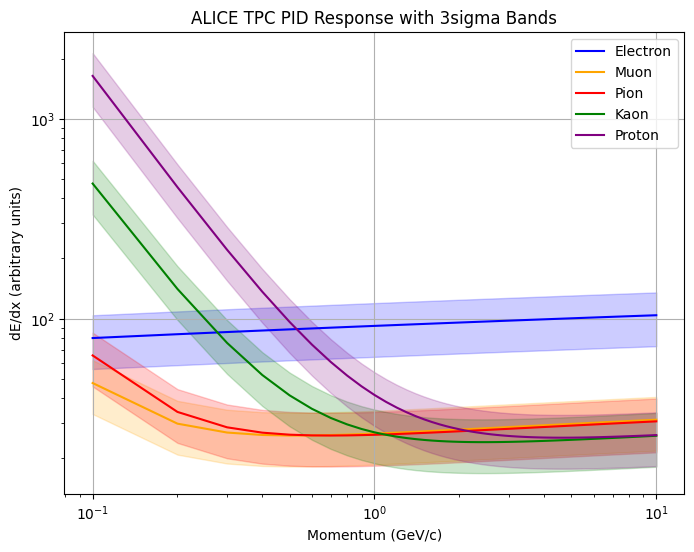

In [16]:
#PID PLOT WITH BANDS
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = ((K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)) * 17
    
    return dEdx

def tpc_pid_response(momentum, particle_type, stretch_factor=1):
    mass_dict = {
        'electron': 0.000511,
        'muon': 0.10566,
        'pion': 0.13957,
        'kaon': 0.49367,
        'proton': 0.93827
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    dEdx = bethe_bloch(momentum, mass) * stretch_factor
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

def error_extremes(momentum, particle_type, stretch_factor):
    _, lower_band, upper_band = tpc_pid_response(momentum, particle_type, stretch_factor)
    return upper_band, lower_band

def random_gaussian(mean, sigma):

    return np.random.normal(mean, sigma)

def gaussian_tpc_response(momentum, particle_type, stretch_factor):

    # Get the mean dE/dx from TPC PID response
    mean_dEdx, _, _ = tpc_pid_response(momentum, particle_type,stretch_factor)
    
    # Calculate the extremes for the 3σ band
    upper_band, lower_band = error_extremes(momentum, particle_type, stretch_factor)
    
    # Estimate σ as 1/3rd of the difference between the upper and lower bands
    sigma_dEdx = (upper_band - lower_band) / 6
    
    # Generate a random dE/dx value from a Gaussian distribution
    random_dEdx = random_gaussian(mean_dEdx, sigma_dEdx)
    
    return random_dEdx

 # Example usage
momentum = .3  # Example momentum in GeV/c
particle_type = 'proton'  # Example particle type
x=1000 #Amount of random numbers

rn=[]
for _ in range(x):

    if (particle_type == 'electron'):
        stretch_factor=1
    elif (particle_type == 'muon'):
        stretch_factor=.41
    elif (particle_type == 'pion'):
        stretch_factor=.41
    elif (particle_type == 'kaon'):
        stretch_factor=.38
    elif (particle_type == 'proton'):
        stretch_factor=.40

    random_value = gaussian_tpc_response(momentum, particle_type, stretch_factor)
    rn.append(random_value)
print(rn)

xvalues=[]
for _ in range(x):
    xvalues.append(momentum)
print(xvalues)

def plot_tpc_pid_response(momentum_range):
    """
    Plot the TPC PID response and error bands for various particle types.
    """
    # Calculate responses and PID bands for different particle species
    particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    plt.figure(figsize=(8, 6))
    
    for particle, settings in particle_types.items():
        response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
        plt.plot(momentum_range, response, label=particle, color=settings['color'])
        plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.2)
    
   # plt.plot(xvalues,rn, color= 'black')
    
    plt.xlabel('Momentum (GeV/c)')
    plt.ylabel('dE/dx (arbitrary units)')
    plt.xscale('log')  # Log scale for x-axis
    plt.yscale('log')  # Log scale for y-axis
    plt.title('ALICE TPC PID Response with 3sigma Bands')
    plt.legend()
    plt.grid(True)
    #plt.savefig("PID_empty.pdf")
    plt.show()
    
# Generate a momentum range and plot
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c
plot_tpc_pid_response(momentum_range)


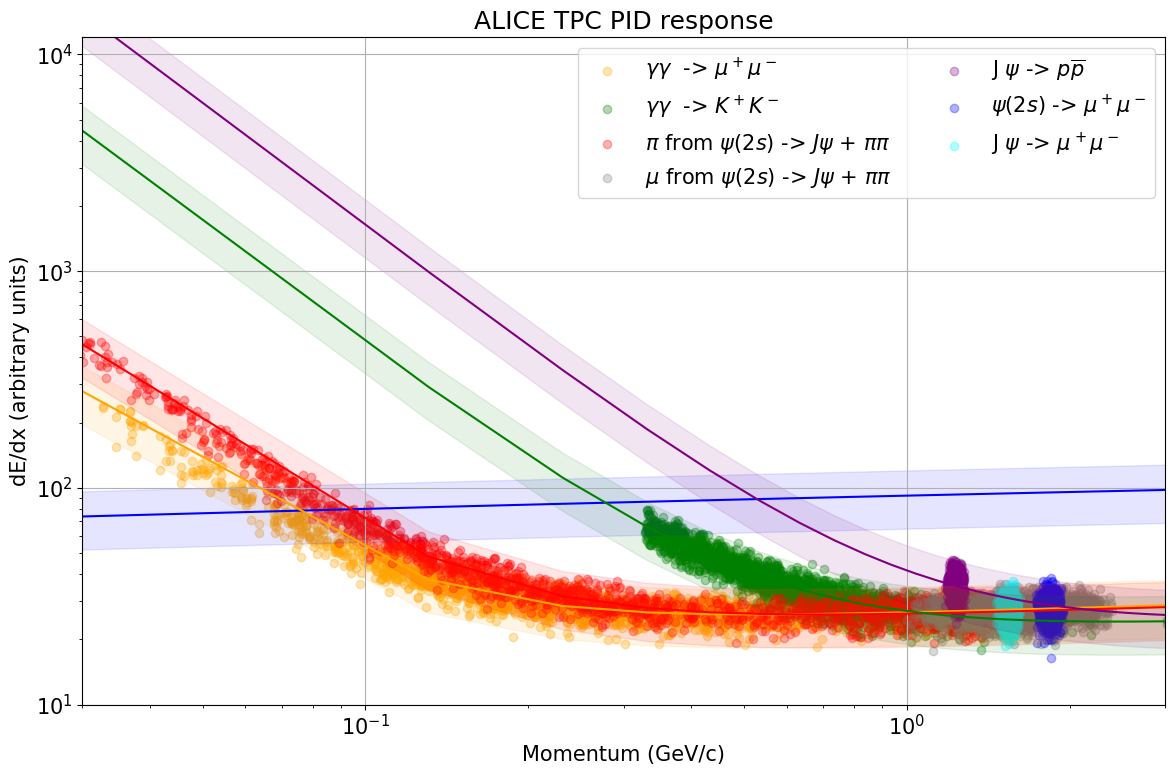

In [17]:
n_events = 1000

plt.rcParams.update({'font.size': 15})

#Generate Jpsi events
jpsimuon_events = generate_jpsi_events(n_events)
jpsimuon1_dEdx = []
jpsimuon2_dEdx = []
jpsimuon1_momenta = []
jpsimuon2_momenta = []

# Iterate over events and calculate PID response for muons
for event in jpsimuon_events:
    jpsimuon1_p, jpsimuon2_p = event  # Extract momenta of muons
    
    # Calculate momentum magnitudes
    jpsimuon1_momentum = np.linalg.norm(jpsimuon1_p)
    jpsimuon2_momentum = np.linalg.norm(jpsimuon2_p)
    
    # Append momenta for later use
    jpsimuon1_momenta.append(jpsimuon1_momentum)
    jpsimuon1_momenta.append(jpsimuon2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsimuon1 = gaussian_tpc_response(jpsimuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_jpsimuon2 = gaussian_tpc_response(jpsimuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    jpsimuon1_dEdx.append(dEdx_jpsimuon1)
    jpsimuon1_dEdx.append(dEdx_jpsimuon2)

# Generate photon-photon events
photonmuon_events = generate_photon_photon_events(n_events)
photonmuon1_dEdx = []
photonmuon2_dEdx = []
photonmuon1_momenta = []
photonmuon2_momenta = []

# Iterate over events and calculate PID response for muons
for event in photonmuon_events:
    photonmuon1_p, photonmuon2_p = event  # Extract momenta of muons

    # Calculate momentum magnitudes
    photonmuon1_momentum = np.linalg.norm(photonmuon1_p)
    photonmuon2_momentum = np.linalg.norm(photonmuon2_p)
    
    # Append momenta for later use
    photonmuon1_momenta.append(photonmuon1_momentum)
    photonmuon1_momenta.append(photonmuon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each muon
    dEdx_photonmuon1 = gaussian_tpc_response(photonmuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_photonmuon2 = gaussian_tpc_response(photonmuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    photonmuon1_dEdx.append(dEdx_photonmuon1)
    photonmuon1_dEdx.append(dEdx_photonmuon2)

#Generate psi2s muon events
psi2smuon_events = generate_psi2S_muons_events(n_events)
psi2smuon1_dEdx = []
psi2smuon2_dEdx = []
psi2smuon1_momenta = []
psi2smuon2_momenta = []

for event in psi2smuon_events:
    psi2smuon1_p, psi2smuon2_p = event  # Extract momenta of muons

    # Calculate momentum magnitudes
    psi2smuon1_momentum = np.linalg.norm(psi2smuon1_p)
    psi2smuon2_momentum = np.linalg.norm(psi2smuon2_p)
    
    # Append momenta for later use
    psi2smuon1_momenta.append(psi2smuon1_momentum)
    psi2smuon1_momenta.append(psi2smuon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each muon
    dEdx_psi2smuon1 = gaussian_tpc_response(psi2smuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2smuon2 = gaussian_tpc_response(psi2smuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    psi2smuon1_dEdx.append(dEdx_psi2smuon1)
    psi2smuon1_dEdx.append(dEdx_psi2smuon2)


#Generate psi2s muon pion events
psi2s_jpsi_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events)
psi2s_jpsi_muon1_dEdx = []
psi2s_jpsi_muon2_dEdx = []
psi2s_jpsi_pion1_dEdx = []
psi2s_jpsi_pion2_dEdx = []
psi2s_jpsi_muon1_momenta = []
psi2s_jpsi_muon2_momenta = []
psi2s_jpsi_pion1_momenta = []
psi2s_jpsi_pion2_momenta = []

for event in psi2s_jpsi_pions_events:
    psi2s_jpsi_muon1_p, psi2s_jpsi_muon2_p, psi2s_jpsi_pion1_p, psi2s_jpsi_pion2_p, *_ = event

    psi2s_jpsi_muon1_momentum = np.linalg.norm(psi2s_jpsi_muon1_p)
    psi2s_jpsi_muon2_momentum = np.linalg.norm(psi2s_jpsi_muon2_p)
    psi2s_jpsi_pion1_momentum = np.linalg.norm(psi2s_jpsi_pion1_p)
    psi2s_jpsi_pion2_momentum = np.linalg.norm(psi2s_jpsi_pion2_p)

    psi2s_jpsi_muon1_momenta.append(psi2s_jpsi_muon1_momentum)
    psi2s_jpsi_muon1_momenta.append(psi2s_jpsi_muon2_momentum)
    psi2s_jpsi_pion1_momenta.append(psi2s_jpsi_pion1_momentum)
    psi2s_jpsi_pion1_momenta.append(psi2s_jpsi_pion2_momentum)    

    dEdx_psi2s_jpsi_muon1 = gaussian_tpc_response(psi2s_jpsi_muon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2s_jpsi_muon2 = gaussian_tpc_response(psi2s_jpsi_muon2_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2s_jpsi_pion1 = gaussian_tpc_response(psi2s_jpsi_pion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_psi2s_jpsi_pion2 = gaussian_tpc_response(psi2s_jpsi_pion2_momentum, 'pion', stretch_factor=0.41)

    psi2s_jpsi_muon1_dEdx.append(dEdx_psi2s_jpsi_muon1)
    psi2s_jpsi_muon1_dEdx.append(dEdx_psi2s_jpsi_muon2)
    psi2s_jpsi_pion1_dEdx.append(dEdx_psi2s_jpsi_pion1)
    psi2s_jpsi_pion1_dEdx.append(dEdx_psi2s_jpsi_pion2)

# Generate photon-photon kaon events
photonkaon_events = generate_pp_kaon_events(n_events)
photonkaon1_dEdx = []
photonkaon2_dEdx = []
photonkaon1_momenta = []
photonkaon2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonkaon_events:
    photonkaon1_p, photonkaon2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonkaon1_momentum = np.linalg.norm(photonkaon1_p)
    photonkaon2_momentum = np.linalg.norm(photonkaon2_p)
    
    # Append momenta for later use
    photonkaon1_momenta.append(photonkaon1_momentum)
    photonkaon1_momenta.append(photonkaon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonkaon1 = gaussian_tpc_response(photonkaon1_momentum, 'kaon', stretch_factor=0.38)
    dEdx_photonkaon2 = gaussian_tpc_response(photonkaon2_momentum, 'kaon', stretch_factor=0.38)
    
    # Store the dE/dx values
    photonkaon1_dEdx.append(dEdx_photonkaon1)
    photonkaon1_dEdx.append(dEdx_photonkaon2)

#Generate Jpsi proton events
jpsiproton_events = generate_jpsi_protons_events(n_events)
jpsiproton1_dEdx = []
jpsiproton2_dEdx = []
jpsiproton1_momenta = []
jpsiproton2_momenta = []

# Iterate over events and calculate PID response for protons
for event in jpsiproton_events:
    jpsiproton1_p, jpsiproton2_p = event  # Extract momenta of protons
    
    # Calculate momentum magnitudes
    jpsiproton1_momentum = np.linalg.norm(jpsiproton1_p)
    jpsiproton2_momentum = np.linalg.norm(jpsiproton2_p)
    
    # Append momenta for later use
    jpsiproton1_momenta.append(jpsiproton1_momentum)
    jpsiproton1_momenta.append(jpsiproton2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsiproton1 = gaussian_tpc_response(jpsiproton1_momentum, 'proton', stretch_factor=0.4)
    dEdx_jpsiproton2 = gaussian_tpc_response(jpsiproton2_momentum, 'proton', stretch_factor=0.4)
    
    # Store the dE/dx values
    jpsiproton1_dEdx.append(dEdx_jpsiproton1)
    jpsiproton1_dEdx.append(dEdx_jpsiproton2)

#Generate pentaquark muon proton events
pentaquark_muons_proton_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events)
pentaquark_muon1_dEdx = []
pentaquark_muon2_dEdx = []
pentaquark_proton_dEdx = []
pentaquark_muon1_momenta = []
pentaquark_muon2_momenta = []
pentaquark_proton_momenta = []

for event in pentaquark_muons_proton_events:
    pentaquark_muon1_p, pentaquark_muon2_p, pentaquark_proton_p, *_ = event

    pentaquark_muon1_momentum = np.linalg.norm(pentaquark_muon1_p)
    pentaquark_muon2_momentum = np.linalg.norm(pentaquark_muon2_p)
    pentaquark_proton_momentum = np.linalg.norm(pentaquark_proton_p)

    pentaquark_muon1_momenta.append(pentaquark_muon1_momentum)
    pentaquark_muon1_momenta.append(pentaquark_muon2_momentum)
    pentaquark_proton_momenta.append(pentaquark_proton_momentum)
  
    dEdx_pentaquark_muon1 = gaussian_tpc_response(pentaquark_muon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_pentaquark_muon2 = gaussian_tpc_response(pentaquark_muon2_momentum, 'muon', stretch_factor=0.41)
    dEdx_pentaquark_proton = gaussian_tpc_response(pentaquark_proton_momentum, 'proton', stretch_factor=0.4)
  
    pentaquark_muon1_dEdx.append(dEdx_pentaquark_muon1)
    pentaquark_muon1_dEdx.append(dEdx_pentaquark_muon2)
    pentaquark_proton_dEdx.append(dEdx_pentaquark_proton)

# Plot the results
plt.figure(figsize=(12, 8)) 


#Photon Muon 
plt.scatter(photonmuon1_momenta, photonmuon1_dEdx, color='orange', alpha=.3, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 2 PID Response')
plt.grid(True)
plt.legend()

#Jpsi Kaon dE/dx vs Momentum
plt.scatter(photonkaon1_momenta, photonkaon1_dEdx, color='green', alpha=.3, label=r'$\gamma \gamma$  -> $K^+ K^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Kaon PID Response')
plt.grid(True)
plt.legend()


# Scatter plot for Pions
plt.scatter(psi2s_jpsi_pion1_momenta, psi2s_jpsi_pion1_dEdx, color='red', alpha=0.3, label=r'$\pi$ from $\psi (2s)$ -> $J \psi$ + $\pi \pi$')
plt.xlabel('Event Index')
plt.ylabel('Momentum (GeV/c)')
plt.title('Momentum Distribution for Muons from psi(2S) J/psi Events')
plt.legend()
plt.grid(True)

# Scatter plot for Muons
plt.scatter(psi2s_jpsi_muon1_momenta, psi2s_jpsi_muon1_dEdx, color='grey', alpha=0.3, label=r'$\mu$ from $\psi (2s)$ -> $J \psi$ + $\pi \pi$')
plt.xlabel('Event Index')
plt.ylabel('Momentum (GeV/c)')
plt.title('Momentum Distribution for Muons from psi(2S) J/psi Events')
plt.legend()
plt.grid(True)

#Jpsi Proton dE/dx vs Momentum
plt.scatter(jpsiproton1_momenta, jpsiproton1_dEdx, color='purple', alpha=.3, label=r'J $\psi$ -> $p \overline{p}$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton 1 PID Response')
plt.grid(True)
plt.legend()

#Psi2s Muon 
plt.scatter(psi2smuon1_momenta, psi2smuon1_dEdx, color='blue', alpha=.3, label=r'$\psi (2s)$ -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 2 PID Response')
plt.grid(True)
plt.legend()

#Jpsi Muon dE/dx vs Momentum
plt.scatter(jpsimuon1_momenta, jpsimuon1_dEdx, color='cyan', alpha=.3, label=r'J $\psi$ -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 1 PID Response')
plt.grid(True)
plt.legend()

# Scatter plot for Pentaquark Muons
# plt.scatter(pentaquark_muon1_momenta, pentaquark_muon1_dEdx, color='brown', alpha=0.3, label=r'$\mu$ from pentaquark')
# plt.xlabel('Event Index')
# plt.ylabel('Momentum (GeV/c)')
# plt.title('Momentum Distribution for Muons from Pentaquark Events')
# plt.legend()
# plt.grid(True)

# # Scatter plot for Pentaquark Proton 
# plt.scatter(pentaquark_proton_momenta, pentaquark_proton_dEdx, color='gray', alpha=0.3, label=r'p from pentaquark')
# plt.xlabel('Event Index')
# plt.ylabel('Momentum (GeV/c)')
# plt.title('Momentum Distribution for Proton from Pentaquark Events')
# plt.legend()
# plt.grid(True)


particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    
momentum_range = np.linspace(0.03, 10, 100)   
for particle, settings in particle_types.items():
    response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
    plt.plot(momentum_range, response, label = '_nolegend_', color=settings['color'])
    plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.1)
    # plt.legend()
    
   # plt.plot(xvalues,rn, color= 'black')
    

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.03, 3])
plt.ylim([10, 12000])
plt.title('ALICE TPC PID response')
plt.legend(loc='upper right', ncol = 2, fontsize="15") #, fontsize="15"
plt.grid(True)

# Get current axes and create a legend with 2 columns
# ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=2)
# ax.set_xlim([0.03, 3])
# ax.set_ylim([10, 100000])

# Adjust layout to reserve space for the legend (e.g. top 10% of the figure)
plt.tight_layout() #rect=[0, 0, 1, 0.9]
plt.show()



In [18]:


# # Calculate the muon PID response and bands
# muonresponse, lower_band_mu, upper_band_mu = tpc_pid_response(momentum_range, 'muon', .41)
# pionresponse, lower_band_pi, upper_band_pi = tpc_pid_response(momentum_range, 'pion', .41)
# protonresponse, lower_band_p, upper_band_p = tpc_pid_response(momentum_range, 'proton', .4)
# kaonresponse, lower_band_ka, upper_band_ka = tpc_pid_response(momentum_range, 'kaon', .38)

# # Plot the response and the 3σ bands
# plt.figure(figsize=(12, 30))
# # plt.plot(momentum_range, muonresponse, label=particle_type, color=color)
# # plt.fill_between(momentum_range, lower_band, upper_band, color=color, alpha=0.2, label=f'{particle_type} Band')
    
# # Jpsi Muon 1 dE/dx vs Momentum
# plt.subplot(5, 2, 1)
# plt.plot(momentum_range, muonresponse, label='muon', color='orange')
# plt.fill_between(momentum_range, lower_band_mu, upper_band_mu, color='orange', alpha=0.2, label=f'{particle_type} Band')
# plt.scatter(jpsimuon1_momenta, jpsimuon1_dEdx, color='blue', alpha=0.3, label='Jpsi Muons')
# plt.xlim(1.4,1.7)
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.title('J/psi -> Muons PID Response')
# plt.grid(True)
# plt.legend()

# #Psi2s Muon 1
# plt.subplot(5, 2, 2)
# plt.plot(momentum_range, muonresponse, label='muon', color='orange')
# plt.fill_between(momentum_range, lower_band_mu, upper_band_mu, color='orange', alpha=0.2, label=f'{particle_type} Band')
# plt.scatter(psi2smuon1_momenta, psi2smuon1_dEdx, color='green', alpha=.3, label='Psi2s Muons')
# plt.xlim(1.6,2.2)
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.title('Psi2s -> Muons PID Response')
# plt.grid(True)
# plt.legend()

# #Photon Muon 1
# plt.subplot(5, 2, 3)
# plt.plot(momentum_range, muonresponse, label='muon', color='orange')
# plt.fill_between(momentum_range, lower_band_mu, upper_band_mu, color='orange', alpha=0.2, label=f'{particle_type} Band')
# plt.scatter(photonmuon1_momenta, photonmuon1_dEdx, color='red', alpha=.3, label='Photon Photon Muons')
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.title('Photon + Photon -> Muons PID Response')
# plt.xscale('log')  # Log scale for x-axis
# plt.yscale('log')  # Log scale for y-axis
# plt.grid(True)
# plt.legend()

# # Scatter plot for Psi2s Jpsi Muons
# plt.subplot(5, 2, 4)
# plt.plot(momentum_range, muonresponse, label='muon', color='orange')
# plt.fill_between(momentum_range, lower_band_mu, upper_band_mu, color='orange', alpha=0.2, label=f'{particle_type} Band')
# plt.scatter(psi2s_jpsi_muon1_momenta, psi2s_jpsi_muon1_dEdx, color='purple', alpha=0.3, label='Psi2s Jpsi Muons')
# plt.xlim(0.8,2.6)
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.title('Psi2s -> J/psi + 2 Pions PID Response for Muons')
# plt.legend()
# plt.grid(True)

# # Scatter plot for Pions
# plt.subplot(5, 2, 5)
# plt.plot(momentum_range, pionresponse, label='pion', color='blue')
# plt.fill_between(momentum_range, lower_band_pi, upper_band_pi, color='blue', alpha=0.2, label=f'Pion Band')
# plt.scatter(psi2s_jpsi_pion1_momenta, psi2s_jpsi_pion1_dEdx, color='cyan', alpha=0.3, label='Psi2s Jpsi Pions')
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.xscale('log')  
# plt.yscale('log') 
# plt.title('Psi2s -> J/psi + 2 Pions PID Response for Pions')
# plt.legend()
# plt.grid(True)

# # Scatter plot for Pq Protons
# plt.subplot(5, 2, 6)
# plt.plot(momentum_range, protonresponse, label='proton', color='pink')
# plt.fill_between(momentum_range, lower_band_p, upper_band_p, color='pink', alpha=0.2, label=f'Proton Band')
# plt.scatter(pentaquark_proton_momenta, pentaquark_proton_dEdx, color='orange', alpha=0.3, label='Pentaquark Proton')
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.title('Pentaquark -> J/psi + Proton PID Response for Protons')
# plt.xlim(.7,.8)
# plt.xscale('log')  # Log scale for x-axis
# plt.yscale('log')  # Log scale for y-axis
# plt.legend()
# plt.grid(True)

# # Scatter plot for Pq muons
# plt.subplot(5, 2, 7)
# plt.plot(momentum_range, muonresponse, label='muon', color='orange')
# plt.fill_between(momentum_range, lower_band_mu, upper_band_mu, color='orange', alpha=0.2, label=f'Muon Band')
# plt.scatter(pentaquark_muon1_momenta, pentaquark_muon1_dEdx, color='brown', alpha=0.3, label='Pentaquark Muons')
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.title('Pentaquark -> J/psi + Proton PID Response for Muons (from J/psi)')
# plt.xlim(.8,2.5)
# plt.legend()
# plt.grid(True)

# # Jpsi Muon 1 dE/dx vs Momentum
# plt.subplot(5, 2, 8)
# plt.plot(momentum_range, protonresponse, label='proton', color='pink')
# plt.fill_between(momentum_range, lower_band_p, upper_band_p, color='pink', alpha=0.2, label=f'Proton Band')
# plt.scatter(jpsiproton1_momenta, jpsiproton1_dEdx, color='gray', alpha=0.3, label='Jpsi protons')
# plt.xlim(1.1,1.4)
# plt.xscale('log')  # Log scale for x-axis
# plt.yscale('log')  # Log scale for y-axis
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.title('J/psi -> Protons PID Response')
# plt.xscale('log')  # Log scale for x-axis
# plt.yscale('log')  # Log scale for y-axis
# plt.grid(True)
# plt.legend() 

# #Photon Muon 1
# plt.subplot(5, 2, 9)
# plt.plot(momentum_range, kaonresponse, label='kaon', color='red')
# plt.fill_between(momentum_range, lower_band_ka, upper_band_ka, color='red', alpha=0.2, label=f'Kaon Band')
# plt.scatter(photonkaon1_momenta, photonkaon1_dEdx, color='yellow', alpha=.3, label='Photon Kaons')
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.title('Photon + Photon -> Kaon PID Response')
# plt.xscale('log')  # Log scale for x-axis
# plt.yscale('log')  # Log scale for y-axis
# plt.grid(True)
# plt.legend()

# # Customize the plot
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.xscale('log')  # Log scale for x-axis
# plt.yscale('log')  # Log scale for y-axis
# plt.legend()
# plt.grid(True)
# plt.show()


### Production of Gen 1 dataframes

Only track-based kinematic tables

In [19]:

import pandas as pd

data_for_pp_muons_gen1 = []
pp_muons_events = generate_photon_photon_events(n_photon_photon)
for event_id, event in enumerate(pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_pp_muons_gen1 = pd.DataFrame(data_for_pp_muons_gen1)

data_for_jpsimuons_gen1= []
jpsi_muons_events = generate_jpsi_events(n_jpsi)
for event_id, event in enumerate(jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_jpsimuons_gen1 = pd.DataFrame(data_for_jpsimuons_gen1)

data_for_jpsiprotons_gen1= []
jpsi_protons_events = generate_jpsi_protons_events(n_jpsi_protons)
for event_id, event in enumerate(jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_jpsiprotons_gen1 = pd.DataFrame(data_for_jpsiprotons_gen1)

data_for_psi2smuons_gen1 = []
psi2s_muons_events = generate_psi2S_muons_events(n_psi2S_muons)
for event_id, event in enumerate(psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_psi2smuons_gen1 = pd.DataFrame(data_for_psi2smuons_gen1)

data_for_pp_kaons_gen1 = []
pp_kaons_events = generate_pp_kaon_events(n_pp_kaon)
for event_id, event in enumerate(pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
df_pp_kaons_gen1 = pd.DataFrame(data_for_pp_kaons_gen1)

data_for_psi2s_muons_pions_gen1 = []
psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_psi2S_jpsi_pions)
for event_id, event in enumerate(psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
df_psi2s_muons_pions_gen1 = pd.DataFrame(data_for_psi2s_muons_pions_gen1)
df_psi2s_muons_pions_gen1.head()

data_for_pentaquark_gen1 = []
pentaquark_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pq1)
for event_id, event in enumerate(pentaquark_events):
    muon1_p, muon2_p, proton_p, _, _, _ = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    proton_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton_p[0], "py": proton_p[1], "pz": proton_p[2], "Energy": proton_E})
df_pentaquark_gen1 = pd.DataFrame(data_for_pentaquark_gen1)

data_for_jpsi_four_pions_gen1 = []
jpsi_four_pions_events = generate_jpsi_four_pions(n_jpsi_4pi)
for event_id, event in enumerate(jpsi_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
df_jpsi_four_pions_gen1 = pd.DataFrame(data_for_jpsi_four_pions_gen1)

# data_for_jpsi_three_pions_gen1 = []
# jpsi_three_pions_events = generate_jpsi_3pions_events(100)
# for event_id, event in enumerate(jpsi_three_pions_events):
#     pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, p1_E, p2_E, p3_E, = event
#     data_for_jpsi_three_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
#     data_for_jpsi_three_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
#     data_for_jpsi_three_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
#     df_jpsi_three_pions_gen1 = pd.DataFrame(data_for_jpsi_three_pions_gen1)


In [20]:
n_training = 30000

training_data_for_pp_muons_gen1 = []
training_pp_muons_events = generate_photon_photon_events(n_training)
for event_id, event in enumerate(training_pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_for_pp_muons_gen1 = pd.DataFrame(training_data_for_pp_muons_gen1)

training_data_for_jpsimuons_gen1= []
training_jpsi_muons_events = generate_jpsi_events(n_training)
for event_id, event in enumerate(training_jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_jpsimuons_gen1 = pd.DataFrame(training_data_for_jpsimuons_gen1)

training_data_for_jpsiprotons_gen1= []
training_jpsi_protons_events = generate_jpsi_protons_events(n_training)
for event_id, event in enumerate(training_jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_jpsiprotons_gen1 = pd.DataFrame(training_data_for_jpsiprotons_gen1)

training_data_for_psi2smuons_gen1 = []
training_psi2s_muons_events = generate_psi2S_muons_events(n_training)
for event_id, event in enumerate(training_psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_psi2smuons_gen1 = pd.DataFrame(training_data_for_psi2smuons_gen1)

training_data_for_pp_kaons_gen1 = []
training_pp_kaons_events = generate_pp_kaon_events(n_training)
for event_id, event in enumerate(training_pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
training_df_pp_kaons_gen1 = pd.DataFrame(training_data_for_pp_kaons_gen1)

training_data_for_psi2s_muons_pions_gen1 = []
training_psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_training)
for event_id, event in enumerate(training_psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
training_df_psi2s_muons_pions_gen1 = pd.DataFrame(training_data_for_psi2s_muons_pions_gen1)
training_df_psi2s_muons_pions_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,muon,-0.606119,-0.671046,1.096144,1.424913
1,0,muon,-0.375148,0.535920,-1.778019,1.897488
2,0,pion,-0.050194,-0.005673,-0.054827,0.158232
3,0,pion,1.055445,0.130935,0.769627,0.192010
4,1,muon,-0.810035,1.631596,-0.583464,1.915687


In [21]:
df_jpsi_four_pions_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,pion,0.097393,0.876106,0.005479,0.892501
1,0,pion,1.021144,1.152753,-0.145329,1.553118
2,0,pion,-0.031394,-0.085718,0.201721,0.261733
3,0,pion,-1.077743,-1.952806,-0.063721,0.384568
4,1,pion,0.291185,-0.325715,-0.689192,0.827855


### Path to Gen 2 dataframes

Only track-based kinematic tables + PID 

In [22]:
stretch_factors = {
    'electron': 1.0,
    'muon': .41,
    'pion': .41,
    'kaon': .38,
    'proton': .4
}

#NSIGMA AWAY FROM EACH PARTICLE
def calculate_nsigma(momentum, dEdx_observed, stretch_factors=None, error_fraction=0.3):
  
    if stretch_factors is None:
        stretch_factors = {
            'electron': 1.0,
            'muon': .41,
            'pion': .41,
            'kaon': .38,
            'proton': .40
        }
    
    particle_types = ['electron', 'muon', 'pion', 'kaon', 'proton']
    nsigma_dict = {}

    for particle in particle_types:
        stretch_factor = stretch_factors.get(particle, 1.0)
        dEdx_expected, _, _ = tpc_pid_response(momentum, particle, stretch_factor)
        sigma = dEdx_expected * error_fraction  # Standard deviation as a fraction of the expected dE/dx
        nsigma = (dEdx_observed - dEdx_expected) / sigma
        nsigma_dict[particle] = nsigma
    
    return nsigma_dict


# Apply the calculate_nsigma function and expand the results into separate columns
nsigma_columns = ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']


In [23]:
df_jpsimuons_gen2 = df_jpsimuons_gen1.copy()
df_jpsimuons_gen2['Momentum']= np.sqrt(df_jpsimuons_gen2['px']**2 + df_jpsimuons_gen2['py']**2 + df_jpsimuons_gen2['pz']**2)
df_jpsimuons_gen2['PID Signal'] = df_jpsimuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]), axis=1)
df_jpsimuons_gen2[nsigma_columns] = df_jpsimuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsimuons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.614437,-1.312710,-0.567767,1.560213,1.556631,25.501375,-2.432469,-0.232263,-0.174697,0.114230,-0.575278
1,0,muon,-0.614437,1.312710,0.567767,1.560213,1.556631,26.733946,-2.388927,-0.082377,-0.022029,0.280862,-0.441972
2,1,muon,-1.229784,0.076301,-0.932880,1.549070,1.545463,29.438067,-2.292987,0.248221,0.314558,0.643279,-0.160490
3,1,muon,1.229784,-0.076301,0.932880,1.549070,1.545463,27.079766,-2.376329,-0.038699,0.022323,0.324710,-0.414669
4,2,muon,-0.552253,1.092729,-0.919734,1.534964,1.531323,28.174625,-2.337130,0.096661,0.160006,0.468654,-0.310209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249595,124797,muon,1.556920,0.180679,-0.060274,1.572082,1.568527,29.396210,-2.295317,0.239499,0.305976,0.644034,-0.142554
249596,124798,muon,-0.083752,-0.584282,1.468301,1.586024,1.582500,35.287968,-2.087882,0.952973,1.032936,1.445639,0.512857
249597,124798,muon,0.083752,0.584282,-1.468301,1.586024,1.582500,30.254797,-2.265523,0.341611,0.410169,0.764007,-0.035730
249598,124799,muon,0.691937,0.781304,1.152420,1.558348,1.554762,28.456775,-2.327999,0.127411,0.191630,0.513269,-0.257407


In [24]:
training_df_jpsimuons_gen2 = training_df_jpsimuons_gen1.copy()
training_df_jpsimuons_gen2['Momentum']= np.sqrt(training_df_jpsimuons_gen2['px']**2 + training_df_jpsimuons_gen2['py']**2 + training_df_jpsimuons_gen2['pz']**2)
training_df_jpsimuons_gen2['PID Signal'] = training_df_jpsimuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]), axis=1)
training_df_jpsimuons_gen2[nsigma_columns] = training_df_jpsimuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_jpsimuons_gen2.head()

In [25]:
# import matplotlib.pyplot as plt

# # Plot a histogram for the 'muon_nsigma' column
# plt.figure(figsize=(8, 6))
# plt.hist(df_jpsimuons_gen2['NSigmaMu'], bins=30, color='blue', alpha=0.7, edgecolor='black', label = 'Muon NSigma')
# plt.hist(df_jpsimuons_gen2['NSigmaPr'], bins=30, color='green', alpha=0.7, edgecolor='black', label = 'Proton NSigma')
# plt.title('Distribution of nSigma for J/psi -> muons', fontsize=14)
# plt.xlabel('Particle nSigma', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(axis='y', alpha=0.75)
# plt.legend()
# plt.show()


In [26]:
df_jpsimuons_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,muon,0.614437,-1.312710,-0.567767,1.560213
1,0,muon,-0.614437,1.312710,0.567767,1.560213
2,1,muon,-1.229784,0.076301,-0.932880,1.549070
3,1,muon,1.229784,-0.076301,0.932880,1.549070
4,2,muon,-0.552253,1.092729,-0.919734,1.534964


In [27]:
df_jpsiprotons_gen2 = df_jpsiprotons_gen1.copy()
df_jpsiprotons_gen2['Momentum']= np.sqrt(df_jpsiprotons_gen2['px']**2 + df_jpsiprotons_gen2['py']**2 + df_jpsiprotons_gen2['pz']**2)
df_jpsiprotons_gen2['PID Signal'] = df_jpsiprotons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsiprotons_gen2[nsigma_columns] = df_jpsiprotons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsiprotons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,0.976517,-0.161774,0.745063,1.553936,1.238900,30.340539,-2.247810,0.412744,0.475750,0.626461,-0.455719
1,0,proton,-0.976517,0.161774,-0.745063,1.553936,1.238900,36.564179,-2.025140,1.181162,1.257093,1.438718,0.134555
2,1,proton,1.048572,0.544441,0.372692,1.553918,1.238878,30.159867,-2.254273,0.390441,0.453072,0.602866,-0.472890
3,1,proton,-1.048572,-0.544441,-0.372692,1.553918,1.238878,35.149277,-2.075761,1.006473,1.079464,1.254040,0.000319
4,2,proton,0.564615,0.718739,-0.847873,1.560163,1.246701,35.851120,-2.051103,1.091335,1.166028,1.351644,0.081381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,2437,proton,0.932910,-0.393511,0.690975,1.543523,1.225813,33.002996,-2.151849,0.744248,0.812396,0.964439,-0.225852
4876,2438,proton,-1.049421,0.213743,-0.634383,1.558607,1.244754,33.135000,-2.148143,0.756529,0.825507,0.995334,-0.180643
4877,2438,proton,1.049421,-0.213743,0.634383,1.558607,1.244754,35.568231,-2.061109,1.056864,1.130907,1.313205,0.050871
4878,2439,proton,0.084159,-0.103692,1.222663,1.546798,1.229935,36.122911,-2.040402,1.128759,1.203486,1.374040,0.075769


In [28]:
training_df_jpsiprotons_gen2 = training_df_jpsiprotons_gen1.copy()
training_df_jpsiprotons_gen2['Momentum']= np.sqrt(training_df_jpsiprotons_gen2['px']**2 + training_df_jpsiprotons_gen2['py']**2 + training_df_jpsiprotons_gen2['pz']**2)
training_df_jpsiprotons_gen2['PID Signal'] = training_df_jpsiprotons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_jpsiprotons_gen2[nsigma_columns] = training_df_jpsiprotons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_jpsiprotons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,-0.160385,1.211776,0.004209,1.540775,1.222351,34.107335,-2.112121,0.881453,0.951774,1.105595,-0.128133
1,0,proton,0.160385,-1.211776,-0.004209,1.540775,1.222351,31.614036,-2.201394,0.573346,0.638526,0.781103,-0.362438
2,1,proton,-0.965273,-0.680136,-0.275900,1.533069,1.212624,40.641167,-1.877525,1.691428,1.774850,1.946905,0.464716
3,1,proton,0.965273,0.680136,0.275900,1.533069,1.212624,29.606546,-2.272797,0.327138,0.387910,0.513249,-0.566505
4,2,proton,-0.991736,-0.702260,0.211322,1.549584,1.233437,38.068824,-1.970970,1.368272,1.447143,1.630561,0.266412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,proton,-0.564945,-0.639401,-0.869066,1.537243,1.217896,32.676345,-2.163118,0.705562,0.772797,0.916051,-0.270372
59996,29998,proton,-0.309724,-1.118297,-0.375669,1.538664,1.219690,35.130255,-2.075342,1.008464,1.080808,1.236606,-0.036985
59997,29998,proton,0.309724,1.118297,0.375669,1.538664,1.219690,43.112763,-1.789493,1.995034,2.083815,2.275014,0.712031
59998,29999,proton,-0.146541,1.240701,-0.023339,1.562435,1.249543,37.166150,-2.004240,1.252960,1.330482,1.525721,0.212053


In [29]:
training_df_jpsiprotons_gen2

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,-0.160385,1.211776,0.004209,1.540775,1.222351,34.107335,-2.112121,0.881453,0.951774,1.105595,-0.128133
1,0,proton,0.160385,-1.211776,-0.004209,1.540775,1.222351,31.614036,-2.201394,0.573346,0.638526,0.781103,-0.362438
2,1,proton,-0.965273,-0.680136,-0.275900,1.533069,1.212624,40.641167,-1.877525,1.691428,1.774850,1.946905,0.464716
3,1,proton,0.965273,0.680136,0.275900,1.533069,1.212624,29.606546,-2.272797,0.327138,0.387910,0.513249,-0.566505
4,2,proton,-0.991736,-0.702260,0.211322,1.549584,1.233437,38.068824,-1.970970,1.368272,1.447143,1.630561,0.266412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,proton,-0.564945,-0.639401,-0.869066,1.537243,1.217896,32.676345,-2.163118,0.705562,0.772797,0.916051,-0.270372
59996,29998,proton,-0.309724,-1.118297,-0.375669,1.538664,1.219690,35.130255,-2.075342,1.008464,1.080808,1.236606,-0.036985
59997,29998,proton,0.309724,1.118297,0.375669,1.538664,1.219690,43.112763,-1.789493,1.995034,2.083815,2.275014,0.712031
59998,29999,proton,-0.146541,1.240701,-0.023339,1.562435,1.249543,37.166150,-2.004240,1.252960,1.330482,1.525721,0.212053


In [30]:
# plt.figure(figsize=(8, 6))
# plt.hist(df_jpsiprotons_gen2['NSigmaMu'], bins=30, color='blue', alpha=0.7, edgecolor='black', label = 'Muon NSigma')
# plt.hist(df_jpsiprotons_gen2['NSigmaPr'], bins=30, color='green', alpha=0.7, edgecolor='black', label = 'Proton NSigma')
# plt.title('Distribution of nSigma for J/psi -> protons', fontsize=14)
# plt.xlabel('Particle nSigma', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(axis='y', alpha=0.75)
# plt.legend()
# plt.show()

In [31]:
df_pentaquark_gen2 = df_pentaquark_gen1.copy()
df_pentaquark_gen2['Momentum']= np.sqrt(df_pentaquark_gen2['px']**2 + df_pentaquark_gen2['py']**2 + df_pentaquark_gen2['pz']**2)
df_pentaquark_gen2['PID Signal'] = df_pentaquark_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pentaquark_gen2[nsigma_columns] = df_pentaquark_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pentaquark_gen2.head()


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-0.079328,0.533231,-1.278956,1.391948,1.387932,28.235379,-2.329517,0.126964,0.188577,0.427190,-0.458009
1,0,muon,-0.477050,-0.272740,1.692001,1.782132,1.778997,26.200390,-2.414563,-0.176629,-0.116000,0.250196,-0.334356
2,0,proton,0.561418,-0.270951,-0.387949,1.546798,0.734241,56.749733,-1.241630,3.874803,3.926903,2.768832,-0.034135
3,1,muon,-0.113937,-0.337789,-1.553005,1.596895,1.593395,27.712086,-2.355636,0.031168,0.094059,0.422283,-0.303309
4,1,muon,0.249466,0.994635,1.238297,1.611234,1.607766,25.648653,-2.428884,-0.221278,-0.162957,0.145744,-0.517459


In [32]:
# # Filter rows where Particle is 'muon'
# muon_data = df_pentaquark_gen2[df_pentaquark_gen2['Particle'] == 'muon']
# proton_data = df_pentaquark_gen2[df_pentaquark_gen2['Particle'] == 'proton']

# plt.hist(proton_data['NSigmaPr'], bins=30, color='green', alpha=0.5, edgecolor='black', label = 'Proton NSigma for protons')
# plt.hist(proton_data['NSigmaEl'], bins=30, color='orange', alpha=0.5, edgecolor='black', label = 'Electron NSigma for protons')
# plt.title('Distribution of nSigma for Pentaquark -> J/psi + proton', fontsize=14)
# plt.xlabel('Particle nSigma', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(axis='y', alpha=0.75)
# plt.legend()
# plt.show()

# # Plot the histogram of muon_nsigma
# plt.hist(muon_data['NSigmaPi'], bins=30, color='purple', alpha=0.7, edgecolor='black', label = 'Pion nsigma for muons')
# plt.hist(muon_data['NSigmaMu'], bins=30, color='blue', alpha=0.7, edgecolor='black', label = 'Muon nsigma for muons')
# plt.title('NSigma Histogram for Pentaquark -> J/psi + proton')
# plt.xlabel('Particle NSigma')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


In [33]:
df_pp_kaons_gen2 = df_pp_kaons_gen1.copy()
df_pp_kaons_gen2['Momentum']= np.sqrt(df_pp_kaons_gen2['px']**2 + df_pp_kaons_gen2['py']**2 + df_pp_kaons_gen2['pz']**2)
df_pp_kaons_gen2['PID Signal'] = df_pp_kaons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_kaons_gen2[nsigma_columns] = df_pp_kaons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_kaons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,kaon,-0.203873,-0.138018,0.474062,0.727364,0.534180,37.251367,-1.934626,1.433683,1.405640,-0.146320,-1.912593
1,0,kaon,0.203873,0.138018,-0.474062,0.727364,0.534180,42.165349,-1.750116,2.062520,2.030777,0.274092,-1.725177
2,1,kaon,0.322330,0.210359,-0.001967,0.625988,0.384905,47.653937,-1.508872,2.711853,2.531249,-0.429843,-2.239596
3,1,kaon,-0.322330,-0.210359,0.001967,0.625988,0.384905,47.837972,-1.501826,2.735199,2.553898,-0.418630,-2.235372
4,2,kaon,-0.207552,-0.232705,-0.112368,0.594614,0.331445,66.697270,-0.756686,5.019032,4.637321,0.032911,-2.140455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33835,16917,kaon,-0.231604,-0.026033,-0.776531,0.949225,0.810751,28.064564,-2.304804,0.216146,0.251361,-0.153862,-1.505970
33836,16918,kaon,-0.197473,-0.594077,-0.093719,0.802756,0.633014,34.782463,-2.040235,1.106164,1.115396,0.069382,-1.654878
33837,16918,kaon,0.197473,0.594077,0.093719,0.802756,0.633014,30.525316,-2.198502,0.562799,0.570901,-0.347088,-1.860310
33838,16919,kaon,0.400021,0.002552,0.676130,0.927839,0.785605,33.116101,-2.117473,0.861041,0.899304,0.360020,-1.251254


In [34]:
training_df_pp_kaons_gen2 = training_df_pp_kaons_gen1.copy()
training_df_pp_kaons_gen2['Momentum']= np.sqrt(training_df_pp_kaons_gen2['px']**2 + training_df_pp_kaons_gen2['py']**2 + training_df_pp_kaons_gen2['pz']**2)
training_df_pp_kaons_gen2['PID Signal'] = training_df_pp_kaons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_kaons_gen2[nsigma_columns] = training_df_pp_kaons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_kaons_gen2.head()



In [35]:
training_df_pp_kaons_gen2

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,kaon,-0.411577,-0.167384,-0.446154,0.800110,0.629655,32.942320,-2.108266,0.871861,0.879710,-0.122774,-1.754811
1,0,kaon,0.411577,0.167384,0.446154,0.800110,0.629655,33.288438,-2.095395,0.916045,0.923975,-0.089041,-1.738226
2,1,kaon,0.348700,0.006670,-0.250689,0.654363,0.429513,48.552249,-1.486621,2.859569,2.733487,0.019475,-2.003736
3,1,kaon,-0.348700,-0.006670,0.250689,0.654363,0.429513,47.355377,-1.532145,2.706906,2.583932,-0.063176,-2.036513
4,2,kaon,0.186617,-0.599894,0.213137,0.826944,0.663420,30.840454,-2.189910,0.597849,0.613061,-0.217808,-1.751532
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,kaon,-0.041588,-0.262982,-0.289087,0.631008,0.393015,52.299137,-1.333528,3.309588,3.124006,-0.067205,-2.091432
59996,29998,kaon,0.265120,0.173315,0.622046,0.854972,0.698046,36.922869,-1.968433,1.365316,1.391803,0.519803,-1.314424
59997,29998,kaon,-0.265120,-0.173315,-0.622046,0.854972,0.698046,27.851064,-2.303784,0.210876,0.230855,-0.426898,-1.810462
59998,29999,kaon,-0.405362,0.382760,0.071834,0.748126,0.562124,38.461362,-1.893510,1.586619,1.570751,0.102665,-1.755431


In [36]:
# momentum_min1 = .8  # Adjust these values as needed
# momentum_max1 = 1

# filtered_df_kaons = df_pp_kaons_gen2[
#     (df_pp_kaons_gen2['Particle'] == 'kaon') &
#     (df_pp_kaons_gen2['Momentum'] >= momentum_min1) &
#     (df_pp_kaons_gen2['Momentum'] <= momentum_max1)
# ]
# plt.figure(figsize=(8, 6))
# plt.hist(filtered_df_kaons['NSigmaKa'], bins=30, color='blue', alpha=0.7, edgecolor='black', label = 'Kaon NSigma')
# plt.hist(filtered_df_kaons['NSigmaMu'], bins=30, color='green', alpha=0.7, edgecolor='black', label = 'Muon NSigma')
# plt.title('Distribution of nSigma for Photon + Photon -> kaons', fontsize=14)
# plt.xlabel('Particle nSigma', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(axis='y', alpha=0.75)
# plt.legend()
# plt.show()

In [37]:
df_pp_muons_gen2 = df_pp_muons_gen1.copy()
df_pp_muons_gen2['Momentum']= np.sqrt(df_pp_muons_gen2['px']**2 + df_pp_muons_gen2['py']**2 + df_pp_muons_gen2['pz']**2)
df_pp_muons_gen2['PID Signal'] = df_pp_muons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_muons_gen2[nsigma_columns] = df_pp_muons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_muons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-0.034328,-0.211450,-0.002145,0.238868,0.214229,23.328451,-2.407672,-0.666085,-0.967355,-2.715858,-3.139658
1,0,muon,0.034328,0.211450,0.002145,0.238868,0.214229,31.034307,-2.101907,0.214960,-0.185825,-2.511894,-3.075683
2,1,muon,0.546856,1.178112,-0.014464,1.303216,1.298926,27.571936,-2.349473,0.060485,0.119070,0.298271,-0.635794
3,1,muon,-0.546856,-1.178112,0.014464,1.303216,1.298926,27.807532,-2.341066,0.089484,0.148570,0.329303,-0.612744
4,2,muon,-0.296205,0.146847,0.035453,0.348887,0.332504,32.308960,-2.085415,0.714075,0.530618,-1.695798,-2.752355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288853,2144426,muon,0.555049,-0.190167,-0.120288,0.608174,0.598925,26.784613,-2.334350,0.089610,0.088763,-0.817301,-2.133345
4288854,2144427,muon,-0.085464,-0.268114,0.130266,0.327601,0.310094,25.213833,-2.355334,-0.201603,-0.370396,-2.170193,-2.930876
4288855,2144427,muon,0.085464,0.268114,-0.130266,0.327601,0.310094,28.101919,-2.243310,0.157117,-0.031010,-2.036963,-2.884777
4288856,2144428,muon,-0.081134,-0.051949,0.016528,0.143938,0.097748,50.086875,-1.244085,0.087855,-0.857570,-2.995428,-3.235575


In [38]:
training_df_pp_muons_gen2 = training_df_for_pp_muons_gen1.copy()
training_df_pp_muons_gen2['Momentum']= np.sqrt(training_df_pp_muons_gen2['px']**2 + training_df_pp_muons_gen2['py']**2 + training_df_pp_muons_gen2['pz']**2)
training_df_pp_muons_gen2['PID Signal'] = training_df_pp_muons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_muons_gen2[nsigma_columns] = training_df_pp_muons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_muons_gen2.head()


In [39]:
training_df_pp_muons_gen2

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-0.053589,-0.096469,0.186181,0.240842,0.216428,25.736210,-2.312780,-0.380999,-0.708788,-2.640850,-3.115693
1,0,muon,0.053589,0.096469,-0.186181,0.240842,0.216428,24.049361,-2.379671,-0.574506,-0.880811,-2.686238,-3.129958
2,1,muon,0.220328,-0.225559,-0.022643,0.333313,0.316123,25.444216,-2.347551,-0.164953,-0.327971,-2.128212,-2.913551
3,1,muon,-0.220328,0.225559,0.022643,0.333313,0.316123,25.077923,-2.361742,-0.210564,-0.371236,-2.145561,-2.919594
4,2,muon,-0.229512,0.397922,0.051205,0.474135,0.462212,22.157604,-2.494223,-0.501146,-0.543276,-1.680199,-2.652831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,muon,0.006107,-0.053098,-0.039750,0.124902,0.066609,73.875873,-0.172697,-0.159011,-1.226029,-3.087614,-3.262962
59996,29998,muon,0.147495,0.110756,0.207411,0.296993,0.277563,30.658564,-2.136083,0.408249,0.149349,-2.124682,-2.929626
59997,29998,muon,-0.147495,-0.110756,-0.207411,0.296993,0.277563,27.967717,-2.241163,0.079857,-0.156320,-2.230763,-2.965058
59998,29999,muon,-0.214083,-0.053019,0.144176,0.283889,0.263494,27.890872,-2.240689,0.036004,-0.223762,-2.315004,-2.998170


In [40]:
# momentum_min2 = .2  # Adjust these values as needed
# momentum_max2 = .4

# filtered_df_pp_muons = df_pp_muons_gen2[
#     (df_pp_muons_gen2['Particle'] == 'muon') &
#     (df_pp_muons_gen2['Momentum'] >= momentum_min2) &
#     (df_pp_muons_gen2['Momentum'] <= momentum_max2)
# ]
# plt.figure(figsize=(8, 6))
# plt.hist(filtered_df_pp_muons['NSigmaMu'], bins=30, color='blue', alpha=0.7, edgecolor='black', label = 'Muon NSigma')
# plt.hist(filtered_df_pp_muons['NSigmaPi'], bins=30, color='green', alpha=0.7, edgecolor='black', label = 'Pion NSigma')
# plt.title('Distribution of nSigma for Photon + Photon -> muons', fontsize=14)
# plt.xlabel('Particle nSigma', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(axis='y', alpha=0.75)
# plt.legend()
# plt.show()


In [41]:
df_psi2s_muons_pions_gen2 = df_psi2s_muons_pions_gen1.copy()
df_psi2s_muons_pions_gen2['Momentum']= np.sqrt(df_psi2s_muons_pions_gen2['px']**2 + df_psi2s_muons_pions_gen2['py']**2 + df_psi2s_muons_pions_gen2['pz']**2)
df_psi2s_muons_pions_gen2['PID Signal'] = df_psi2s_muons_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_psi2s_muons_pions_gen2[nsigma_columns] = df_psi2s_muons_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_psi2s_muons_pions_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.506074,1.006718,-0.757568,1.361861,1.357756,25.385672,-2.429723,-0.217722,-0.162778,0.035944,-0.781192
1,0,muon,-1.633700,-0.570916,0.887706,1.947847,1.944979,23.999958,-2.495828,-0.459854,-0.403759,-0.034585,-0.500606
2,0,pion,-0.124407,-0.081797,0.006662,0.204186,0.149038,42.980512,-1.588557,0.817510,0.035298,-2.716026,-3.149583
3,0,pion,1.235199,-0.384746,-0.109409,0.157328,1.298351,25.107837,-2.437378,-0.242731,-0.189392,-0.026552,-0.877562
4,1,muon,1.071426,0.821413,0.021814,1.354368,1.350240,27.782757,-2.344092,0.077729,0.137731,0.350744,-0.549435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,2118,pion,0.543489,0.017249,-1.063701,0.196060,1.194629,23.478118,-2.491617,-0.427806,-0.380026,-0.292997,-1.162278
8476,2119,muon,-1.264383,0.473786,0.227069,1.373267,1.369196,29.480773,-2.284447,0.282860,0.346871,0.584741,-0.354776
8477,2119,muon,1.388005,-1.118815,-0.200169,1.797091,1.793983,27.414232,-2.372439,-0.032323,0.031187,0.418288,-0.185614
8478,2119,pion,0.044698,0.104144,-0.035799,0.183317,0.118851,54.868379,-1.073473,1.163975,0.096383,-2.805806,-3.179163


In [42]:
training_df_psi2s_muons_pions_gen2 = training_df_psi2s_muons_pions_gen1.copy()
training_df_psi2s_muons_pions_gen2['Momentum']= np.sqrt(training_df_psi2s_muons_pions_gen2['px']**2 + training_df_psi2s_muons_pions_gen2['py']**2 + training_df_psi2s_muons_pions_gen2['pz']**2)
training_df_psi2s_muons_pions_gen2['PID Signal'] = training_df_psi2s_muons_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_psi2s_muons_pions_gen2[nsigma_columns] = training_df_psi2s_muons_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_psi2s_muons_pions_gen2.head()

In [43]:
training_df_psi2s_muons_pions_gen2

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-0.606119,-0.671046,1.096144,1.424913,1.420990,26.047529,-2.408511,-0.146186,-0.088885,0.147927,-0.645357
1,0,muon,-0.375148,0.535920,-1.778019,1.897488,1.894544,28.797040,-2.326984,0.120902,0.188042,0.619873,0.036885
2,0,pion,-0.050194,-0.005673,-0.054827,0.158232,0.074549,102.024185,0.998939,1.757873,0.122874,-2.915190,-3.213344
3,0,pion,1.055445,0.130935,0.769627,0.192010,1.312796,26.014338,-2.405604,-0.133466,-0.077932,0.099673,-0.771106
4,1,muon,-0.810035,1.631596,-0.583464,1.915687,1.912771,25.709484,-2.435353,-0.251538,-0.191539,0.197679,-0.314989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,29998,pion,0.281641,0.809372,0.683556,0.162083,1.096200,25.423099,-2.417466,-0.170265,-0.121471,-0.110449,-1.130264
119996,29999,muon,0.519366,0.877137,-0.605444,1.190309,1.185611,22.123701,-2.539837,-0.594109,-0.549289,-0.473291,-1.298611
119997,29999,muon,-1.322258,-1.242175,1.130551,2.140251,2.137641,27.827020,-2.367265,-0.023929,0.041514,0.503456,0.040752
119998,29999,pion,0.009216,0.108434,0.046073,0.182881,0.118176,52.356991,-1.176118,0.937711,-0.081265,-2.835074,-3.187769


In [44]:
# #PSI2S MUONS PIONS NSIGMA
# # Filter rows where Particle is 'muon'
# muon_data = df_psi2s_muons_pions_gen2[df_psi2s_muons_pions_gen2['Particle'] == 'muon']
# pion_data = df_psi2s_muons_pions_gen2[df_psi2s_muons_pions_gen2['Particle'] == 'pion']

# momentum_min2 = .2  # Adjust these values as needed
# momentum_max2 = .4

# filtered_df_psi2s_pions = df_psi2s_muons_pions_gen2[
#     (df_psi2s_muons_pions_gen2['Particle'] == 'pion') &
#     (df_psi2s_muons_pions_gen2['Momentum'] >= momentum_min2) &
#     (df_psi2s_muons_pions_gen2['Momentum'] <= momentum_max2)
# ]

# plt.hist(filtered_df_psi2s_pions['NSigmaMu'], bins=30, color='orange', alpha=0.5, edgecolor='black', label = 'Muon NSigma for pions')
# plt.hist(filtered_df_psi2s_pions['NSigmaPi'], bins=30, color='green', alpha=0.5, edgecolor='black', label = 'Pion NSigma for pions')
# plt.title('Distribution of nSigma for Psi2s -> J/psi + 2 pions', fontsize=14)
# plt.xlabel('Particle nSigma', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(axis='y', alpha=0.75)
# plt.legend()
# plt.show()

# # # Plot the histogram of muon_nsigma
# plt.hist(muon_data['NSigmaPr'], bins=30, color='red', alpha=0.5, edgecolor='black', label = 'Proton nsigma for muons')
# plt.hist(muon_data['NSigmaMu'], bins=30, color='blue', alpha=0.5, edgecolor='black', label = 'Muon nsigma for muons')
# plt.title('NSigma Histogram for psi2s -> J/psi + 2 pions')
# plt.xlabel('Muon NSigma')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


In [45]:
df_psi2smuons_gen2 = df_psi2smuons_gen1.copy()
df_psi2smuons_gen2['Momentum']= np.sqrt(df_psi2smuons_gen2['px']**2 + df_psi2smuons_gen2['py']**2 + df_psi2smuons_gen2['pz']**2)
df_psi2smuons_gen2['PID Signal'] = df_psi2smuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_psi2smuons_gen2[nsigma_columns] = df_psi2smuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_psi2smuons_gen2



,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.083433,1.748658,-0.484419,1.819503,1.816432,29.229583,-2.309509,0.183196,0.251021,0.669850,0.038074
1,0,muon,-0.083433,-1.748658,0.484419,1.819503,1.816432,27.019389,-2.386925,-0.082706,-0.020010,0.367149,-0.216855
2,1,muon,0.019550,-1.908450,0.139943,1.916588,1.913674,25.603101,-2.439092,-0.264392,-0.204640,0.183148,-0.327017
3,1,muon,-0.019550,1.908450,-0.139943,1.916588,1.913674,22.433297,-2.549804,-0.644344,-0.591989,-0.252212,-0.699215
4,2,muon,0.584736,0.744803,-1.544387,1.814647,1.811568,28.469330,-2.335991,0.092377,0.158416,0.565084,-0.052793
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,2317,muon,-1.358011,-0.435282,1.178826,1.853229,1.850215,26.590341,-2.402894,-0.138466,-0.076629,0.312336,-0.246283
4636,2318,muon,1.502744,-0.788198,-0.823145,1.888975,1.886018,26.026099,-2.423593,-0.210482,-0.149830,0.238663,-0.291980
4637,2318,muon,-1.502744,0.788198,0.823145,1.888975,1.886018,30.141368,-2.279744,0.283306,0.353549,0.803471,0.188922
4638,2319,muon,1.527102,-0.925170,0.438327,1.841541,1.838507,25.848298,-2.428544,-0.226236,-0.166169,0.209312,-0.339084


In [46]:
training_df_psi2smuons_gen2 = training_df_psi2smuons_gen1.copy()
training_df_psi2smuons_gen2['Momentum']= np.sqrt(training_df_psi2smuons_gen2['px']**2 + training_df_psi2smuons_gen2['py']**2 + training_df_psi2smuons_gen2['pz']**2)
training_df_psi2smuons_gen2['PID Signal'] = training_df_psi2smuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_psi2smuons_gen2[nsigma_columns] = training_df_psi2smuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_psi2smuons_gen2.head()


In [47]:
training_df_psi2smuons_gen2

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,1.301916,-1.078450,-0.794521,1.870953,1.867967,23.631567,-2.506859,-0.495876,-0.440861,-0.091621,-0.580754
1,0,muon,-1.301916,1.078450,0.794521,1.870953,1.867967,25.745833,-2.432916,-0.242015,-0.182078,0.198409,-0.334487
2,1,muon,-1.345820,-1.036528,-0.725693,1.850247,1.847228,28.648624,-2.330782,0.109231,0.175842,0.594178,-0.009192
3,1,muon,1.345820,1.036528,0.725693,1.850247,1.847228,29.181288,-2.312142,0.173238,0.241088,0.667203,0.052614
4,2,muon,0.424392,0.201713,1.805449,1.868584,1.865594,28.534412,-2.335320,0.093118,0.159538,0.580669,-0.011118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,muon,-0.988651,-1.518842,-0.388486,1.856447,1.853438,22.464544,-2.547337,-0.634517,-0.582265,-0.253030,-0.723699
59996,29998,muon,0.767560,-1.326281,-0.920600,1.790764,1.787645,25.670734,-2.433376,-0.241495,-0.182052,0.178881,-0.389662
59997,29998,muon,-0.767560,1.326281,0.920600,1.790764,1.787645,25.697973,-2.432421,-0.238214,-0.178708,0.182608,-0.386538
59998,29999,muon,-0.785225,0.941553,-1.387772,1.854771,1.851759,22.168929,-2.557642,-0.669862,-0.618302,-0.293719,-0.758849


In [48]:
# plt.figure(figsize=(8, 6))
# plt.hist(df_psi2smuons_gen2['NSigmaMu'], bins=30, color='blue', alpha=0.7, edgecolor='black', label = 'Muon NSigma')
# plt.hist(df_psi2smuons_gen2['NSigmaPr'], bins=30, color='green', alpha=0.7, edgecolor='black', label = 'Proton NSigma')
# plt.title('Distribution of nSigma for Psi2s -> muons', fontsize=14)
# plt.xlabel('Particle nSigma', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(axis='y', alpha=0.75)
# plt.legend()
# plt.show()

In [49]:
df_jpsi_four_pions_gen2 = df_jpsi_four_pions_gen1.copy()
df_jpsi_four_pions_gen2['Momentum']= np.sqrt(df_jpsi_four_pions_gen2['px']**2 + df_jpsi_four_pions_gen2['py']**2 + df_jpsi_four_pions_gen2['pz']**2)
df_jpsi_four_pions_gen2['PID Signal'] = df_jpsi_four_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsi_four_pions_gen2[nsigma_columns] = df_jpsi_four_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsi_four_pions_gen2.head()


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,pion,0.097393,0.876106,0.005479,0.892501,0.881520,25.412150,-2.406463,-0.132478,-0.094675,-0.343483,-1.525848
1,0,pion,1.021144,1.152753,-0.145329,1.553118,1.546834,25.888178,-2.418485,-0.183864,-0.125514,0.164091,-0.541905
2,0,pion,-0.031394,-0.085718,0.201721,0.261733,0.221415,33.200231,-2.018659,0.502638,0.092996,-2.406871,-3.040807
3,0,pion,-1.077743,-1.952806,-0.063721,0.384568,2.231376,27.662055,-2.375228,-0.053612,0.011544,0.483813,0.056203
4,1,pion,0.291185,-0.325715,-0.689192,0.827855,0.816005,27.132732,-2.339323,0.097257,0.131833,-0.249838,-1.554125


In [50]:
# plt.figure(figsize=(8, 6))
# plt.hist(df_jpsi_four_pions_gen2['NSigmaMu'], bins=30, color='blue', alpha=0.7, edgecolor='black', label = 'Muon NSigma')
# plt.hist(df_jpsi_four_pions_gen2['NSigmaPr'], bins=30, color='green', alpha=0.7, edgecolor='black', label = 'Proton NSigma')
# plt.hist(df_jpsi_four_pions_gen2['NSigmaPi'], bins=30, color='purple', alpha=0.7, edgecolor='black', label = 'Pion NSigma')
# plt.title('Distribution of nSigma for Psi2s -> muons', fontsize=14)
# plt.xlabel('Particle nSigma', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(axis='y', alpha=0.75)
# plt.legend()
# plt.show()

In [51]:
# df_jpsi_three_pions_gen1

# df_jpsi_three_pions_gen2 = df_jpsi_three_pions_gen1.copy()
# df_jpsi_three_pions_gen2['Momentum']= np.sqrt(df_jpsi_three_pions_gen2['px']**2 + df_jpsi_three_pions_gen2['py']**2 + df_jpsi_three_pions_gen2['pz']**2)
# df_jpsi_three_pions_gen2['PID Signal'] = df_jpsi_three_pions_gen2.apply(
#     lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
#     axis=1)
# df_jpsi_three_pions_gen2[nsigma_columns] = df_jpsi_three_pions_gen2.apply(
#     lambda row: pd.Series(
#         calculate_nsigma(
#             momentum=row['Momentum'], 
#             dEdx_observed=row['PID Signal'], 
#             stretch_factors=stretch_factors
#         )
#     ), axis=1)
# df_jpsi_three_pions_gen2


In [52]:
# plt.figure(figsize=(8, 6))
# plt.hist(df_jpsi_three_pions_gen2['NSigmaMu'], bins=30, color='blue', alpha=0.7, edgecolor='black', label = 'Muon NSigma')
# plt.hist(df_jpsi_three_pions_gen2['NSigmaPr'], bins=30, color='green', alpha=0.7, edgecolor='black', label = 'Proton NSigma')
# plt.hist(df_jpsi_three_pions_gen2['NSigmaPi'], bins=30, color='purple', alpha=0.7, edgecolor='black', label = 'Pion NSigma')
# plt.title('Distribution of nSigma for jpsi -> 3 pions', fontsize=14)
# plt.xlabel('Particle nSigma', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(axis='y', alpha=0.75)
# plt.legend()
# plt.show()

### Generation 3 dataframes

Event-based dataframes

In [53]:
# Sort the DataFrame by Event ID
df_jpsimuons_gen3 = df_jpsimuons_gen2.sort_values(by='EventID')

# Count the number of tracks for each Event ID
df_jpsimuons_gen3 = df_jpsimuons_gen3.groupby('EventID').size().reset_index(name='N Tracks')

# Display the new DataFrame
df_jpsimuons_gen3

,EventID,N Tracks
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
124795,124795,2
124796,124796,2
124797,124797,2
124798,124798,2


In [54]:
training_df_jpsimuons_gen3 = training_df_jpsimuons_gen2.sort_values(by='EventID')
training_df_jpsimuons_gen3 = training_df_jpsimuons_gen3.groupby('EventID').size().reset_index(name='N Tracks')


In [55]:
training_df_jpsimuons_gen3

,EventID,N Tracks
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
29995,29995,2
29996,29996,2
29997,29997,2
29998,29998,2


In [56]:
# # Define a function to count the number of each particle in an event
def count_particles_by_nsigma(group):
    counts = {}
    particle_types = ['El', 'Mu', 'Pi', 'Ka', 'Pr']
    
    for particle in particle_types:
        # Count rows where nSigma for the particle is less than 3
        # counts[particle] = (abs(group[f'{particle}_NSigma']) < 0.5).sum()
        counts[particle] = (abs(group[f'NSigma{particle}']) < n_sigma_cut).sum()
    
    return pd.Series(counts)



In [57]:
df_jpsimuons_gen2.head()

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.614437,-1.312710,-0.567767,1.560213,1.556631,25.501375,-2.432469,-0.232263,-0.174697,0.114230,-0.575278
1,0,muon,-0.614437,1.312710,0.567767,1.560213,1.556631,26.733946,-2.388927,-0.082377,-0.022029,0.280862,-0.441972
2,1,muon,-1.229784,0.076301,-0.932880,1.549070,1.545463,29.438067,-2.292987,0.248221,0.314558,0.643279,-0.160490
3,1,muon,1.229784,-0.076301,0.932880,1.549070,1.545463,27.079766,-2.376329,-0.038699,0.022323,0.324710,-0.414669
4,2,muon,-0.552253,1.092729,-0.919734,1.534964,1.531323,28.174625,-2.337130,0.096661,0.160006,0.468654,-0.310209


In [58]:
# Group by Event ID and apply the counting function
df_jpsimuons_gen3 = (
    df_jpsimuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsimuons_gen3['N Tracks'] = df_jpsimuons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsimuons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,1,2
1,1,0,2,2,1,2,2
2,2,0,2,2,2,2,2
3,3,0,2,2,1,2,2
4,4,0,2,2,1,2,2
...,...,...,...,...,...,...,...
124795,124795,0,2,2,1,2,2
124796,124796,0,2,2,2,2,2
124797,124797,0,2,2,1,2,2
124798,124798,0,1,1,0,1,2


In [59]:
training_df_jpsimuons_gen3 = (
    training_df_jpsimuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsimuons_gen3['N Tracks'] = training_df_jpsimuons_gen2.groupby('EventID').size().values

In [60]:
training_df_jpsimuons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,0,0,1,1,2
2,2,0,2,2,1,2,2
3,3,0,2,2,1,2,2
4,4,0,2,2,2,0,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,2,2
29996,29996,0,2,2,2,1,2
29997,29997,0,2,2,2,2,2
29998,29998,0,2,2,2,1,2


In [61]:
# Group by Event ID and apply the counting function
df_jpsiprotons_gen3 = (
    df_jpsiprotons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsiprotons_gen3['N Tracks'] = df_jpsiprotons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsiprotons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,0,2,2
1,1,0,1,1,0,2,2
2,2,0,0,0,0,1,2
3,3,0,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
2435,2435,0,0,0,0,2,2
2436,2436,0,0,0,0,2,2
2437,2437,0,0,0,0,2,2
2438,2438,0,0,0,0,2,2


In [62]:
training_df_jpsiprotons_gen3 = (
    training_df_jpsiprotons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsiprotons_gen3['N Tracks'] = training_df_jpsiprotons_gen2.groupby('EventID').size().values

In [63]:
training_df_jpsiprotons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,1,1,0,1,2
2,2,0,0,0,0,2,2
3,3,0,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,1,2
29996,29996,0,0,0,0,2,2
29997,29997,0,1,1,0,1,2
29998,29998,0,0,0,0,1,2


In [64]:
# Group by Event ID and apply the counting function
df_pentaquark_gen3 = (
    df_pentaquark_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pentaquark_gen3['N Tracks'] = df_pentaquark_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pentaquark_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,3,3
1,1,0,2,2,2,2,3
2,2,0,2,2,2,1,3
3,3,0,2,2,1,2,3
4,4,0,2,2,2,3,3
5,5,0,2,2,1,2,3
6,6,0,2,2,1,2,3
7,7,0,2,2,1,2,3
8,8,0,2,2,1,2,3
9,9,0,2,2,1,2,3


In [65]:
# Group by Event ID and apply the counting function
df_pp_kaons_gen3 = (
    df_pp_kaons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_kaons_gen3['N Tracks'] = df_pp_kaons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_kaons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,2,0,2
1,1,0,0,0,2,0,2
2,2,0,0,0,2,0,2
3,3,0,1,1,2,0,2
4,4,0,0,0,1,0,2
...,...,...,...,...,...,...,...
16915,16915,0,1,1,1,0,2
16916,16916,0,2,2,2,0,2
16917,16917,0,2,2,2,0,2
16918,16918,0,0,0,2,0,2


In [66]:
training_df_pp_kaons_gen3 = (
    training_df_pp_kaons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_kaons_gen3['N Tracks'] = training_df_pp_kaons_gen2.groupby('EventID').size().values

In [67]:
training_df_pp_kaons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,2,0,2
1,1,0,0,0,2,0,2
2,2,0,0,0,2,0,2
3,3,0,2,2,2,0,2
4,4,0,0,0,1,0,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,1,0,2
29996,29996,0,2,2,2,1,2
29997,29997,0,0,0,2,0,2
29998,29998,0,1,1,1,0,2


In [68]:
# Group by Event ID and apply the counting function
df_pp_muons_gen3 = (
    df_pp_muons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_muons_gen3['N Tracks'] = df_pp_muons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_muons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,0,0,2
1,1,0,2,2,2,0,2
2,2,0,1,0,0,0,2
3,3,0,2,2,2,0,2
4,4,0,1,1,0,0,2
...,...,...,...,...,...,...,...
2144424,2144424,0,2,2,1,0,2
2144425,2144425,0,2,2,0,0,2
2144426,2144426,0,1,1,0,0,2
2144427,2144427,0,2,2,0,0,2


In [69]:
training_df_pp_muons_gen3 = (
    training_df_pp_muons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_muons_gen3['N Tracks'] = training_df_pp_muons_gen2.groupby('EventID').size().values


In [70]:
training_df_pp_muons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,0,0,0,2
1,1,0,2,2,0,0,2
2,2,0,1,1,0,0,2
3,3,0,2,0,0,0,2
4,4,0,2,2,0,0,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,0,0,2
29996,29996,0,2,2,0,0,2
29997,29997,2,2,0,0,0,2
29998,29998,0,2,2,0,0,2


In [71]:
# Group by Event ID and apply the counting function
df_psi2s_muons_pions_gen3 = (
    df_psi2s_muons_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_psi2s_muons_pions_gen3['N Tracks'] = df_psi2s_muons_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_psi2s_muons_pions_gen3



,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,3,4,3,0,4
1,1,0,3,4,3,1,4
2,2,0,3,4,2,2,4
3,3,0,4,4,2,0,4
4,4,0,3,4,2,2,4
...,...,...,...,...,...,...,...
2115,2115,1,3,4,2,1,4
2116,2116,0,3,4,1,2,4
2117,2117,0,2,3,2,1,4
2118,2118,0,3,2,3,1,4


In [72]:
training_df_psi2s_muons_pions_gen3 = (
    training_df_psi2s_muons_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_psi2s_muons_pions_gen3['N Tracks'] = training_df_psi2s_muons_pions_gen2.groupby('EventID').size().values

In [73]:
training_df_psi2s_muons_pions_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,3,4,2,1,4
1,1,0,2,3,2,1,4
2,2,0,3,3,1,1,4
3,3,0,4,4,2,1,4
4,4,0,2,3,2,1,4
...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,0,4
29996,29996,0,3,4,2,1,4
29997,29997,0,4,4,2,1,4
29998,29998,0,2,4,2,1,4


In [74]:
# Group by Event ID and apply the counting function
df_psi2smuons_gen3 = (
    df_psi2smuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_psi2smuons_gen3['N Tracks'] = df_psi2smuons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_psi2smuons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,1,2,2
1,1,0,1,1,2,1,2
2,2,0,2,2,0,2,2
3,3,0,0,0,1,1,2
4,4,0,2,2,1,1,2
...,...,...,...,...,...,...,...
2315,2315,0,2,2,0,2,2
2316,2316,0,2,2,1,2,2
2317,2317,0,2,2,2,2,2
2318,2318,0,2,2,1,2,2


In [75]:

training_df_psi2smuons_gen3 = (
    training_df_psi2smuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_psi2smuons_gen3['N Tracks'] = training_df_psi2smuons_gen2.groupby('EventID').size().values


In [76]:
training_df_psi2smuons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,1,2
1,1,0,2,2,0,2,2
2,2,0,2,2,1,2,2
3,3,0,2,2,1,2,2
4,4,0,2,2,2,2,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,0,2,2
29996,29996,0,1,1,0,2,2
29997,29997,0,1,1,2,1,2
29998,29998,0,2,2,2,2,2


In [77]:
# Group by Event ID and apply the counting function
df_jpsi_four_pions_gen3 = (
    df_jpsi_four_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsi_four_pions_gen3['N Tracks'] = df_jpsi_four_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsi_four_pions_gen3.head()

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,3,4,3,1,4
1,1,0,4,4,3,0,4
2,2,0,3,3,3,1,4
3,3,0,3,3,0,2,4
4,4,0,3,3,2,2,4


In [78]:
# # Group by Event ID and apply the counting function
# df_jpsi_three_pions_gen3 = (
#     df_jpsi_three_pions_gen2.groupby('EventID')
#     .apply(count_particles_by_nsigma)
#     .reset_index()
# )

# # Add the Track Count column to the new DataFrame
# df_jpsi_three_pions_gen3['N Tracks'] = df_jpsi_three_pions_gen2.groupby('EventID').size().values

# # Display the new DataFrame
# df_jpsi_three_pions_gen3.head()

## Implementing the autoencoder

In [79]:
all_dfs_nopq = pd.concat([df_jpsimuons_gen3, df_jpsiprotons_gen3, df_pp_kaons_gen3, df_pp_muons_gen3, df_psi2s_muons_pions_gen3, df_psi2smuons_gen3], axis=0)
all_dfs_nopq

df_all_shuffled_nopq = all_dfs_nopq.sample(frac = 1)
df_all_shuffled_nopq = df_all_shuffled_nopq.drop("EventID", axis=1)
df_all_shuffled_nopq

,El,Mu,Pi,Ka,Pr,N Tracks
2037084,0,1,1,1,0,2
1785263,0,2,0,0,0,2
1308529,0,2,2,0,0,2
271765,0,2,1,0,0,2
482856,0,2,2,0,0,2
...,...,...,...,...,...,...
729987,0,2,2,0,0,2
1151976,0,1,2,0,0,2
445800,0,2,0,0,0,2
356575,0,2,1,0,0,2


In [80]:
training_all_dfs_nopq = pd.concat([training_df_jpsimuons_gen3, training_df_jpsiprotons_gen3, training_df_pp_kaons_gen3, training_df_pp_muons_gen3, training_df_psi2s_muons_pions_gen3, training_df_psi2smuons_gen3], axis=0)
training_all_dfs_nopq

training_df_all_shuffled_nopq = training_all_dfs_nopq.sample(frac = 1)
training_df_all_shuffled_nopq = training_df_all_shuffled_nopq.drop("EventID", axis=1)


In [81]:
training_df_all_shuffled_nopq

,El,Mu,Pi,Ka,Pr,N Tracks
2265,0,2,2,2,2,2
7362,0,3,4,2,1,4
5319,0,2,2,2,0,2
11060,0,1,1,2,1,2
6371,0,1,1,0,0,2
...,...,...,...,...,...,...
7776,0,0,0,2,0,2
25816,0,0,2,0,0,2
21302,0,2,2,2,1,2
21453,0,0,0,0,2,2


In [82]:
# Function to compute invariant masses for events grouped by EventID
def compute_invariant_mass_column(df):
    # Group the DataFrame by EventID
    grouped = df.groupby('EventID')
    
    # Initialize a list to store invariant masses
    invariant_masses = []
    
    # Iterate through each group (event)
    for event_id, group in grouped:
        # Extract the momenta and masses for the event
        tracks = []
        for _, row in group.iterrows():
            # Create a track with momentum and mass
            momentum = np.array([row['px'], row['py'], row['pz']])
            if row['Particle'] == 'muon':
                mass = m_muon  # Adjust for muons
            elif row['Particle'] == 'pion':
                mass = m_pion  # Adjust for pions
            elif row['Particle'] == 'proton':
                mass = m_proton  # Adjust for protons
            elif row['Particle'] == 'kaon':
                mass = m_kaon  # Adjust for kaons
            else:
                mass = 0  # Default to 0 if unknown particle (you can modify as needed)
            tracks.append((momentum, mass))

            # Compute the invariant mass for the event
        total_energy = 0
        total_momentum = np.array([0.0, 0.0, 0.0])
        for momentum, mass in tracks:
            energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
            total_energy += energy
            total_momentum += momentum
        
        # Calculate invariant mass safely
        invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
        if invariant_mass_squared >= 0:
            invariant_mass = np.sqrt(invariant_mass_squared)
        else:
            print(f"Error: Negative invariant mass squared for EventID {event_id}")
            invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
        
        invariant_masses.extend([invariant_mass] * len(group))  # Extend with invariant mass repeated for the group
    
    # Add the invariant mass column to the DataFrame
    df['InvariantMass'] = invariant_masses
    return df

# Compute the invariant mass column for your DataFrame
df_with_invariant_mass_jpsimu = compute_invariant_mass_column(df_jpsimuons_gen2)
df_with_invariant_mass_jpsipro = compute_invariant_mass_column(df_jpsiprotons_gen2)
df_with_invariant_mass_psi2smu = compute_invariant_mass_column(df_psi2smuons_gen2)
df_with_invariant_mass_ppkk = compute_invariant_mass_column(df_pp_kaons_gen2)
df_with_invariant_mass_ppmumu = compute_invariant_mass_column(df_pp_muons_gen2)
df_with_invariant_mass_pq = compute_invariant_mass_column(df_pentaquark_gen2)

#df_with_invariant_mass_psi2s_jpsipi = compute_invariant_mass_column(df_psi2s_muons_pions_gen2)
# Display the DataFrame with the new column
df_with_invariant_mass_jpsimu.head()
# df_mass_eventid_jpsimu = df_with_invariant_mass_jpsimu.filter(['EventID','InvariantMass'], axis=1)
# df_mass_eventid_jpsimu.head()

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,muon,0.614437,-1.312710,-0.567767,1.560213,1.556631,25.501375,-2.432469,-0.232263,-0.174697,0.114230,-0.575278,3.120426
1,0,muon,-0.614437,1.312710,0.567767,1.560213,1.556631,26.733946,-2.388927,-0.082377,-0.022029,0.280862,-0.441972,3.120426
2,1,muon,-1.229784,0.076301,-0.932880,1.549070,1.545463,29.438067,-2.292987,0.248221,0.314558,0.643279,-0.160490,3.098141
3,1,muon,1.229784,-0.076301,0.932880,1.549070,1.545463,27.079766,-2.376329,-0.038699,0.022323,0.324710,-0.414669,3.098141
4,2,muon,-0.552253,1.092729,-0.919734,1.534964,1.531323,28.174625,-2.337130,0.096661,0.160006,0.468654,-0.310209,3.069928


In [83]:
training_df_with_invariant_mass_jpsimu = compute_invariant_mass_column(training_df_jpsimuons_gen2)
training_df_with_invariant_mass_jpsipro = compute_invariant_mass_column(training_df_jpsiprotons_gen2)
training_df_with_invariant_mass_psi2smu = compute_invariant_mass_column(training_df_psi2smuons_gen2)
training_df_with_invariant_mass_ppkk = compute_invariant_mass_column(training_df_pp_kaons_gen2)
training_df_with_invariant_mass_ppmumu = compute_invariant_mass_column(training_df_pp_muons_gen2)

In [84]:
# df_with_invariant_mass_ppmumu = compute_invariant_mass_column(df_pp_muons_gen2)

# df_with_invariant_mass_ppmumu = df_with_invariant_mass_ppmumu[df_with_invariant_mass_ppmumu['InvariantMass'] > 2.5]

In [85]:
import numpy as np
import pandas as pd

# Define your functions
def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("Error: Negative invariant mass squared")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

# Compute invariant mass for each event
def add_invariant_mass_column(df):
    grouped = df.groupby('EventID')
    invariant_masses = []
    
    for _, group in grouped:
        # Extract relevant rows for the event
        muons = group[group['Particle'] == 'muon']
        pions = group[group['Particle'] == 'pion']
        
        if len(muons) == 2 and len(pions) == 2:
            # Extract 4-vectors for muons and pions
            muon1_p = muons.iloc[0][['px', 'py', 'pz']].values
            muon2_p = muons.iloc[1][['px', 'py', 'pz']].values
            pion1_p = pions.iloc[0][['px', 'py', 'pz']].values
            pion2_p = pions.iloc[1][['px', 'py', 'pz']].values

            muon1_E = muons.iloc[0]['Energy']
            muon2_E = muons.iloc[1]['Energy']
            pion1_E = pions.iloc[0]['Energy']
            pion2_E = pions.iloc[1]['Energy']
            
            # Compute invariant mass for the event
            inv_mass = compute_invariant_mass_psi2s_2((
                muon1_p, muon2_p, pion1_p, pion2_p,
                muon1_E, muon2_E, pion1_E, pion2_E
            ))
        else:
            inv_mass = np.nan  # If event doesn't match expected structure
        
        invariant_masses.extend([inv_mass] * len(group))
    
    df['InvariantMass'] = invariant_masses
    return df

# Add the invariant mass column
# df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(df_psi2s_muons_pions_gen2)
# df_with_invariant_mass_psi2s_jpsipi.head()




In [86]:
df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(df_psi2s_muons_pions_gen2)
df_with_invariant_mass_psi2s_jpsipi

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,muon,0.506074,1.006718,-0.757568,1.361861,1.357756,25.385672,-2.429723,-0.217722,-0.162778,0.035944,-0.781192,3.670953
1,0,muon,-1.633700,-0.570916,0.887706,1.947847,1.944979,23.999958,-2.495828,-0.459854,-0.403759,-0.034585,-0.500606,3.670953
2,0,pion,-0.124407,-0.081797,0.006662,0.204186,0.149038,42.980512,-1.588557,0.817510,0.035298,-2.716026,-3.149583,3.670953
3,0,pion,1.235199,-0.384746,-0.109409,0.157328,1.298351,25.107837,-2.437378,-0.242731,-0.189392,-0.026552,-0.877562,3.670953
4,1,muon,1.071426,0.821413,0.021814,1.354368,1.350240,27.782757,-2.344092,0.077729,0.137731,0.350744,-0.549435,3.718348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,2118,pion,0.543489,0.017249,-1.063701,0.196060,1.194629,23.478118,-2.491617,-0.427806,-0.380026,-0.292997,-1.162278,3.716213
8476,2119,muon,-1.264383,0.473786,0.227069,1.373267,1.369196,29.480773,-2.284447,0.282860,0.346871,0.584741,-0.354776,3.688610
8477,2119,muon,1.388005,-1.118815,-0.200169,1.797091,1.793983,27.414232,-2.372439,-0.032323,0.031187,0.418288,-0.185614,3.688610
8478,2119,pion,0.044698,0.104144,-0.035799,0.183317,0.118851,54.868379,-1.073473,1.163975,0.096383,-2.805806,-3.179163,3.688610


In [87]:
training_df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(training_df_psi2s_muons_pions_gen2)
training_df_with_invariant_mass_psi2s_jpsipi


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,muon,-0.606119,-0.671046,1.096144,1.424913,1.420990,26.047529,-2.408511,-0.146186,-0.088885,0.147927,-0.645357,3.672404
1,0,muon,-0.375148,0.535920,-1.778019,1.897488,1.894544,28.797040,-2.326984,0.120902,0.188042,0.619873,0.036885,3.672404
2,0,pion,-0.050194,-0.005673,-0.054827,0.158232,0.074549,102.024185,0.998939,1.757873,0.122874,-2.915190,-3.213344,3.672404
3,0,pion,1.055445,0.130935,0.769627,0.192010,1.312796,26.014338,-2.405604,-0.133466,-0.077932,0.099673,-0.771106,3.672404
4,1,muon,-0.810035,1.631596,-0.583464,1.915687,1.912771,25.709484,-2.435353,-0.251538,-0.191539,0.197679,-0.314989,3.658136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,29998,pion,0.281641,0.809372,0.683556,0.162083,1.096200,25.423099,-2.417466,-0.170265,-0.121471,-0.110449,-1.130264,3.697088
119996,29999,muon,0.519366,0.877137,-0.605444,1.190309,1.185611,22.123701,-2.539837,-0.594109,-0.549289,-0.473291,-1.298611,3.750627
119997,29999,muon,-1.322258,-1.242175,1.130551,2.140251,2.137641,27.827020,-2.367265,-0.023929,0.041514,0.503456,0.040752,3.750627
119998,29999,pion,0.009216,0.108434,0.046073,0.182881,0.118176,52.356991,-1.176118,0.937711,-0.081265,-2.835074,-3.187769,3.750627


In [88]:
df_with_invariant_mass_jpsipro


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,proton,0.976517,-0.161774,0.745063,1.553936,1.238900,30.340539,-2.247810,0.412744,0.475750,0.626461,-0.455719,3.107873
1,0,proton,-0.976517,0.161774,-0.745063,1.553936,1.238900,36.564179,-2.025140,1.181162,1.257093,1.438718,0.134555,3.107873
2,1,proton,1.048572,0.544441,0.372692,1.553918,1.238878,30.159867,-2.254273,0.390441,0.453072,0.602866,-0.472890,3.107837
3,1,proton,-1.048572,-0.544441,-0.372692,1.553918,1.238878,35.149277,-2.075761,1.006473,1.079464,1.254040,0.000319,3.107837
4,2,proton,0.564615,0.718739,-0.847873,1.560163,1.246701,35.851120,-2.051103,1.091335,1.166028,1.351644,0.081381,3.120326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,2437,proton,0.932910,-0.393511,0.690975,1.543523,1.225813,33.002996,-2.151849,0.744248,0.812396,0.964439,-0.225852,3.087045
4876,2438,proton,-1.049421,0.213743,-0.634383,1.558607,1.244754,33.135000,-2.148143,0.756529,0.825507,0.995334,-0.180643,3.117214
4877,2438,proton,1.049421,-0.213743,0.634383,1.558607,1.244754,35.568231,-2.061109,1.056864,1.130907,1.313205,0.050871,3.117214
4878,2439,proton,0.084159,-0.103692,1.222663,1.546798,1.229935,36.122911,-2.040402,1.128759,1.203486,1.374040,0.075769,3.093596


In [89]:
df_with_invariant_mass_psi2smu.head()
df_mass_eventid_psi2smu = df_with_invariant_mass_psi2smu.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_psi2smu

,EventID,InvariantMass
0,0,3.639006
1,0,3.639006
2,1,3.833177
3,1,3.833177
4,2,3.629293
...,...,...
4635,2317,3.706458
4636,2318,3.777950
4637,2318,3.777950
4638,2319,3.683082


In [90]:
training_df_mass_eventid_psi2smu = training_df_with_invariant_mass_psi2smu.filter(['EventID','InvariantMass'], axis=1)

In [91]:
df_with_invariant_mass_ppkk.head()
df_mass_eventid_ppkk = df_with_invariant_mass_ppkk.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppkk


,EventID,InvariantMass
0,0,1.454728
1,0,1.454728
2,1,1.251977
3,1,1.251977
4,2,1.189228
...,...,...
33835,16917,1.898450
33836,16918,1.605511
33837,16918,1.605511
33838,16919,1.855678


In [92]:
training_df_mass_eventid_ppkk = training_df_with_invariant_mass_ppkk.filter(['EventID','InvariantMass'], axis=1)


In [93]:
df_with_invariant_mass_ppmumu.head()
df_mass_eventid_ppmumu = df_with_invariant_mass_ppmumu.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppmumu


,EventID,InvariantMass
0,0,0.477735
1,0,0.477735
2,1,2.606432
3,1,2.606432
4,2,0.697774
...,...,...
4288853,2144426,1.216348
4288854,2144427,0.655201
4288855,2144427,0.655201
4288856,2144428,0.287877


In [94]:
training_df_mass_eventid_ppmumu = training_df_with_invariant_mass_ppmumu.filter(['EventID','InvariantMass'], axis=1)


In [95]:
df_with_invariant_mass_pq.head()
df_mass_eventid_pq = df_with_invariant_mass_pq.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_pq


,EventID,InvariantMass
0,0,4.365191
1,0,4.365191
2,0,4.365191
3,1,4.402547
4,1,4.402547
5,1,4.402547
6,2,4.385497
7,2,4.385497
8,2,4.385497
9,3,4.375397


In [96]:
df_mass_eventid_psi2spimu = df_with_invariant_mass_psi2s_jpsipi.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_psi2spimu

,EventID,InvariantMass
0,0,3.670953
1,0,3.670953
2,0,3.670953
3,0,3.670953
4,1,3.718348
...,...,...
8475,2118,3.716213
8476,2119,3.688610
8477,2119,3.688610
8478,2119,3.688610


In [97]:
training_df_mass_eventid_psi2spimu = training_df_with_invariant_mass_psi2s_jpsipi.filter(['EventID','InvariantMass'], axis=1)

In [98]:
# Compute invariant mass for each event
def add_invariant_mass_column_jpsi_fourpions(df):
    grouped = df.groupby('EventID')
    invariant_masses = []
    
    for _, group in grouped:
        # Extract relevant rows for the event
        pions = group[group['Particle'] == 'pion']
        
        if len(pions) == 4:
            # Extract 4-vectors for muons and pions
            muon1_p = pions.iloc[0][['px', 'py', 'pz']].values
            muon2_p = pions.iloc[1][['px', 'py', 'pz']].values
            pion1_p = pions.iloc[2][['px', 'py', 'pz']].values
            pion2_p = pions.iloc[3][['px', 'py', 'pz']].values

            muon1_E = pions.iloc[0]['Energy']
            muon2_E = pions.iloc[1]['Energy']
            pion1_E = pions.iloc[2]['Energy']
            pion2_E = pions.iloc[3]['Energy']
            
            # Compute invariant mass for the event
            inv_mass = compute_invariant_mass_jpsi_4pi((
                muon1_p, muon2_p, pion1_p, pion2_p,
                muon1_E, muon2_E, pion1_E, pion2_E
            ))
        else:
            inv_mass = np.nan  # If event doesn't match expected structure
        
        invariant_masses.extend([inv_mass] * len(group))
    
    df['InvariantMass'] = invariant_masses
    return df

# Add the invariant mass column


df_with_invariant_mass_jpsi4pi = add_invariant_mass_column_jpsi_fourpions(df_jpsi_four_pions_gen2)
df_with_invariant_mass_jpsi4pi.head()
df_mass_eventid_jpsi4pi = df_with_invariant_mass_jpsi4pi.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_jpsi4pi




,EventID,InvariantMass
0,0,3.091890
1,0,3.091890
2,0,3.091890
3,0,3.091890
4,1,3.060739
...,...,...
37875,9468,3.094520
37876,9469,3.058472
37877,9469,3.058472
37878,9469,3.058472


In [99]:
# # Compute invariant mass for each event
# def add_invariant_mass_column_jpsi_threepions(df):
#     grouped = df.groupby('EventID')
#     invariant_masses = []
    
#     for _, group in grouped:
#         # Extract relevant rows for the event
#         pions = group[group['Particle'] == 'pion']
        
#         if len(pions) == 3:
#             # Extract 4-vectors for muons and pions
#             muon1_p = pions.iloc[0][['px', 'py', 'pz']].values
#             muon2_p = pions.iloc[1][['px', 'py', 'pz']].values
#             pion1_p = pions.iloc[2][['px', 'py', 'pz']].values

#             muon1_E = pions.iloc[0]['Energy']
#             muon2_E = pions.iloc[1]['Energy']
#             pion1_E = pions.iloc[2]['Energy']
            
#             # Compute invariant mass for the event
#             inv_mass = compute_invariant_mass_jpsi_3pi((
#                 muon1_p, muon2_p, pion1_p,
#                 muon1_E, muon2_E, pion1_E
#             ))
#         else:
#             inv_mass = np.nan  # If event doesn't match expected structure
        
#         invariant_masses.extend([inv_mass] * len(group))
    
#     df['InvariantMass'] = invariant_masses
#     return df

# # Add the invariant mass column


# df_with_invariant_mass_jpsi3pi = add_invariant_mass_column_jpsi_threepions(df_jpsi_three_pions_gen2)
# df_with_invariant_mass_jpsi3pi.head()
# df_mass_eventid_jpsi3pi = df_with_invariant_mass_jpsi3pi.filter(['EventID','InvariantMass'], axis=1)
# df_mass_eventid_jpsi3pi




### Gen 3 dataframes with invariant mass

In [100]:
df_mass_by_event_jpsimu = (
    df_with_invariant_mass_jpsimu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsimuons_mass_gen3 = df_jpsimuons_gen3.merge(df_mass_by_event_jpsimu, on='EventID', how='left')
df_jpsimuons_mass_gen3['index'] = 0
# Display the new DataFrame
df_jpsimuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,1,2,3.120426,0
1,1,0,2,2,1,2,2,3.098141,0
2,2,0,2,2,2,2,2,3.069928,0
3,3,0,2,2,1,2,2,3.149537,0
4,4,0,2,2,1,2,2,3.057133,0
...,...,...,...,...,...,...,...,...,...
124795,124795,0,2,2,1,2,2,3.000285,0
124796,124796,0,2,2,2,2,2,3.125666,0
124797,124797,0,2,2,1,2,2,3.144164,0
124798,124798,0,1,1,0,1,2,3.172047,0


In [101]:
training_df_mass_by_event_jpsimu = (
    training_df_with_invariant_mass_jpsimu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_jpsimuons_mass_gen3 = training_df_jpsimuons_gen3.merge(training_df_mass_by_event_jpsimu, on='EventID', how='left')
training_df_jpsimuons_mass_gen3['index'] = 0
# Display the new DataFrame
training_df_jpsimuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,3.053868,0
1,1,0,0,0,1,1,2,3.084536,0
2,2,0,2,2,1,2,2,3.081337,0
3,3,0,2,2,1,2,2,3.090901,0
4,4,0,2,2,2,0,2,3.025977,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,2,2,3.038861,0
29996,29996,0,2,2,2,1,2,3.193131,0
29997,29997,0,2,2,2,2,2,2.989092,0
29998,29998,0,2,2,2,1,2,3.117703,0


In [102]:
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.hist(df_jpsimuons_mass_gen3['InvariantMass'], bins=50, color='blue', alpha=0.7, edgecolor='black')
# plt.title('Histogram of Invariant Masses J/Psi -> Muons', fontsize=16)
# plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
# plt.show()

In [103]:
df_mass_by_event_jpsipro = (
    df_with_invariant_mass_jpsipro.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsiprotons_mass_gen3 = df_jpsiprotons_gen3.merge(df_mass_by_event_jpsipro, on='EventID', how='left')
df_jpsiprotons_mass_gen3['index']=0
# Display the new DataFrame
df_jpsiprotons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,0,2,2,3.107873,0
1,1,0,1,1,0,2,2,3.107837,0
2,2,0,0,0,0,1,2,3.120326,0
3,3,0,0,0,0,2,2,3.060956,0
4,4,0,0,0,0,2,2,3.119215,0
...,...,...,...,...,...,...,...,...,...
2435,2435,0,0,0,0,2,2,3.094016,0
2436,2436,0,0,0,0,2,2,3.073256,0
2437,2437,0,0,0,0,2,2,3.087045,0
2438,2438,0,0,0,0,2,2,3.117214,0


In [104]:
training_df_mass_by_event_jpsipro = (
    training_df_with_invariant_mass_jpsipro.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_jpsiprotons_mass_gen3 = training_df_jpsiprotons_gen3.merge(training_df_mass_by_event_jpsipro, on='EventID', how='left')
training_df_jpsiprotons_mass_gen3['index']=0
# Display the new DataFrame
training_df_jpsiprotons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,3.081549,0
1,1,0,1,1,0,1,2,3.066139,0
2,2,0,0,0,0,2,2,3.099168,0
3,3,0,0,0,0,2,2,3.124256,0
4,4,0,0,0,0,2,2,3.128052,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,1,2,3.083367,0
29996,29996,0,0,0,0,2,2,3.061585,0
29997,29997,0,1,1,0,1,2,3.074486,0
29998,29998,0,0,0,0,1,2,3.077329,0


In [105]:
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.hist(df_jpsiprotons_mass_gen3['InvariantMass'], bins=50, color='blue', alpha=0.7, edgecolor='black')
# plt.title('Histogram of Invariant Masses J/Psi -> Protons', fontsize=16)
# plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
# plt.show()

In [106]:
df_mass_by_event_ppmu = (
    df_with_invariant_mass_ppmumu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppmuons_mass_gen3 = df_pp_muons_gen3.merge(df_mass_by_event_ppmu, on='EventID', how='left')
df_ppmuons_mass_gen3['index']=0
# Display the new DataFrame
df_ppmuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,0,0,2,0.477735,0
1,1,0,2,2,2,0,2,2.606432,0
2,2,0,1,0,0,0,2,0.697774,0
3,3,0,2,2,2,0,2,1.393494,0
4,4,0,1,1,0,0,2,0.659248,0
...,...,...,...,...,...,...,...,...,...
2144424,2144424,0,2,2,1,0,2,1.550064,0
2144425,2144425,0,2,2,0,0,2,0.464419,0
2144426,2144426,0,1,1,0,0,2,1.216348,0
2144427,2144427,0,2,2,0,0,2,0.655201,0


In [107]:
training_df_mass_by_event_ppmu = (
    training_df_with_invariant_mass_ppmumu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppmuons_mass_gen3 = training_df_pp_muons_gen3.merge(training_df_mass_by_event_ppmu, on='EventID', how='left')
training_df_ppmuons_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppmuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,0,0,0,2,0.481684,0
1,1,0,2,2,0,0,2,0.666626,0
2,2,0,1,1,0,0,2,0.948269,0
3,3,0,2,0,0,0,2,0.318555,0
4,4,0,2,2,0,0,2,0.566941,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,0,0,2,0.506635,0
29996,29996,0,2,2,0,0,2,0.822030,0
29997,29997,2,2,0,0,0,2,0.249803,0
29998,29998,0,2,2,0,0,2,0.593985,0


In [108]:
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.hist(df_ppmuons_mass_gen3['InvariantMass'], bins=50, color='blue', alpha=0.7, edgecolor='black')
# plt.title('Histogram of Invariant Masses Photon + Photon -> Muons', fontsize=16)
# plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
# plt.show()

In [109]:
df_mass_by_event_ppkk = (
    df_with_invariant_mass_ppkk.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppkaons_mass_gen3 = df_pp_kaons_gen3.merge(df_mass_by_event_ppkk, on='EventID', how='left')
df_ppkaons_mass_gen3['index']=0
# Display the new DataFrame
df_ppkaons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,2,0,2,1.454728,0
1,1,0,0,0,2,0,2,1.251977,0
2,2,0,0,0,2,0,2,1.189228,0
3,3,0,1,1,2,0,2,1.646606,0
4,4,0,0,0,1,0,2,1.346547,0
...,...,...,...,...,...,...,...,...,...
16915,16915,0,1,1,1,0,2,1.736499,0
16916,16916,0,2,2,2,0,2,2.620439,0
16917,16917,0,2,2,2,0,2,1.898450,0
16918,16918,0,0,0,2,0,2,1.605511,0


In [110]:
training_df_mass_by_event_ppkk = (
    training_df_with_invariant_mass_ppkk.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppkaons_mass_gen3 = training_df_pp_kaons_gen3.merge(training_df_mass_by_event_ppkk, on='EventID', how='left')
training_df_ppkaons_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppkaons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,2,0,2,1.600220,0
1,1,0,0,0,2,0,2,1.308726,0
2,2,0,0,0,2,0,2,1.653888,0
3,3,0,2,2,2,0,2,2.694779,0
4,4,0,0,0,1,0,2,1.431171,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,0,0,1,0,2,1.518225,0
29996,29996,0,2,2,2,1,2,3.415082,0
29997,29997,0,0,0,2,0,2,1.262015,0
29998,29998,0,1,1,1,0,2,1.709945,0


In [111]:
df_mass_by_event_psi2smu = (
    df_with_invariant_mass_psi2smu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_psi2smu_mass_gen3 = df_psi2smuons_gen3.merge(df_mass_by_event_psi2smu, on='EventID', how='left')
df_psi2smu_mass_gen3['index']=0
# Display the new DataFrame
df_psi2smu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,1,2,2,3.639006,0
1,1,0,1,1,2,1,2,3.833177,0
2,2,0,2,2,0,2,2,3.629293,0
3,3,0,0,0,1,1,2,3.536583,0
4,4,0,2,2,1,1,2,3.723243,0
...,...,...,...,...,...,...,...,...,...
2315,2315,0,2,2,0,2,2,3.859494,0
2316,2316,0,2,2,1,2,2,3.745839,0
2317,2317,0,2,2,2,2,2,3.706458,0
2318,2318,0,2,2,1,2,2,3.777950,0


In [112]:
training_df_mass_by_event_psi2smu = (
    training_df_with_invariant_mass_psi2smu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_psi2smu_mass_gen3 = training_df_psi2smuons_gen3.merge(training_df_mass_by_event_psi2smu, on='EventID', how='left')
training_df_psi2smu_mass_gen3['index']=0
# Display the new DataFrame
training_df_psi2smu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,1,2,3.741906,0
1,1,0,2,2,0,2,2,3.700495,0
2,2,0,2,2,1,2,2,3.737168,0
3,3,0,2,2,1,2,2,3.767903,0
4,4,0,2,2,2,2,2,3.718843,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,0,2,2,3.570371,0
29996,29996,0,1,1,0,2,2,3.732109,0
29997,29997,0,1,1,2,1,2,3.712894,0
29998,29998,0,2,2,2,2,2,3.581529,0


In [113]:
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.hist(df_psi2smu_mass_gen3['InvariantMass'], bins=50, color='blue', alpha=0.7, edgecolor='black')
# plt.title('Histogram of Invariant Masses Psi(2s) -> Muons', fontsize=16)
# plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
# plt.show()

In [114]:
df_mass_by_event_pq = (
    df_with_invariant_mass_pq.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_pq_mass_gen3 = df_pentaquark_gen3.merge(df_mass_by_event_pq, on='EventID', how='left')
df_pq_mass_gen3['index']=1
# Display the new DataFrame
df_pq_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,3,3,4.365191,1
1,1,0,2,2,2,2,3,4.402547,1
2,2,0,2,2,2,1,3,4.385497,1
3,3,0,2,2,1,2,3,4.375397,1
4,4,0,2,2,2,3,3,4.406531,1
5,5,0,2,2,1,2,3,4.403273,1
6,6,0,2,2,1,2,3,4.375966,1
7,7,0,2,2,1,2,3,4.344532,1
8,8,0,2,2,1,2,3,4.447803,1
9,9,0,2,2,1,2,3,4.338260,1


In [115]:
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.hist(df_pq_mass_gen3['InvariantMass'], bins=50, color='blue', alpha=0.7, edgecolor='black')
# plt.title('Histogram of Invariant Masses Pentaquark -> J/Psi + Muons', fontsize=16)
# plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
# plt.show()

In [116]:
df_mass_by_event_psi2spimu = (
    df_with_invariant_mass_psi2s_jpsipi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_psi2spimu_mass_gen3 = df_psi2s_muons_pions_gen3.merge(df_mass_by_event_psi2spimu, on='EventID', how='left')
df_psi2spimu_mass_gen3['index']=0
# Display the new DataFrame
df_psi2spimu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,3,4,3,0,4,3.670953,0
1,1,0,3,4,3,1,4,3.718348,0
2,2,0,3,4,2,2,4,3.799510,0
3,3,0,4,4,2,0,4,3.720585,0
4,4,0,3,4,2,2,4,3.711499,0
...,...,...,...,...,...,...,...,...,...
2115,2115,1,3,4,2,1,4,3.697622,0
2116,2116,0,3,4,1,2,4,3.709474,0
2117,2117,0,2,3,2,1,4,3.699457,0
2118,2118,0,3,2,3,1,4,3.716213,0


In [117]:
training_df_mass_by_event_psi2spimu = (
    training_df_with_invariant_mass_psi2s_jpsipi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_psi2spimu_mass_gen3 = training_df_psi2s_muons_pions_gen3.merge(training_df_mass_by_event_psi2spimu, on='EventID', how='left')
training_df_psi2spimu_mass_gen3['index']=0
# Display the new DataFrame
training_df_psi2spimu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,3,4,2,1,4,3.672404,0
1,1,0,2,3,2,1,4,3.658136,0
2,2,0,3,3,1,1,4,3.684816,0
3,3,0,4,4,2,1,4,3.641936,0
4,4,0,2,3,2,1,4,3.685037,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,0,4,3.717367,0
29996,29996,0,3,4,2,1,4,3.686758,0
29997,29997,0,4,4,2,1,4,3.712678,0
29998,29998,0,2,4,2,1,4,3.697088,0


In [118]:
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.hist(df_psi2spimu_mass_gen3['InvariantMass'], bins=50, color='blue', alpha=0.7, edgecolor='black')
# plt.title('Histogram of Invariant Masses Psi(2s) -> J/Psi + Pions', fontsize=16)
# plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
# plt.show()

In [119]:
df_mass_by_event_jpsi4pi = (
    df_with_invariant_mass_jpsi4pi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsi_four_pions_gen3 = df_jpsi_four_pions_gen3.merge(df_mass_by_event_jpsi4pi, on='EventID', how='left')
df_jpsi_four_pions_gen3['index']=1
# Display the new DataFrame
df_jpsi_four_pions_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,3,4,3,1,4,3.091890,1
1,1,0,4,4,3,0,4,3.060739,1
2,2,0,3,3,3,1,4,3.107838,1
3,3,0,3,3,0,2,4,3.120159,1
4,4,0,3,3,2,2,4,3.073692,1
...,...,...,...,...,...,...,...,...,...
9465,9465,0,3,4,3,1,4,3.101614,1
9466,9466,0,2,3,1,1,4,3.153408,1
9467,9467,0,3,3,1,1,4,3.092839,1
9468,9468,0,3,3,2,2,4,3.094520,1


In [120]:
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.hist(df_jpsi_four_pions_gen3['InvariantMass'], bins=50, color='blue', alpha=0.7, edgecolor='black')
# plt.title('Histogram of Invariant Masses J/Psi -> 3 pions', fontsize=16)
# plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
# plt.show()

In [121]:
# df_mass_by_event_jpsi3pi = (
#     df_with_invariant_mass_jpsi3pi.groupby('EventID')['InvariantMass']
#     .mean()  # or use another aggregation function if needed
#     .reset_index() # Rename for clarity
# )

# # Merge the mass column into df_jpsimuons_gen3
# df_jpsi_three_pions_gen3 = df_jpsi_three_pions_gen3.merge(df_mass_by_event_jpsi3pi, on='EventID', how='left')
# df_jpsi_three_pions_gen3['index']=1
# # Display the new DataFrame
# df_jpsi_three_pions_gen3

In [122]:
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.hist(df_jpsi_three_pions_gen3['InvariantMass'], bins=50, color='blue', alpha=0.7, edgecolor='black')
# plt.title('Histogram of Invariant Masses J/Psi -> 3 pions', fontsize=16)
# plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
# plt.show()

In [123]:
# Training dataset

all_dfs_training_mass = pd.concat([training_df_jpsimuons_mass_gen3, training_df_jpsiprotons_mass_gen3, training_df_ppkaons_mass_gen3, training_df_ppmuons_mass_gen3, training_df_psi2spimu_mass_gen3, training_df_psi2smu_mass_gen3], axis=0)
all_dfs_training_mass

df_all_shuffled_training_mass = all_dfs_training_mass.sample(frac = 1)
df_all_shuffled_training_mass

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
15436,15436,0,1,1,1,1,2,3.104382,0
22527,22527,0,0,0,0,1,2,3.100980,0
9372,9372,0,1,1,1,1,2,3.092080,0
28161,28161,0,2,0,0,0,2,0.287698,0
28259,28259,2,2,0,0,0,2,0.252487,0
...,...,...,...,...,...,...,...,...,...
13651,13651,0,1,1,1,1,2,3.717989,0
10616,10616,0,2,0,0,0,2,0.471088,0
9660,9660,0,1,1,1,1,2,3.643377,0
10163,10163,0,3,4,2,1,4,3.677543,0


In [124]:
# Cocktail without exotica

all_dfs_nopq_mass = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3], axis=0)
all_dfs_nopq_mass

df_all_shuffled_nopq_mass = all_dfs_nopq_mass.sample(frac = 1)
df_all_shuffled_nopq_mass

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
1080084,1080084,0,2,0,0,0,2,0.355808,0
2099197,2099197,0,2,2,0,0,2,0.942485,0
573193,573193,0,2,1,0,0,2,0.418672,0
70909,70909,0,2,1,1,1,2,3.067101,0
953012,953012,0,2,0,0,0,2,0.402853,0
...,...,...,...,...,...,...,...,...,...
21556,21556,0,2,2,2,2,2,3.062866,0
1933914,1933914,0,2,2,1,0,2,2.240968,0
1857870,1857870,0,2,2,1,0,2,1.363408,0
1698472,1698472,0,2,2,0,0,2,0.580899,0


In [125]:
# Cocktail with exotica

all_dfs_mass = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_pq_mass_gen3, df_jpsi_four_pions_gen3])
all_dfs_mass

df_all_shuffled_mass = all_dfs_mass.sample(frac = 1)
df_all_shuffled_mass

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
890411,890411,0,2,2,0,0,2,1.175401,0
1925369,1925369,2,2,0,0,0,2,0.249618,0
1858411,1858411,0,2,2,0,0,2,0.739588,0
1629523,1629523,0,2,2,0,0,2,0.720428,0
1507739,1507739,0,2,1,0,0,2,0.557946,0
...,...,...,...,...,...,...,...,...,...
1232893,1232893,0,1,1,0,0,2,0.518621,0
1466608,1466608,0,1,1,0,0,2,0.308372,0
1039042,1039042,0,2,1,0,0,2,0.363406,0
765649,765649,0,1,1,2,0,2,1.642205,0


In [126]:
# Training dataset

# Save DataFrame to Pickle
df_all_shuffled_training_mass.to_pickle("df_all_shuffled_training_mass.pkl")

In [127]:
# Cocktail without exotica

# Save DataFrame to Pickle
df_all_shuffled_nopq_mass.to_pickle("df_all_shuffled_nopq_mass.pkl")


In [128]:
# Cocktail with exotica

# Save DataFrame to Pickle
df_all_shuffled_mass.to_pickle("df_all_shuffled_mass.pkl")


In [129]:
# Only pentaquarks

# Save DataFrame to Pickle
df_pq_mass_gen3.to_pickle("df_pentaquark_gen3.pkl")


In [130]:
# Only Psi(2S)->2mu2pi

# Save DataFrame to Pickle
df_psi2spimu_mass_gen3.to_pickle("df_psi2s_muons_pions_gen3.pkl")


## New Dataframes with Sigma Values for second autoencoder

In [131]:
pd.options.display.max_columns = None

grouped_jpsi_mu = df_with_invariant_mass_jpsimu.groupby(['EventID', 'Particle'])
new_jpsimu_data = []

for name, group in grouped_jpsi_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsimu_data.append(new_row)

# Create the new DataFrame
new_df_jpsimu = pd.DataFrame(new_jpsimu_data)
del new_df_jpsimu['Particle']
new_df_jpsimu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.120426,2,-2.432469,-0.232263,-0.174697,0.114230,-0.575278,-2.388927,-0.082377,-0.022029,0.280862,-0.441972,10,10,10,10,10,10,10,10,10,10
1,1,3.098141,2,-2.292987,0.248221,0.314558,0.643279,-0.160490,-2.376329,-0.038699,0.022323,0.324710,-0.414669,10,10,10,10,10,10,10,10,10,10
2,2,3.069928,2,-2.337130,0.096661,0.160006,0.468654,-0.310209,-2.330626,0.119056,0.182814,0.493478,-0.290470,10,10,10,10,10,10,10,10,10,10
3,3,3.149537,2,-2.309537,0.190472,0.256071,0.590632,-0.183430,-2.370438,-0.019142,0.042554,0.357214,-0.370803,10,10,10,10,10,10,10,10,10,10
4,4,3.057133,2,-2.308836,0.194272,0.259330,0.573836,-0.231477,-2.334054,0.107440,0.170898,0.477661,-0.307829,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124795,124795,3.000285,2,-2.328880,0.126084,0.189483,0.484758,-0.323940,-2.281505,0.289245,0.355635,0.664836,-0.182004,10,10,10,10,10,10,10,10,10,10
124796,124796,3.125666,2,-2.342693,0.076698,0.140032,0.458844,-0.297707,-2.384807,-0.068266,-0.007624,0.297634,-0.426755,10,10,10,10,10,10,10,10,10,10
124797,124797,3.144164,2,-2.383559,-0.064230,-0.003404,0.305916,-0.413804,-2.295317,0.239499,0.305976,0.644034,-0.142554,10,10,10,10,10,10,10,10,10,10
124798,124798,3.172047,2,-2.087882,0.952973,1.032936,1.445639,0.512857,-2.265523,0.341611,0.410169,0.764007,-0.035730,10,10,10,10,10,10,10,10,10,10


In [132]:
training_grouped_jpsi_mu = training_df_with_invariant_mass_jpsimu.groupby(['EventID', 'Particle'])
training_new_jpsimu_data = []

for name, group in training_grouped_jpsi_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_jpsimu_data.append(new_row)

# Create the new DataFrame
training_new_df_jpsimu = pd.DataFrame(training_new_jpsimu_data)
del training_new_df_jpsimu['Particle']
training_new_df_jpsimu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_jpsimu



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.053868,2,-2.148049,0.747957,0.823200,1.186199,0.253217,-2.175832,0.652292,0.725772,1.080263,0.169149,10,10,10,10,10,10,10,10,10,10
1,1,3.084536,2,-2.529163,-0.564692,-0.513483,-0.261756,-0.886625,-2.184996,0.620224,0.693349,1.052810,0.160511,10,10,10,10,10,10,10,10,10,10
2,2,3.081337,2,-2.323073,0.144893,0.209205,0.524739,-0.261328,-2.332711,0.111711,0.175409,0.487933,-0.290635,10,10,10,10,10,10,10,10,10,10
3,3,3.090901,2,-2.393335,-0.097146,-0.037250,0.258295,-0.470162,-2.288444,0.263969,0.330548,0.659071,-0.150671,10,10,10,10,10,10,10,10,10,10
4,4,3.025977,2,-2.392860,-0.094619,-0.035092,0.246986,-0.502047,-2.429476,-0.220713,-0.163503,0.107593,-0.612278,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.038861,2,-2.296966,0.235419,0.301106,0.614994,-0.205945,-2.391166,-0.088961,-0.029244,0.256112,-0.490208,10,10,10,10,10,10,10,10,10,10
29996,29996,3.193131,2,-2.420542,-0.192181,-0.133468,0.172846,-0.504763,-2.390717,-0.089546,-0.028915,0.287409,-0.412341,10,10,10,10,10,10,10,10,10,10
29997,29997,2.989092,2,-2.350787,0.050792,0.112732,0.398969,-0.395832,-2.339742,0.088836,0.151472,0.440927,-0.362809,10,10,10,10,10,10,10,10,10,10
29998,29998,3.117703,2,-2.437962,-0.251135,-0.193935,0.092715,-0.593374,-2.395759,-0.105856,-0.045960,0.254201,-0.464227,10,10,10,10,10,10,10,10,10,10


In [133]:
new_df_jpsimu

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.120426,2,-2.432469,-0.232263,-0.174697,0.114230,-0.575278,-2.388927,-0.082377,-0.022029,0.280862,-0.441972,10,10,10,10,10,10,10,10,10,10
1,1,3.098141,2,-2.292987,0.248221,0.314558,0.643279,-0.160490,-2.376329,-0.038699,0.022323,0.324710,-0.414669,10,10,10,10,10,10,10,10,10,10
2,2,3.069928,2,-2.337130,0.096661,0.160006,0.468654,-0.310209,-2.330626,0.119056,0.182814,0.493478,-0.290470,10,10,10,10,10,10,10,10,10,10
3,3,3.149537,2,-2.309537,0.190472,0.256071,0.590632,-0.183430,-2.370438,-0.019142,0.042554,0.357214,-0.370803,10,10,10,10,10,10,10,10,10,10
4,4,3.057133,2,-2.308836,0.194272,0.259330,0.573836,-0.231477,-2.334054,0.107440,0.170898,0.477661,-0.307829,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124795,124795,3.000285,2,-2.328880,0.126084,0.189483,0.484758,-0.323940,-2.281505,0.289245,0.355635,0.664836,-0.182004,10,10,10,10,10,10,10,10,10,10
124796,124796,3.125666,2,-2.342693,0.076698,0.140032,0.458844,-0.297707,-2.384807,-0.068266,-0.007624,0.297634,-0.426755,10,10,10,10,10,10,10,10,10,10
124797,124797,3.144164,2,-2.383559,-0.064230,-0.003404,0.305916,-0.413804,-2.295317,0.239499,0.305976,0.644034,-0.142554,10,10,10,10,10,10,10,10,10,10
124798,124798,3.172047,2,-2.087882,0.952973,1.032936,1.445639,0.512857,-2.265523,0.341611,0.410169,0.764007,-0.035730,10,10,10,10,10,10,10,10,10,10


In [134]:
grouped_jpsi_pr = df_with_invariant_mass_jpsipro.groupby(['EventID', 'Particle'])
new_jpsipr_data = []

for name, group in grouped_jpsi_pr:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsipr_data.append(new_row)

# Create the new DataFrame
new_df_jpsipr = pd.DataFrame(new_jpsipr_data)
del new_df_jpsipr['Particle']
new_df_jpsipr[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsipr


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.107873,2,-2.247810,0.412744,0.475750,0.626461,-0.455719,-2.025140,1.181162,1.257093,1.438718,0.134555,10,10,10,10,10,10,10,10,10,10
1,1,3.107837,2,-2.254273,0.390441,0.453072,0.602866,-0.472890,-2.075761,1.006473,1.079464,1.254040,0.000319,10,10,10,10,10,10,10,10,10,10
2,2,3.120326,2,-2.051103,1.091335,1.166028,1.351644,0.081381,-1.851272,1.780904,1.867237,2.081781,0.613552,10,10,10,10,10,10,10,10,10,10
3,3,3.060956,2,-1.972512,1.363675,1.441523,1.598740,0.209643,-2.023915,1.186254,1.261161,1.412440,0.075813,10,10,10,10,10,10,10,10,10,10
4,4,3.119215,2,-2.107824,0.895626,0.966991,1.143755,-0.070999,-2.104392,0.907467,0.979032,1.156291,-0.061865,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2435,3.094016,2,-2.017390,1.208169,1.284235,1.458095,0.136997,-2.099676,0.924189,0.995498,1.158487,-0.080003,10,10,10,10,10,10,10,10,10,10
2436,2436,3.073256,2,-2.054777,1.079515,1.152947,1.308670,0.011601,-2.145235,0.767305,0.835542,0.980248,-0.225053,10,10,10,10,10,10,10,10,10,10
2437,2437,3.087045,2,-1.973807,1.358714,1.437132,1.612086,0.242427,-2.151849,0.744248,0.812396,0.964439,-0.225852,10,10,10,10,10,10,10,10,10,10
2438,2438,3.117214,2,-2.148143,0.756529,0.825507,0.995334,-0.180643,-2.061109,1.056864,1.130907,1.313205,0.050871,10,10,10,10,10,10,10,10,10,10


In [135]:
training_grouped_jpsi_pr = training_df_with_invariant_mass_jpsipro.groupby(['EventID', 'Particle'])
training_new_jpsipr_data = []

for name, group in training_grouped_jpsi_pr:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_jpsipr_data.append(new_row)

# Create the new DataFrame
training_new_df_jpsipr = pd.DataFrame(training_new_jpsipr_data)
del training_new_df_jpsipr['Particle']
training_new_df_jpsipr[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_jpsipr

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.081549,2,-2.112121,0.881453,0.951774,1.105595,-0.128133,-2.201394,0.573346,0.638526,0.781103,-0.362438,10,10,10,10,10,10,10,10,10,10
1,1,3.066139,2,-1.877525,1.691428,1.774850,1.946905,0.464716,-2.272797,0.327138,0.387910,0.513249,-0.566505,10,10,10,10,10,10,10,10,10,10
2,2,3.099168,2,-1.970970,1.368272,1.447143,1.630561,0.266412,-2.149415,0.752446,0.820987,0.980381,-0.205090,10,10,10,10,10,10,10,10,10,10
3,3,3.124256,2,-1.996932,1.278191,1.356126,1.552054,0.230753,-1.951827,1.433833,1.514398,1.716939,0.351043,10,10,10,10,10,10,10,10,10,10
4,4,3.128052,2,-1.902075,1.605435,1.688991,1.901366,0.488993,-1.992912,1.291986,1.370239,1.569136,0.246401,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.083367,2,-2.051772,1.089706,1.163544,1.326127,0.032616,-1.831188,1.851003,1.937550,2.128117,0.611966,10,10,10,10,10,10,10,10,10,10
29996,29996,3.061585,2,-1.926649,1.521963,1.602452,1.765422,0.329963,-2.032134,1.157873,1.232326,1.383076,0.055259,10,10,10,10,10,10,10,10,10,10
29997,29997,3.074486,2,-2.250997,0.402254,0.464440,0.596937,-0.500390,-2.163118,0.705562,0.772797,0.916051,-0.270372,10,10,10,10,10,10,10,10,10,10
29998,29998,3.077329,2,-2.075342,1.008464,1.080808,1.236606,-0.036985,-1.789493,1.995034,2.083815,2.275014,0.712031,10,10,10,10,10,10,10,10,10,10


In [136]:
new_df_jpsipr

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.107873,2,-2.247810,0.412744,0.475750,0.626461,-0.455719,-2.025140,1.181162,1.257093,1.438718,0.134555,10,10,10,10,10,10,10,10,10,10
1,1,3.107837,2,-2.254273,0.390441,0.453072,0.602866,-0.472890,-2.075761,1.006473,1.079464,1.254040,0.000319,10,10,10,10,10,10,10,10,10,10
2,2,3.120326,2,-2.051103,1.091335,1.166028,1.351644,0.081381,-1.851272,1.780904,1.867237,2.081781,0.613552,10,10,10,10,10,10,10,10,10,10
3,3,3.060956,2,-1.972512,1.363675,1.441523,1.598740,0.209643,-2.023915,1.186254,1.261161,1.412440,0.075813,10,10,10,10,10,10,10,10,10,10
4,4,3.119215,2,-2.107824,0.895626,0.966991,1.143755,-0.070999,-2.104392,0.907467,0.979032,1.156291,-0.061865,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2435,3.094016,2,-2.017390,1.208169,1.284235,1.458095,0.136997,-2.099676,0.924189,0.995498,1.158487,-0.080003,10,10,10,10,10,10,10,10,10,10
2436,2436,3.073256,2,-2.054777,1.079515,1.152947,1.308670,0.011601,-2.145235,0.767305,0.835542,0.980248,-0.225053,10,10,10,10,10,10,10,10,10,10
2437,2437,3.087045,2,-1.973807,1.358714,1.437132,1.612086,0.242427,-2.151849,0.744248,0.812396,0.964439,-0.225852,10,10,10,10,10,10,10,10,10,10
2438,2438,3.117214,2,-2.148143,0.756529,0.825507,0.995334,-0.180643,-2.061109,1.056864,1.130907,1.313205,0.050871,10,10,10,10,10,10,10,10,10,10


In [137]:
grouped_psi2s_mu = df_with_invariant_mass_psi2smu.groupby(['EventID', 'Particle'])
new_psi2smu_data = []

for name, group in grouped_psi2s_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_psi2smu_data.append(new_row)

# Create the new DataFrame
new_df_psi2smu = pd.DataFrame(new_psi2smu_data)
del new_df_psi2smu['Particle']
new_df_psi2smu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_psi2smu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.639006,2,-2.309509,0.183196,0.251021,0.669850,0.038074,-2.386925,-0.082706,-0.020010,0.367149,-0.216855,10,10,10,10,10,10,10,10,10,10
1,1,3.833177,2,-2.439092,-0.264392,-0.204640,0.183148,-0.327017,-2.549804,-0.644344,-0.591989,-0.252212,-0.699215,10,10,10,10,10,10,10,10,10,10
2,2,3.629293,2,-2.335991,0.092377,0.158416,0.565084,-0.052793,-2.342639,0.069542,0.135140,0.539098,-0.074661,10,10,10,10,10,10,10,10,10,10
3,3,3.536583,2,-2.169300,0.666516,0.743212,1.202441,0.453374,-2.582286,-0.752588,-0.703103,-0.406804,-0.890109,10,10,10,10,10,10,10,10,10,10
4,4,3.723243,2,-2.280159,0.282715,0.352762,0.795308,0.167285,-2.508105,-0.499934,-0.445047,-0.098285,-0.590380,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,2315,3.859494,2,-2.331675,0.103871,0.170870,0.608296,0.042833,-2.342772,0.065793,0.132050,0.564630,0.005431,10,10,10,10,10,10,10,10,10,10
2316,2316,3.745839,2,-2.339689,0.077995,0.144149,0.564521,-0.022615,-2.456631,-0.323484,-0.265116,0.105783,-0.412254,10,10,10,10,10,10,10,10,10,10
2317,2317,3.706458,2,-2.424559,-0.212858,-0.152461,0.227448,-0.318164,-2.402894,-0.138466,-0.076629,0.312336,-0.246283,10,10,10,10,10,10,10,10,10,10
2318,2318,3.777950,2,-2.423593,-0.210482,-0.149830,0.238663,-0.291980,-2.279744,0.283306,0.353549,0.803471,0.188922,10,10,10,10,10,10,10,10,10,10


In [138]:
training_grouped_psi2s_mu = training_df_with_invariant_mass_psi2smu.groupby(['EventID', 'Particle'])
training_new_psi2smu_data = []

for name, group in training_grouped_psi2s_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_psi2smu_data.append(new_row)

# Create the new DataFrame
training_new_df_psi2smu = pd.DataFrame(training_new_psi2smu_data)
del training_new_df_psi2smu['Particle']
training_new_df_psi2smu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_psi2smu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.741906,2,-2.506859,-0.495876,-0.440861,-0.091621,-0.580754,-2.432916,-0.242015,-0.182078,0.198409,-0.334487,10,10,10,10,10,10,10,10,10,10
1,1,3.700495,2,-2.330782,0.109231,0.175842,0.594178,-0.009192,-2.312142,0.173238,0.241088,0.667203,0.052614,10,10,10,10,10,10,10,10,10,10
2,2,3.737168,2,-2.335320,0.093118,0.159538,0.580669,-0.011118,-2.394036,-0.108468,-0.045956,0.350399,-0.206572,10,10,10,10,10,10,10,10,10,10
3,3,3.767903,2,-2.382268,-0.068487,-0.005107,0.399861,-0.157137,-2.305538,0.194915,0.263408,0.701047,0.099112,10,10,10,10,10,10,10,10,10,10
4,4,3.718843,2,-2.449784,-0.299632,-0.240879,0.129893,-0.397919,-2.374437,-0.040925,0.022839,0.425230,-0.147593,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.570371,2,-2.285494,0.266729,0.335898,0.754462,0.089461,-2.316348,0.160726,0.227859,0.634098,-0.011322,10,10,10,10,10,10,10,10,10,10
29996,29996,3.732109,2,-2.209087,0.526594,0.601398,1.075076,0.407072,-2.281284,0.278717,0.348718,0.791977,0.166871,10,10,10,10,10,10,10,10,10,10
29997,29997,3.712894,2,-2.399468,-0.126791,-0.064708,0.326466,-0.232750,-2.547337,-0.634517,-0.582265,-0.253030,-0.723699,10,10,10,10,10,10,10,10,10,10
29998,29998,3.581529,2,-2.433376,-0.241495,-0.182052,0.178881,-0.389662,-2.432421,-0.238214,-0.178708,0.182608,-0.386538,10,10,10,10,10,10,10,10,10,10


In [139]:
new_df_psi2smu

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.639006,2,-2.309509,0.183196,0.251021,0.669850,0.038074,-2.386925,-0.082706,-0.020010,0.367149,-0.216855,10,10,10,10,10,10,10,10,10,10
1,1,3.833177,2,-2.439092,-0.264392,-0.204640,0.183148,-0.327017,-2.549804,-0.644344,-0.591989,-0.252212,-0.699215,10,10,10,10,10,10,10,10,10,10
2,2,3.629293,2,-2.335991,0.092377,0.158416,0.565084,-0.052793,-2.342639,0.069542,0.135140,0.539098,-0.074661,10,10,10,10,10,10,10,10,10,10
3,3,3.536583,2,-2.169300,0.666516,0.743212,1.202441,0.453374,-2.582286,-0.752588,-0.703103,-0.406804,-0.890109,10,10,10,10,10,10,10,10,10,10
4,4,3.723243,2,-2.280159,0.282715,0.352762,0.795308,0.167285,-2.508105,-0.499934,-0.445047,-0.098285,-0.590380,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,2315,3.859494,2,-2.331675,0.103871,0.170870,0.608296,0.042833,-2.342772,0.065793,0.132050,0.564630,0.005431,10,10,10,10,10,10,10,10,10,10
2316,2316,3.745839,2,-2.339689,0.077995,0.144149,0.564521,-0.022615,-2.456631,-0.323484,-0.265116,0.105783,-0.412254,10,10,10,10,10,10,10,10,10,10
2317,2317,3.706458,2,-2.424559,-0.212858,-0.152461,0.227448,-0.318164,-2.402894,-0.138466,-0.076629,0.312336,-0.246283,10,10,10,10,10,10,10,10,10,10
2318,2318,3.777950,2,-2.423593,-0.210482,-0.149830,0.238663,-0.291980,-2.279744,0.283306,0.353549,0.803471,0.188922,10,10,10,10,10,10,10,10,10,10


In [140]:
grouped_pp_ka = df_with_invariant_mass_ppkk.groupby(['EventID', 'Particle'])
new_ppka_data = []

for name, group in grouped_pp_ka:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppka_data.append(new_row)

# Create the new DataFrame
new_df_ppka = pd.DataFrame(new_ppka_data)
del new_df_ppka['Particle']
new_df_ppka[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppka



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.454728,2,-1.934626,1.433683,1.405640,-0.146320,-1.912593,-1.750116,2.062520,2.030777,0.274092,-1.725177,10,10,10,10,10,10,10,10,10,10
1,1,1.251977,2,-1.508872,2.711853,2.531249,-0.429843,-2.239596,-1.501826,2.735199,2.553898,-0.418630,-2.235372,10,10,10,10,10,10,10,10,10,10
2,2,1.189228,2,-0.756686,5.019032,4.637321,0.032911,-2.140455,-0.586683,5.570111,5.163214,0.255011,-2.061751,10,10,10,10,10,10,10,10,10,10
3,3,1.646606,2,-2.177949,0.638207,0.652573,-0.200833,-1.749647,-2.282530,0.278717,0.291783,-0.484376,-1.892996,10,10,10,10,10,10,10,10,10,10
4,4,1.346547,2,-1.594631,2.530610,2.439405,0.056783,-1.944771,-1.965666,1.279260,1.207518,-0.666659,-2.241087,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,16915,1.736499,2,-2.487471,-0.420011,-0.401428,-0.908879,-2.044790,-2.038850,1.125130,1.153569,0.376981,-1.361384,10,10,10,10,10,10,10,10,10,10
16916,16916,2.620439,2,-2.465308,-0.337340,-0.287573,-0.184262,-1.067289,-2.323879,0.150802,0.208677,0.328820,-0.698080,10,10,10,10,10,10,10,10,10,10
16917,16917,1.898450,2,-2.312960,0.187999,0.222935,-0.179075,-1.520461,-2.304804,0.216146,0.251361,-0.153862,-1.505970,10,10,10,10,10,10,10,10,10,10
16918,16918,1.605511,2,-2.040235,1.106164,1.115396,0.069382,-1.654878,-2.198502,0.562799,0.570901,-0.347088,-1.860310,10,10,10,10,10,10,10,10,10,10


In [141]:

training_grouped_pp_ka = training_df_with_invariant_mass_ppkk.groupby(['EventID', 'Particle'])
training_new_ppka_data = []

for name, group in training_grouped_pp_ka:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppka_data.append(new_row)

# Create the new DataFrame
training_new_df_ppka = pd.DataFrame(training_new_ppka_data)
del training_new_df_ppka['Particle']
training_new_df_ppka[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppka

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.600220,2,-2.108266,0.871861,0.879710,-0.122774,-1.754811,-2.095395,0.916045,0.923975,-0.089041,-1.738226,10,10,10,10,10,10,10,10,10,10
1,1,1.308726,2,-1.486621,2.859569,2.733487,0.019475,-2.003736,-1.532145,2.706906,2.583932,-0.063176,-2.036513,10,10,10,10,10,10,10,10,10,10
2,2,1.653888,2,-2.189910,0.597849,0.613061,-0.217808,-1.751532,-2.151506,0.729882,0.745605,-0.113170,-1.698406,10,10,10,10,10,10,10,10,10,10
3,3,2.694779,2,-2.336826,0.105211,0.163443,0.312912,-0.668728,-2.489230,-0.420673,-0.371348,-0.244738,-1.076247,10,10,10,10,10,10,10,10,10,10
4,4,1.431171,2,-2.056917,1.009245,0.976220,-0.508403,-2.095869,-1.898069,1.549674,1.512540,-0.156843,-1.941867,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.518225,2,-1.725162,2.168287,2.157372,0.590522,-1.503925,-2.052304,1.049121,1.040427,-0.207687,-1.876072,10,10,10,10,10,10,10,10,10,10
29996,29996,3.415082,2,-2.437541,-0.251775,-0.193763,0.121036,-0.521238,-2.400168,-0.123209,-0.062777,0.265156,-0.403914,10,10,10,10,10,10,10,10,10,10
29997,29997,1.262015,2,-1.084188,4.137841,3.929120,0.340023,-1.936589,-1.333528,3.309588,3.124006,-0.067205,-2.091432,10,10,10,10,10,10,10,10,10,10
29998,29998,1.709945,2,-1.968433,1.365316,1.391803,0.519803,-1.314424,-2.303784,0.210876,0.230855,-0.426898,-1.810462,10,10,10,10,10,10,10,10,10,10


In [142]:
new_df_ppka

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.454728,2,-1.934626,1.433683,1.405640,-0.146320,-1.912593,-1.750116,2.062520,2.030777,0.274092,-1.725177,10,10,10,10,10,10,10,10,10,10
1,1,1.251977,2,-1.508872,2.711853,2.531249,-0.429843,-2.239596,-1.501826,2.735199,2.553898,-0.418630,-2.235372,10,10,10,10,10,10,10,10,10,10
2,2,1.189228,2,-0.756686,5.019032,4.637321,0.032911,-2.140455,-0.586683,5.570111,5.163214,0.255011,-2.061751,10,10,10,10,10,10,10,10,10,10
3,3,1.646606,2,-2.177949,0.638207,0.652573,-0.200833,-1.749647,-2.282530,0.278717,0.291783,-0.484376,-1.892996,10,10,10,10,10,10,10,10,10,10
4,4,1.346547,2,-1.594631,2.530610,2.439405,0.056783,-1.944771,-1.965666,1.279260,1.207518,-0.666659,-2.241087,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,16915,1.736499,2,-2.487471,-0.420011,-0.401428,-0.908879,-2.044790,-2.038850,1.125130,1.153569,0.376981,-1.361384,10,10,10,10,10,10,10,10,10,10
16916,16916,2.620439,2,-2.465308,-0.337340,-0.287573,-0.184262,-1.067289,-2.323879,0.150802,0.208677,0.328820,-0.698080,10,10,10,10,10,10,10,10,10,10
16917,16917,1.898450,2,-2.312960,0.187999,0.222935,-0.179075,-1.520461,-2.304804,0.216146,0.251361,-0.153862,-1.505970,10,10,10,10,10,10,10,10,10,10
16918,16918,1.605511,2,-2.040235,1.106164,1.115396,0.069382,-1.654878,-2.198502,0.562799,0.570901,-0.347088,-1.860310,10,10,10,10,10,10,10,10,10,10


In [143]:
grouped_pp_mu = df_with_invariant_mass_ppmumu.groupby(['EventID', 'Particle'])
new_ppmu_data = []

for name, group in grouped_pp_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppmu_data.append(new_row)

# Create the new DataFrame
new_df_ppmu = pd.DataFrame(new_ppmu_data)
del new_df_ppmu['Particle']
new_df_ppmu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppmu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,0.477735,2,-2.407672,-0.666085,-0.967355,-2.715858,-3.139658,-2.101907,0.214960,-0.185825,-2.511894,-3.075683,10,10,10,10,10,10,10,10,10,10
1,1,2.606432,2,-2.349473,0.060485,0.119070,0.298271,-0.635794,-2.341066,0.089484,0.148570,0.329303,-0.612744,10,10,10,10,10,10,10,10,10,10
2,2,0.697774,2,-2.085415,0.714075,0.530618,-1.695798,-2.752355,-2.446049,-0.455579,-0.586019,-2.169026,-2.920251,10,10,10,10,10,10,10,10,10,10
3,3,1.393494,2,-2.242411,0.420965,0.440431,-0.281738,-1.747728,-2.256543,0.372332,0.391546,-0.321268,-1.768268,10,10,10,10,10,10,10,10,10,10
4,4,0.659248,2,-2.452570,-0.509191,-0.658921,-2.275465,-2.966433,-2.234037,0.191527,0.004646,-2.012989,-2.875399,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144424,2144424,1.550064,2,-2.337901,0.099526,0.128734,-0.349404,-1.674792,-2.412555,-0.157925,-0.130908,-0.573187,-1.799176,10,10,10,10,10,10,10,10,10,10
2144425,2144425,0.464419,2,-2.023349,0.387884,-0.057667,-2.509965,-3.076808,-2.020620,0.395634,-0.050845,-2.508250,-3.076274,10,10,10,10,10,10,10,10,10,10
2144426,2144426,1.216348,2,-2.509627,-0.510966,-0.511665,-1.258754,-2.343890,-2.334350,0.089610,0.088763,-0.817301,-2.133345,10,10,10,10,10,10,10,10,10,10
2144427,2144427,0.655201,2,-2.355334,-0.201603,-0.370396,-2.170193,-2.930876,-2.243310,0.157117,-0.031010,-2.036963,-2.884777,10,10,10,10,10,10,10,10,10,10


In [144]:
training_grouped_pp_mu = training_df_with_invariant_mass_ppmumu.groupby(['EventID', 'Particle'])
training_new_ppmu_data = []

for name, group in training_grouped_pp_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppmu_data.append(new_row)

# Create the new DataFrame
training_new_df_ppmu = pd.DataFrame(training_new_ppmu_data)
del training_new_df_ppmu['Particle']
training_new_df_ppmu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppmu

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,0.481684,2,-2.312780,-0.380999,-0.708788,-2.640850,-3.115693,-2.379671,-0.574506,-0.880811,-2.686238,-3.129958,10,10,10,10,10,10,10,10,10,10
1,1,0.666626,2,-2.347551,-0.164953,-0.327971,-2.128212,-2.913551,-2.361742,-0.210564,-0.371236,-2.145561,-2.919594,10,10,10,10,10,10,10,10,10,10
2,2,0.948269,2,-2.494223,-0.501146,-0.543276,-1.680199,-2.652831,-2.427085,-0.274540,-0.320041,-1.547930,-2.598383,10,10,10,10,10,10,10,10,10,10
3,3,0.318555,2,-1.673037,-0.020794,-0.805171,-2.943717,-3.219447,-1.638668,0.047775,-0.752838,-2.935652,-3.217090,10,10,10,10,10,10,10,10,10,10
4,4,0.566941,2,-2.317636,-0.202725,-0.444925,-2.389236,-3.022746,-2.159171,0.285701,0.005714,-2.241941,-2.974290,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.506635,2,-2.171983,0.102849,-0.239760,-2.460623,-3.055472,-2.267193,-0.178857,-0.493379,-2.532170,-3.078251,10,10,10,10,10,10,10,10,10,10
29996,29996,0.822030,2,-2.378271,-0.156891,-0.242576,-1.753055,-2.729544,-2.293600,0.124717,0.031435,-1.612955,-2.676015,10,10,10,10,10,10,10,10,10,10
29997,29997,0.249803,2,0.194879,0.210157,-0.980954,-3.059038,-3.254778,-0.172697,-0.159011,-1.226029,-3.087614,-3.262962,10,10,10,10,10,10,10,10,10,10
29998,29998,0.593985,2,-2.136083,0.408249,0.149349,-2.124682,-2.929626,-2.241163,0.079857,-0.156320,-2.230763,-2.965058,10,10,10,10,10,10,10,10,10,10


In [145]:
new_df_ppmu

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,0.477735,2,-2.407672,-0.666085,-0.967355,-2.715858,-3.139658,-2.101907,0.214960,-0.185825,-2.511894,-3.075683,10,10,10,10,10,10,10,10,10,10
1,1,2.606432,2,-2.349473,0.060485,0.119070,0.298271,-0.635794,-2.341066,0.089484,0.148570,0.329303,-0.612744,10,10,10,10,10,10,10,10,10,10
2,2,0.697774,2,-2.085415,0.714075,0.530618,-1.695798,-2.752355,-2.446049,-0.455579,-0.586019,-2.169026,-2.920251,10,10,10,10,10,10,10,10,10,10
3,3,1.393494,2,-2.242411,0.420965,0.440431,-0.281738,-1.747728,-2.256543,0.372332,0.391546,-0.321268,-1.768268,10,10,10,10,10,10,10,10,10,10
4,4,0.659248,2,-2.452570,-0.509191,-0.658921,-2.275465,-2.966433,-2.234037,0.191527,0.004646,-2.012989,-2.875399,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144424,2144424,1.550064,2,-2.337901,0.099526,0.128734,-0.349404,-1.674792,-2.412555,-0.157925,-0.130908,-0.573187,-1.799176,10,10,10,10,10,10,10,10,10,10
2144425,2144425,0.464419,2,-2.023349,0.387884,-0.057667,-2.509965,-3.076808,-2.020620,0.395634,-0.050845,-2.508250,-3.076274,10,10,10,10,10,10,10,10,10,10
2144426,2144426,1.216348,2,-2.509627,-0.510966,-0.511665,-1.258754,-2.343890,-2.334350,0.089610,0.088763,-0.817301,-2.133345,10,10,10,10,10,10,10,10,10,10
2144427,2144427,0.655201,2,-2.355334,-0.201603,-0.370396,-2.170193,-2.930876,-2.243310,0.157117,-0.031010,-2.036963,-2.884777,10,10,10,10,10,10,10,10,10,10


In [146]:
df_with_invariant_mass_psi2s_jpsipi['TrackID'] = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").cumcount() + 1

df_pivot = df_with_invariant_mass_psi2s_jpsipi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

df_pivot.columns = [f"{col[0]}{col[1]}" for col in df_pivot.columns]

df_tracks = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").size().reset_index(name="NTracks")

df_mass = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID")["InvariantMass"].first().reset_index()

new_df_psi2spimu = df_tracks.merge(df_mass, on="EventID").merge(df_pivot, on="EventID")

column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks = df_with_invariant_mass_psi2s_jpsipi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of columns
for i in range(1, num_tracks + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot.columns:
            column_order.append(col_name)

new_df_psi2spimu = new_df_psi2spimu[column_order]
new_df_psi2spimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.670953,4,-2.429723,-0.217722,-0.162778,0.035944,-0.781192,-2.495828,-0.459854,-0.403759,-0.034585,-0.500606,-1.588557,0.817510,0.035298,-2.716026,-3.149583,-2.437378,-0.242731,-0.189392,-0.026552,-0.877562
1,1,3.718348,4,-2.344092,0.077729,0.137731,0.350744,-0.549435,-2.382495,-0.068275,-0.005113,0.391065,-0.182272,-1.492036,0.719024,-0.138998,-2.796919,-3.175202,-2.289540,0.263730,0.289876,-0.285659,-1.684186
2,2,3.799510,4,-2.293939,0.251813,0.313917,0.509511,-0.470028,-2.445064,-0.291052,-0.230810,0.197662,-0.219637,2.862042,2.030200,0.165038,-2.936434,-3.219808,-2.323113,0.151965,0.211590,0.380116,-0.596457
3,3,3.720585,4,-2.423289,-0.198492,-0.141339,0.116623,-0.629722,-2.480260,-0.400491,-0.344693,-0.024199,-0.601249,-2.084273,0.496503,0.188726,-2.206160,-2.964396,-2.290613,0.183625,0.129168,-1.298091,-2.499294
4,4,3.711499,4,-2.393927,-0.098783,-0.039100,0.250243,-0.486757,-2.398293,-0.118007,-0.057052,0.286507,-0.359125,-1.783805,1.016237,0.471571,-2.404632,-3.045447,-2.451097,-0.296959,-0.280868,-0.859775,-2.045379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2115,3.697622,4,-2.348648,0.046890,0.112517,0.532075,-0.044085,-2.367112,-0.001387,0.057017,0.258947,-0.627762,-0.472824,1.154371,-0.117529,-2.903178,-3.209074,-2.382397,-0.049740,-0.012224,-0.292790,-1.515156
2116,2116,3.709474,4,-2.391312,-0.091962,-0.031233,0.289781,-0.401786,-2.313502,0.178344,0.243044,0.553984,-0.250818,-2.165366,0.402599,0.198557,-1.955347,-2.857443,-1.954254,0.806680,0.425544,-2.220883,-2.975588
2117,2117,3.699457,4,-2.331034,0.125563,0.183715,0.322205,-0.677706,-2.285410,0.257960,0.328767,0.820387,0.298169,15.467963,1.396601,-0.464165,-3.037632,-3.248793,-2.530873,-0.563294,-0.517772,-0.435608,-1.265131
2118,2118,3.716213,4,-2.583275,-0.751416,-0.703474,-0.462464,-1.035861,-2.413524,-0.173073,-0.112372,0.254352,-0.330653,-1.334294,0.278987,-0.653665,-2.947378,-3.221190,-2.491617,-0.427806,-0.380026,-0.292997,-1.162278


In [147]:
training_df_with_invariant_mass_psi2s_jpsipi['TrackID'] = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").cumcount() + 1

training_df_pivot = training_df_with_invariant_mass_psi2s_jpsipi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

training_df_pivot.columns = [f"{col[0]}{col[1]}" for col in training_df_pivot.columns]

training_df_tracks = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").size().reset_index(name="NTracks")

training_df_mass = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID")["InvariantMass"].first().reset_index()

training_new_df_psi2spimu = training_df_tracks.merge(training_df_mass, on="EventID").merge(training_df_pivot, on="EventID")

column_order = ["EventID", "InvariantMass", "NTracks"]
training_num_tracks = training_df_with_invariant_mass_psi2s_jpsipi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of columns
for i in range(1, training_num_tracks + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in training_df_pivot.columns:
            column_order.append(col_name)

training_new_df_psi2spimu = training_new_df_psi2spimu[column_order]
training_new_df_psi2spimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.672404,4,-2.408511,-0.146186,-0.088885,0.147927,-0.645357,-2.326984,0.120902,0.188042,0.619873,0.036885,0.998939,1.757873,0.122874,-2.915190,-3.213344,-2.405604,-0.133466,-0.077932,0.099673,-0.771106
1,1,3.658136,4,-2.435353,-0.251538,-0.191539,0.197679,-0.314989,-2.524880,-0.544367,-0.496426,-0.355001,-1.129176,29.874301,3.428201,0.747169,-2.914997,-3.213644,-2.495247,-0.438480,-0.401572,-0.570180,-1.615265
2,2,3.684816,4,-2.264519,0.339097,0.409576,0.833509,0.149779,-2.404502,-0.131713,-0.074576,0.150176,-0.663777,-1.146764,1.612126,0.603518,-2.653231,-3.132237,-2.400243,-0.132664,-0.129411,-0.927122,-2.165128
3,3,3.641936,4,-2.351143,0.042409,0.106930,0.486755,-0.158862,-2.434794,-0.236333,-0.180927,0.040657,-0.741324,-2.129109,0.458618,0.213749,-2.057724,-2.903149,-2.492363,-0.429457,-0.396283,-0.644478,-1.725515
4,4,3.685037,4,-2.573941,-0.717415,-0.669738,-0.455001,-1.078529,-2.347699,0.056579,0.120642,0.475638,-0.216881,-1.130519,1.423282,0.391394,-2.719301,-3.152667,-2.468901,-0.363791,-0.355446,-1.026330,-2.182260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.717367,4,-2.230907,0.443055,0.517750,1.045685,0.519388,-2.374278,-0.022185,0.031326,0.105446,-0.908731,-1.546020,0.840828,0.029845,-2.730831,-3.154460,-2.581445,-0.738345,-0.695031,-0.599835,-1.358929
29996,29996,3.686758,4,-2.341796,0.088578,0.145918,0.277655,-0.717004,-2.377781,-0.055212,0.008854,0.432992,-0.092888,-1.125228,1.307862,0.268162,-2.754028,-3.163304,-2.347244,0.060232,0.077883,-0.574076,-1.899200
29997,29997,3.712678,4,-2.361739,0.016138,0.075605,0.301312,-0.562184,-2.341404,0.073892,0.139548,0.543002,-0.073373,-2.182286,0.264681,0.016213,-2.169670,-2.944545,-2.330224,0.129923,0.168030,-0.156559,-1.455574
29998,29998,3.697088,4,-2.510893,-0.505242,-0.451615,-0.148980,-0.716108,-2.317357,0.163496,0.228617,0.561454,-0.205409,-1.978923,0.703465,0.316370,-2.279127,-2.996055,-2.417466,-0.170265,-0.121471,-0.110449,-1.130264


In [148]:
new_df_psi2spimu

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.670953,4,-2.429723,-0.217722,-0.162778,0.035944,-0.781192,-2.495828,-0.459854,-0.403759,-0.034585,-0.500606,-1.588557,0.817510,0.035298,-2.716026,-3.149583,-2.437378,-0.242731,-0.189392,-0.026552,-0.877562
1,1,3.718348,4,-2.344092,0.077729,0.137731,0.350744,-0.549435,-2.382495,-0.068275,-0.005113,0.391065,-0.182272,-1.492036,0.719024,-0.138998,-2.796919,-3.175202,-2.289540,0.263730,0.289876,-0.285659,-1.684186
2,2,3.799510,4,-2.293939,0.251813,0.313917,0.509511,-0.470028,-2.445064,-0.291052,-0.230810,0.197662,-0.219637,2.862042,2.030200,0.165038,-2.936434,-3.219808,-2.323113,0.151965,0.211590,0.380116,-0.596457
3,3,3.720585,4,-2.423289,-0.198492,-0.141339,0.116623,-0.629722,-2.480260,-0.400491,-0.344693,-0.024199,-0.601249,-2.084273,0.496503,0.188726,-2.206160,-2.964396,-2.290613,0.183625,0.129168,-1.298091,-2.499294
4,4,3.711499,4,-2.393927,-0.098783,-0.039100,0.250243,-0.486757,-2.398293,-0.118007,-0.057052,0.286507,-0.359125,-1.783805,1.016237,0.471571,-2.404632,-3.045447,-2.451097,-0.296959,-0.280868,-0.859775,-2.045379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2115,3.697622,4,-2.348648,0.046890,0.112517,0.532075,-0.044085,-2.367112,-0.001387,0.057017,0.258947,-0.627762,-0.472824,1.154371,-0.117529,-2.903178,-3.209074,-2.382397,-0.049740,-0.012224,-0.292790,-1.515156
2116,2116,3.709474,4,-2.391312,-0.091962,-0.031233,0.289781,-0.401786,-2.313502,0.178344,0.243044,0.553984,-0.250818,-2.165366,0.402599,0.198557,-1.955347,-2.857443,-1.954254,0.806680,0.425544,-2.220883,-2.975588
2117,2117,3.699457,4,-2.331034,0.125563,0.183715,0.322205,-0.677706,-2.285410,0.257960,0.328767,0.820387,0.298169,15.467963,1.396601,-0.464165,-3.037632,-3.248793,-2.530873,-0.563294,-0.517772,-0.435608,-1.265131
2118,2118,3.716213,4,-2.583275,-0.751416,-0.703474,-0.462464,-1.035861,-2.413524,-0.173073,-0.112372,0.254352,-0.330653,-1.334294,0.278987,-0.653665,-2.947378,-3.221190,-2.491617,-0.427806,-0.380026,-0.292997,-1.162278


In [149]:
# Create a new column for track number within each EventID
df_with_invariant_mass_pq["TrackID"] = df_with_invariant_mass_pq.groupby("EventID").cumcount() + 1

# Pivot the data to spread out NSigma values across new columns
df_pivot1 = df_with_invariant_mass_pq.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# Flatten MultiIndex column names
df_pivot1.columns = [f"{col[0]}{col[1]}" for col in df_pivot1.columns]

# Count number of tracks per event
df_tracks1 = df_with_invariant_mass_pq.groupby("EventID").size().reset_index(name="NTracks")

# Get unique invariant mass per event
df_mass1 = df_with_invariant_mass_pq.groupby("EventID")["InvariantMass"].first().reset_index()

# Merge the pivoted NSigma values, track count, and invariant mass
new_df_pq25 = df_tracks1.merge(df_mass1, on="EventID").merge(df_pivot1, on="EventID")

# Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks1 = df_with_invariant_mass_pq["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of NSigma columns
for i in range(1, num_tracks1 + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot1.columns:
            column_order.append(col_name)

# Reorder columns
new_df_pq25 = new_df_pq25[column_order]
new_df_pq25[['NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
pd.options.display.max_columns = None

new_df_pq25




,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,4.365191,3,-2.329517,0.126964,0.188577,0.427190,-0.458009,-2.414563,-0.176629,-0.116000,0.250196,-0.334356,-1.241630,3.874803,3.926903,2.768832,-0.034135,10,10,10,10,10
1,1,4.402547,3,-2.355636,0.031168,0.094059,0.422283,-0.303309,-2.428884,-0.221278,-0.162957,0.145744,-0.517459,-1.546842,2.823858,2.869735,1.902881,-0.489125,10,10,10,10,10
2,2,4.385497,3,-2.454442,-0.312289,-0.254644,0.081672,-0.502269,-2.375500,-0.033326,0.026538,0.288485,-0.510426,-1.208417,3.991140,4.047208,2.921648,0.078942,10,10,10,10,10
3,3,4.375397,3,-2.497666,-0.461120,-0.406241,-0.083760,-0.634260,-2.285736,0.276323,0.341582,0.621091,-0.262297,-1.307380,3.648083,3.698316,2.572977,-0.142183,10,10,10,10,10
4,4,4.406531,3,-2.391041,-0.092590,-0.031312,0.309290,-0.350756,-2.375722,-0.036677,0.024414,0.328002,-0.410320,-1.135120,4.241239,4.295009,3.062243,0.115299,10,10,10,10,10
5,5,4.403273,3,-2.265715,0.334456,0.404986,0.833706,0.160231,-2.432773,-0.229580,-0.173915,0.052433,-0.725692,-1.387989,3.371331,3.421258,2.367965,-0.236779,10,10,10,10,10
6,6,4.375966,3,-2.404026,-0.131386,-0.073427,0.176764,-0.603806,-2.244501,0.409140,0.480611,0.899476,0.179907,-1.415711,3.274605,3.321876,2.252283,-0.318047,10,10,10,10,10
7,7,4.344532,3,-2.268542,0.324745,0.395087,0.822637,0.150884,-2.331650,0.120694,0.181404,0.395694,-0.517528,-1.157879,4.166095,4.224790,3.093719,0.185728,10,10,10,10,10
8,8,4.447803,3,-2.307427,0.186700,0.255388,0.706439,0.133265,-2.300659,0.228533,0.290323,0.487239,-0.482953,-0.876046,5.133954,5.194064,3.816053,0.521796,10,10,10,10,10
9,9,4.338260,3,-2.249428,0.389416,0.461252,0.905956,0.239499,-2.370710,-0.013259,0.044490,0.232526,-0.666599,-1.043707,4.556958,4.614152,3.349131,0.281157,10,10,10,10,10


In [150]:
df_with_invariant_mass_jpsi4pi

# Create a new column for track number within each EventID
df_with_invariant_mass_jpsi4pi["TrackID"] = df_with_invariant_mass_jpsi4pi.groupby("EventID").cumcount() + 1

# Pivot the data to spread out NSigma values across new columns
df_pivot2 = df_with_invariant_mass_jpsi4pi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# Flatten MultiIndex column names
df_pivot2.columns = [f"{col[0]}{col[1]}" for col in df_pivot2.columns]

# Count number of tracks per event
df_tracks2 = df_with_invariant_mass_jpsi4pi.groupby("EventID").size().reset_index(name="NTracks")

# Get unique invariant mass per event
df_mass2 = df_with_invariant_mass_jpsi4pi.groupby("EventID")["InvariantMass"].first().reset_index()

# Merge the pivoted NSigma values, track count, and invariant mass
new_df_jpsi4pi = df_tracks2.merge(df_mass2, on="EventID").merge(df_pivot2, on="EventID")

# Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks2 = df_with_invariant_mass_jpsi4pi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of NSigma columns
for i in range(1, num_tracks2 + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot2.columns:
            column_order.append(col_name)

# Reorder columns
new_df_jpsi4pi = new_df_jpsi4pi[column_order]

new_df_jpsi4pi


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.091890,4,-2.406463,-0.132478,-0.094675,-0.343483,-1.525848,-2.418485,-0.183864,-0.125514,0.164091,-0.541905,-2.018659,0.502638,0.092996,-2.406871,-3.040807,-2.375228,-0.053612,0.011544,0.483813,0.056203
1,1,3.060739,4,-2.339323,0.097257,0.131833,-0.249838,-1.554125,-2.363378,0.017254,0.065488,-0.006515,-1.147181,-2.185453,0.382871,0.209804,-1.848919,-2.808747,-2.448754,-0.288614,-0.231969,0.055925,-0.614691
2,2,3.107838,4,-2.382766,-0.058707,0.000890,0.266969,-0.517354,-2.346268,0.076377,0.125245,0.046888,-1.117203,-2.455328,-0.537851,-0.698897,-2.331088,-2.989838,-2.401821,-0.153848,-0.089925,0.411400,0.097332
3,3,3.120159,4,-2.441094,-0.286815,-0.299041,-1.233457,-2.377816,-2.349974,0.044654,0.109696,0.507754,-0.106791,-1.841536,1.108933,0.680847,-2.177291,-2.963703,-2.331859,0.090706,0.159143,0.673981,0.276268
4,4,3.073692,4,-2.465070,-0.350442,-0.293078,0.055732,-0.491723,-2.163747,0.702302,0.740958,0.255033,-1.288255,-2.236996,0.077559,-0.167619,-2.256561,-2.975552,-2.310314,0.159558,0.229720,0.776226,0.420850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,9465,3.101614,4,-1.924145,0.831024,0.413168,-2.280517,-2.998389,-2.279782,0.302946,0.340063,-0.055792,-1.435989,-2.350215,0.054975,0.115729,0.362374,-0.487682,-2.409357,-0.143932,-0.091366,0.007374,-0.943727
9466,9466,3.153408,4,-2.279415,0.268949,0.341037,0.887730,0.480996,0.650663,1.026269,-0.405169,-2.985362,-3.233580,-2.146758,0.441304,0.221736,-1.987110,-2.872584,-2.568505,-0.723544,-0.671035,-0.256631,-0.507242
9467,9467,3.092839,4,-2.321313,0.148022,0.164109,-0.534365,-1.893662,-2.277733,0.235316,0.187306,-1.207454,-2.448656,-2.345486,0.074645,0.133081,0.301714,-0.648947,-2.130134,0.808533,0.885394,1.270445,0.348252
9468,9468,3.094520,4,-2.302483,0.217140,0.239812,-0.378224,-1.762538,-2.431726,-0.268330,-0.293953,-1.362830,-2.476427,-2.132688,0.812572,0.878266,0.936927,-0.363211,-2.386422,-0.082724,-0.019626,0.383354,-0.171629


In [151]:
# df_with_invariant_mass_jpsi4pi

# # Create a new column for track number within each EventID
# df_with_invariant_mass_jpsi3pi["TrackID"] = df_with_invariant_mass_jpsi3pi.groupby("EventID").cumcount() + 1

# # Pivot the data to spread out NSigma values across new columns
# df_pivot3 = df_with_invariant_mass_jpsi3pi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# # Flatten MultiIndex column names
# df_pivot3.columns = [f"{col[0]}{col[1]}" for col in df_pivot3.columns]

# # Count number of tracks per event
# df_tracks3 = df_with_invariant_mass_jpsi3pi.groupby("EventID").size().reset_index(name="NTracks")

# # Get unique invariant mass per event
# df_mass3 = df_with_invariant_mass_jpsi3pi.groupby("EventID")["InvariantMass"].first().reset_index()

# # Merge the pivoted NSigma values, track count, and invariant mass
# new_df_jpsi3pi = df_tracks3.merge(df_mass3, on="EventID").merge(df_pivot3, on="EventID")

# # Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
# column_order = ["EventID", "InvariantMass", "NTracks"]
# num_tracks3 = df_with_invariant_mass_jpsi3pi["TrackID"].max()  # Maximum number of tracks
# nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# # Generate ordered list of NSigma columns
# for i in range(1, num_tracks3 + 1):
#     for nsigma in nsigma_types:
#         col_name = f"{nsigma}{i}"
#         if col_name in df_pivot3.columns:
#             column_order.append(col_name)

# # Reorder columns
# new_df_jpsi3pi = new_df_jpsi3pi[column_order]
# new_df_jpsi3pi[['NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10

# new_df_jpsi3pi


In [152]:
new_df_all_nopq = pd.concat([new_df_jpsimu, new_df_jpsipr, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu], axis=0)

new_df_all_anomalies = pd.concat([new_df_jpsimu, new_df_jpsipr, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_pq25, new_df_jpsi4pi], axis=0)
new_df_all_anomalies

training_new_df_all_nopq = pd.concat([training_new_df_jpsimu, training_new_df_jpsipr, training_new_df_ppka, training_new_df_ppmu, training_new_df_psi2smu, training_new_df_psi2spimu], axis=0)


In [153]:
new_df_all_nopq_shuffled = new_df_all_nopq.sample(frac = 1)

new_df_all_anomalies_shuffled = new_df_all_anomalies.sample(frac = 1)
new_df_all_anomalies_shuffled

training_new_df_all_nopq_shuffled = training_new_df_all_nopq.sample(frac = 1)

In [154]:
new_df_all_nopq_shuffled = new_df_all_nopq_shuffled.abs()

training_new_df_all_nopq_shuffled = training_new_df_all_nopq_shuffled.abs()

new_df_all_anomalies_shuffled = new_df_all_anomalies_shuffled.abs()
new_df_all_anomalies_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
70292,70292,3.119739,2,2.276250,0.305507,0.373051,0.711927,0.097383,2.435513,0.242731,0.185363,0.102457,0.584920,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
184068,184068,0.279405,2,0.725988,0.624564,0.517527,2.962056,3.226194,1.060945,0.116106,0.879263,3.009752,3.239958,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2012040,2012040,0.585374,2,2.240184,0.068731,0.175164,2.257607,2.975770,2.255760,0.020253,0.220167,2.272935,2.980865,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
700469,700469,0.903150,2,2.299650,0.140232,0.075455,1.409149,2.561893,2.223917,0.394721,0.325197,1.268175,2.505374,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
59507,59507,1.805421,2,2.235254,0.459111,0.505201,0.236952,1.153243,2.322287,0.158524,0.200961,0.046027,1.326036,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066049,2066049,0.228514,2,3.097996,0.045779,1.279531,3.114053,3.270715,3.171530,0.008190,1.256049,3.111546,3.269999,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1753929,1753929,0.238800,2,1.921477,0.687773,0.743199,3.044877,3.250885,0.881111,0.108340,1.256003,3.101987,3.267208,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1829392,1829392,0.304279,2,1.797033,0.503635,1.223295,3.025797,3.243886,1.054263,0.864468,0.203132,2.877109,3.200639,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1468553,1468553,0.525891,2,2.217697,0.017025,0.290767,2.431759,3.043325,2.237341,0.041966,0.344339,2.447633,3.048431,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [155]:
new_df_all_nopq_shuffled.to_pickle("new_df_all_nopq_shuffled.pkl")

new_df_all_anomalies_shuffled.to_pickle("new_df_all_anomalies_shuffled.pkl")

training_new_df_all_nopq_shuffled.to_pickle("training_new_df_all_nopq_shuffled.pkl")


In [156]:
training_new_df_all_nopq_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
19293,19293,1.410681,2,1.788090,1.914747,1.866190,0.005398,1.898151,1.616994,2.495840,2.441907,0.363087,1.739240,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
123,123,3.654862,2,2.332501,0.103994,0.170348,0.581923,0.031687,2.237298,0.430964,0.503629,0.954355,0.282376,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
26529,26529,1.339654,2,1.467056,2.955005,2.852139,0.261409,1.869446,2.065489,0.938610,0.868729,0.891267,2.338851,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
15702,15702,3.089820,2,1.877873,1.689746,1.773769,1.963063,0.498805,2.252955,0.395265,0.457635,0.598146,0.488762,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
21421,21421,0.243268,2,0.102932,0.535566,1.508408,3.126277,3.274109,0.039535,0.412180,1.427925,3.117146,3.271497,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17719,17719,3.095459,2,2.134999,0.802259,0.871557,1.030725,0.171428,2.288310,0.273166,0.333598,0.472403,0.575951,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
17805,17805,0.241382,2,0.127534,0.481011,1.482563,3.124991,3.273760,0.660928,0.041406,1.197320,3.092881,3.264578,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
8064,8064,1.550950,2,1.939805,1.441211,1.439717,0.172141,1.662936,1.849406,1.750939,1.749347,0.399543,1.554576,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
9983,9983,1.251578,2,0.715119,5.340975,5.081134,0.828956,1.765995,1.018779,4.334930,4.105226,0.346215,1.947775,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
